# Formula 1 Pitstop Prediction

## Introduction

Formula 1 is the pinnacle of motorsport racing. The cars, engineered to perfection, are the fastest ever produced, with an impeccable powertrain performance, energy efficiency and aerodynamical characteristics. The drivers, also known as F1 pilots, undergo the most brutal physical and mental preparation in order to extract the maximum out of those cars and win races. But, being the fastest is not the only variable that is to be taken into account to win a race. A great pitstop strategy can win races. In 2024, at the Italian Grand Prix, Mclaren had the fastest car, but Ferrari made the correct pitstop strategy of doing a 1 stop while Mclaren did a 2 stop. The result, Ferrari's Charles Leclerc won the race, which was a special moment as it was Ferrari's home race.

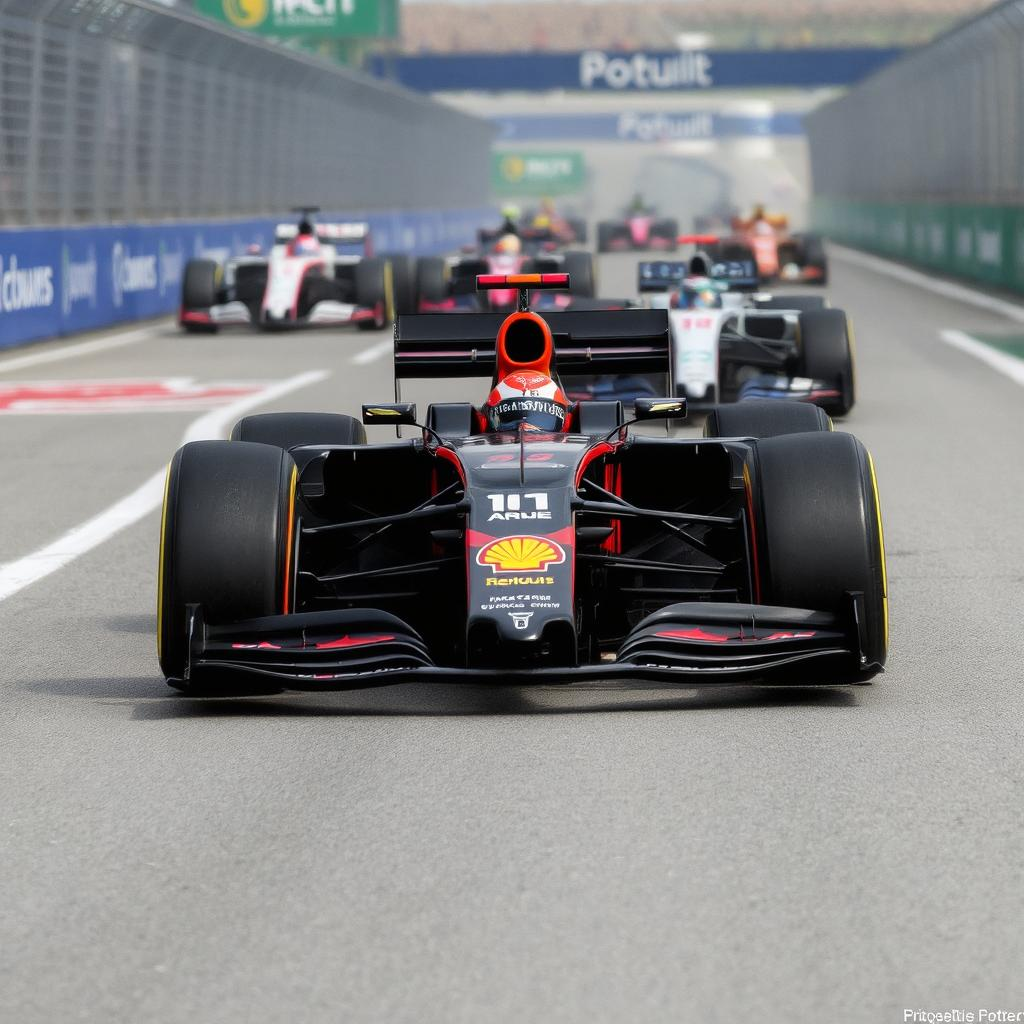

## Objective

The goal of this notebook is to predict the number of pitstops that should be made during the race. Specifically, we will perform EDA (Exploratory Data Analysis) to identify and visualise the factors contributing to pitstop prediction. This analysis will later help us to build a Machine Learning Model to predict the number of pitstops that should be made during a race.

This is a Multi-class Classification problem. We will use Weighted precision(as we want our predictions to be as precise and true as possible), which accounts for class imbalances and indicates the degree of agreement whether the model is good at predicting or not, since in formula 1 if a pitstop strategy is correct, it could lead to desired results which then leads to additional points and millions of pounds in profit.

## Libraries

In [2]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

#Data Visualisation
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('darkgrid')

## Parameters and Variables

It is convinient to set some default parameters and variables for our whole notebook

In [3]:
font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#00A5E0','#DD403A','#D5CABD','#7A6F86','#C34A36']
colors_cat = ['#E8907E','#D5CABD','#7A6F86','#C34A36','#B0A8B9','#845EC2',
'#8f9aaa','#FFB86F','#63BAAA','#9D88B3','#38c4e3']
colors_comp = ['steelblue','seagreen','black','darkorange','purple','firebrick','slategrey']

random_state = 42
scoring_metric = 'precision_weighted'

print('Default Parameters and Variables set!')


Default Parameters and Variables set!


## Functions

In [4]:
def plot_continuous(feature):
  ''' Plot a histogram and a boxplot for the Pitstop
  distributions for a specified feature'''
  df_func = train_df.copy()
  df_func['Pit Stops'] = df_func['Pit Stops'].astype('category')

  fig, (ax1,ax2) = plt.subplots(2,figsize=(10,8),sharex=True,gridspec_kw={'height_ratios':(.7,.3)})


  for df, color, label in zip([df_0_stop,df_1_stop,df_2_stop,df_3_stop,df_4_stop],colors,['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop']):
    sns.histplot(data=df,
                 x=feature,
                 bins=20,
                 color=color,
                 alpha=0.66,
                 edgecolor='steelblue',
                 label=label,
                 kde=False,
                 ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature,y='Pit Stops',data=df_func,palette=colors,ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])

    plt.tight_layout()

print('Function Defined!')

Function Defined!


In [5]:
def plot_categorical(feature):
  '''   For a categorical feature, plot a countplot
  for the total counts of each category next to a barplot for the pitstop rate'''

  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

  df_copy = train_df.copy()

  df_copy['Constructor Name'] = df_copy['Constructor Name'].str[:2] #To make it look less cluttered
  df_copy['Driver ID'] = df_copy['Driver ID'].str[:1]
  df_copy['Race Name'] = df_copy['Race Name'].str[:1]


  sns.countplot(x=feature,
                hue='Pit Stops',
                data=df_copy,
                palette=colors,
                ax=ax1)

  ax1.set_ylabel('Count')
  ax1.legend()

  sns.barplot(x=feature,
              y='Pit Stops',
              data=df_copy,
              palette=colors,
              ax=ax2)

  ax2.set_ylabel('Pit Stop Rate')

  plt.tight_layout()

print('Function Defined!')

Function Defined!


## Quick Look at our Data

We start by importing the dataset as a pandas DataFrame

In [6]:
df = pd.read_csv(r'C:\Users\NATHAN\F1FINAL\Data\raw datasets\f1_combined_data_final.csv')
print("Dataset Imported Successfully!")

print('It contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))
df.head()

Dataset Imported Successfully!
It contains 18162 rows and 31 columns


Year  Round_x              Race Name  Lap Number       Driver ID  Position  \
0  2019        1  Australian Grand Prix           1          bottas         1   
1  2019        1  Australian Grand Prix           1        hamilton         2   
2  2019        1  Australian Grand Prix           1          vettel         3   
3  2019        1  Australian Grand Prix           1  max_verstappen         4   
4  2019        1  Australian Grand Prix           1         leclerc         5   

   Lap Time  Round_y       Driver Name Constructor Name  Grid Position  \
0  1:33.813      1.0   Valtteri Bottas         Mercedes            2.0   
1  1:34.887      1.0    Lewis Hamilton         Mercedes            1.0   
2  1:35.626      1.0  Sebastian Vettel          Ferrari            3.0   
3  1:36.291      NaN               NaN              NaN            NaN   
4  1:37.042      1.0   Charles Leclerc          Ferrari            5.0   

   Final Position       Time_x Fastest Lap Time  Points    Status  \
0             1.0  1:25:27.325         1:25.580    26.0  Finished   
1             2.0      +20.886         1:26.057    18.0  Finished   
2             4.0      +57.109         1:27.954    12.0  Finished   
3             NaN          NaN              NaN     NaN       NaN   
4             5.0      +58.203         1:26.926    10.0  Finished   

   Number of Laps  Round   Lap  Stop    Time_y Duration        Date  Latitude  \
0            58.0    1.0  23.0   1.0  16:47:33   22.014  2019-03-17  -37.8497   
1            58.0    1.0  15.0   1.0  16:35:52   21.515  2019-03-17  -37.8497   
2            58.0    1.0  14.0   1.0  16:34:28   21.995  2019-03-17  -37.8497   
3             NaN    1.0  25.0   1.0  16:50:47   21.157  2019-03-17  -37.8497   
4            58.0    1.0  28.0   1.0  16:55:26   22.306  2019-03-17  -37.8497   

   Longitude        Weather  Temperature (°C)  Humidity (%)  Wind Speed (m/s)  \
0    144.968  broken clouds             17.76            67              0.89   
1    144.968  broken clouds             17.76            67              0.89   
2    144.968  broken clouds             17.76            67              0.89   
3    144.968  broken clouds             17.76            67              0.89   
4    144.968  broken clouds             17.76            67              0.89   

  Rain (mm)  Pit Stops  
0   No rain          1  
1   No rain          1  
2   No rain          1  
3   No rain          1  
4   No rain          1

This dataset consists of 18000+ rows and 31 columns including 'Pit Stops' which is the target variable and indicates the number of pitstops made by an individual driver during a race.

There is a 0 pit stop category as well, which is not a feasible prediction as in formula 1 it's mandatory that the driver makes atleast one stop. I tried dropping those records but it resulted in loss of important information so we will keep the data, and perform a post processing step before deployment, so that the model provides predictions as accurate as possible

The info() method can give us valuable information such as the number of non-null values and the type of each feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              18162 non-null  int64  
 1   Round_x           18162 non-null  int64  
 2   Race Name         18162 non-null  object 
 3   Lap Number        18162 non-null  int64  
 4   Driver ID         18162 non-null  object 
 5   Position          18162 non-null  int64  
 6   Lap Time          18162 non-null  object 
 7   Round_y           14138 non-null  float64
 8   Driver Name       14138 non-null  object 
 9   Constructor Name  14138 non-null  object 
 10  Grid Position     14138 non-null  float64
 11  Final Position    14138 non-null  float64
 12  Time_x            8572 non-null   object 
 13  Fastest Lap Time  13966 non-null  object 
 14  Points            14138 non-null  float64
 15  Status            14138 non-null  object 
 16  Number of Laps    14138 non-null  float6

### Getting the percentage of Missing Values

In [8]:
#Checking the percentage of missing values for the columns which have them
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = ((df.isnull().sum()*100)/df.shape[0]).sort_values(ascending=False)

missing_df = pd.concat([missing_values,missing_values_percent],axis=1,keys=['Missing Count','%'])
missing_df.head(15)

Missing Count          %
Time_x                     9590  52.802555
Fastest Lap Time           4196  23.103182
Final Position             4024  22.156150
Driver Name                4024  22.156150
Round_y                    4024  22.156150
Constructor Name           4024  22.156150
Grid Position              4024  22.156150
Points                     4024  22.156150
Status                     4024  22.156150
Number of Laps             4024  22.156150
Duration                    516   2.841097
Round                       491   2.703447
Time_y                      491   2.703447
Stop                        491   2.703447
Lap                         491   2.703447

* Since time_x is unique for each and every driver for each and every race and half of the data is missing, we can drop it
* We can also drop driver name as it is unique most of the time
* We can also drop Round as it does not hold much info
* Since we have Pit Stop data as the target variable, we can afford to drop Stop which contains stop number for each driver, which won't be required in our use case
* We can also drop time_y as it the timestamp for the stop made, which won't correlate to our target variable
* Rest of the missing values will be dealt via imputation based on their specificity


The describe method gives us a statistical summary of the numerical features

In [9]:
df.describe().T

count         mean        std        min         25%  \
Year              18162.0  2021.623610   1.699412  2019.0000  2020.00000   
Round_x           18162.0    11.250028   6.246473     1.0000     6.00000   
Lap Number        18162.0     3.087380   1.489540     1.0000     2.00000   
Position          18162.0    10.165015   5.724857     1.0000     5.00000   
Round_y           14138.0    11.258877   6.256086     1.0000     6.00000   
Grid Position     14138.0    10.086434   5.761134     0.0000     5.00000   
Final Position    14138.0    10.322252   5.480052     1.0000     6.00000   
Points            14138.0     4.883223   6.759036     0.0000     0.00000   
Number of Laps    14138.0    57.410737  13.348247     1.0000    52.00000   
Round             17671.0    11.203101   6.203793     1.0000     6.00000   
Lap               17671.0    21.583272  13.774087     1.0000    11.00000   
Stop              17671.0     1.444797   2.445951     1.0000     1.00000   
Latitude          18162.0    33.000342  21.336564   -37.8497    25.95810   
Longitude         18162.0    12.776327  60.322432  -115.1730    -1.01694   
Temperature (°C)  18162.0    10.103034   9.536863    -4.9700     1.59000   
Humidity (%)      18162.0    75.976985  17.081820    23.0000    70.00000   
Wind Speed (m/s)  18162.0     3.647985   2.492157     0.0000     2.06000   
Pit Stops         18162.0     1.626528   0.651553     0.0000     1.00000   

                         50%        75%        max  
Year              2022.00000  2023.0000  2024.0000  
Round_x             11.00000    16.0000    23.0000  
Lap Number           3.00000     4.0000     7.0000  
Position            10.00000    15.0000    20.0000  
Round_y             11.00000    16.0000    23.0000  
Grid Position       10.00000    15.0000    20.0000  
Final Position      10.00000    15.0000    20.0000  
Points               1.00000     8.0000    26.0000  
Number of Laps      57.00000    69.0000    87.0000  
Round               11.00000    16.0000    22.0000  
Lap                 20.00000    31.0000    70.0000  
Stop                 1.00000     2.0000    70.0000  
Latitude            41.57000    47.2197    52.3888  
Longitude            9.28111    49.8533   144.9680  
Temperature (°C)     7.84000    21.0500    26.9200  
Humidity (%)        75.00000    87.0000   100.0000  
Wind Speed (m/s)     3.09000     4.6300    12.3500  
Pit Stops            2.00000     2.0000     4.0000

* The mean number of pitstops is 1.6 and standard deviation is 0.6 which means most of the time, teams either do a one stop or a two stop
* The mean humidity percentage is 75.97 which means that 3/4 of the time there is a chance of rain which could lead to more than just 1 stop
* The average Lap value is 21 which means that drivers come into the pits mostly after 20 laps or so and a standard deviation of 13 shows that they may come in early into the pits either due to degradation or an issue, and later into the pits if they want to stay out on those tyres to just do a 1 stop

In [10]:
#Dropping the features that are not required
df.drop(['Time_x','Time_y','Driver Name','Round','Round_x','Round_y','Stop'],axis=1,inplace=True)
print('The shape of the dataset is: ({},{})'.format(df.shape[0],df.shape[1]))
df.head()

The shape of the dataset is: (18162,24)


Year              Race Name  Lap Number       Driver ID  Position  \
0  2019  Australian Grand Prix           1          bottas         1   
1  2019  Australian Grand Prix           1        hamilton         2   
2  2019  Australian Grand Prix           1          vettel         3   
3  2019  Australian Grand Prix           1  max_verstappen         4   
4  2019  Australian Grand Prix           1         leclerc         5   

   Lap Time Constructor Name  Grid Position  Final Position Fastest Lap Time  \
0  1:33.813         Mercedes            2.0             1.0         1:25.580   
1  1:34.887         Mercedes            1.0             2.0         1:26.057   
2  1:35.626          Ferrari            3.0             4.0         1:27.954   
3  1:36.291              NaN            NaN             NaN              NaN   
4  1:37.042          Ferrari            5.0             5.0         1:26.926   

   Points    Status  Number of Laps   Lap Duration        Date  Latitude  \
0    26.0  Finished            58.0  23.0   22.014  2019-03-17  -37.8497   
1    18.0  Finished            58.0  15.0   21.515  2019-03-17  -37.8497   
2    12.0  Finished            58.0  14.0   21.995  2019-03-17  -37.8497   
3     NaN       NaN             NaN  25.0   21.157  2019-03-17  -37.8497   
4    10.0  Finished            58.0  28.0   22.306  2019-03-17  -37.8497   

   Longitude        Weather  Temperature (°C)  Humidity (%)  Wind Speed (m/s)  \
0    144.968  broken clouds             17.76            67              0.89   
1    144.968  broken clouds             17.76            67              0.89   
2    144.968  broken clouds             17.76            67              0.89   
3    144.968  broken clouds             17.76            67              0.89   
4    144.968  broken clouds             17.76            67              0.89   

  Rain (mm)  Pit Stops  
0   No rain          1  
1   No rain          1  
2   No rain          1  
3   No rain          1  
4   No rain          1


EDA(Exploratory Data Analysis) will help us identify the dataset better, but before we go any further, we need to split the dataset into train and test splits. We will perform analysis and model creation only the train set and evaluate our model on the test set. This prevents data leakage which in turn prevents the Machine learning model from being biased.

## Creating the split

We will split a dataset into a train and test set using scikit-learn's train_test_split() function, which implements random sampling. Our dataset is large enough, especially relative to the number of features, so we do not risk introducing sampling bias


In [11]:
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(df,test_size=0.2,random_state=random_state)

train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

print('Train set: ({},{})'.format(train_df.shape[0],train_df.shape[1]))
print('Test set: ({},{})'.format(test_df.shape[0],test_df.shape[1]))


Train set: (14529,24)
Test set: (3633,24)


## Exploratory Data Analysis

### Target Variable : Pit Stops

As we have seen earlier, the target variable can take on 5 possible values:

* Zero(0) indicating that the driver either did not start or finish
* One(1) indicating that the driver made a one-stop
* Two(2) indicating that the driver made a two-stop
* Three (3) indicating that the driver made a three-stop
* Four(4) indicating that the driver made a four-stop

In [12]:
# Getting the sorted counts per pitstop
sorted_counts = pd.DataFrame(train_df['Pit Stops'].value_counts().reset_index().sort_values(by=['Pit Stops']))
sorted_counts.set_index('Pit Stops',inplace=True)
sorted_counts

count
Pit Stops       
0            399
1           5597
2           7688
3            783
4             62

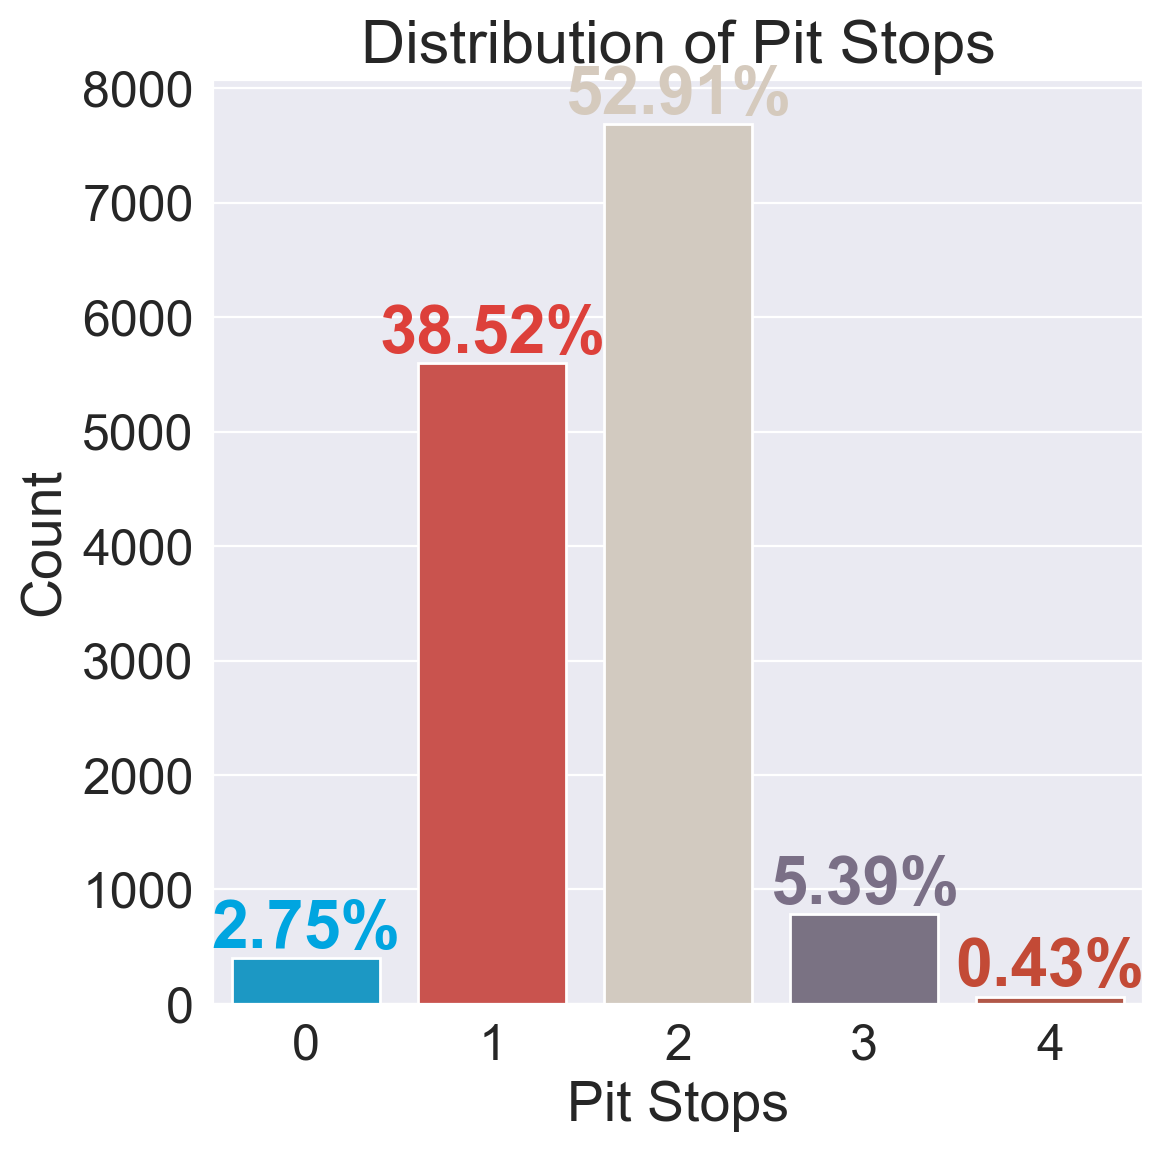

In [13]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(x='Pit Stops',data=train_df,palette=colors,ax=ax)

for index, value in enumerate(sorted_counts['count']):
    label = '{}%'.format(np.round((value/train_df.shape[0])*100,2))
    ax.annotate(label,
                xy=(index,value+250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size = font_size + 4
                )
    
    ax.set_xlabel('Pit Stops')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of Pit Stops')

* As we said earlier, more than half of the time the stop made is a two-stopper, and around 90% of the time it's either a one-stop or two-stop
* 3-stops and 4-stops are even rarer because they normally take place when there is either an issue in the car or a sudden change in weather conditions
* Zero pitstops are when the driver did not start or did not finish the race

As we can see the dataset is skewed/imbalanced therefore we cannot use accuracy as a metric to evaluate the model performance.

Different visualisation techniques apply to different types of variables, so it's helpful to diffrentiate between categorical,continuous variables and datetime variables and look at them separately.

In [14]:
#Replacing the No rain value with 0
train_df['Rain (mm)'].replace('No rain',0,inplace=True)
test_df['Rain (mm)'].replace('No rain',0,inplace=True)

In [15]:
#Lap Number and Position will be dropped as Lap Number contains limited data and Position is not required as we have the start and end position
# Since we have the weather data of the particular location and the name of the Grand Prix we will drop latitude and longitude data
continuous = ['Lap Number','Position','Grid Position','Final Position','Points','Number of Laps','Lap','Latitude','Longitude','Duration','Temperature (°C)','Humidity (%)','Wind Speed (m/s)','Rain (mm)']
categorical = ['Year','Race Name','Driver ID','Constructor Name','Status','Weather']
datetime = ['Date','Fastest Lap Time','Lap Time']

print('Continuous :',','.join(continuous))
print('Categorical :',','.join(categorical))
print('Datetime :',','.join(datetime))

Continuous : Lap Number,Position,Grid Position,Final Position,Points,Number of Laps,Lap,Latitude,Longitude,Duration,Temperature (°C),Humidity (%),Wind Speed (m/s),Rain (mm)
Categorical : Year,Race Name,Driver ID,Constructor Name,Status,Weather
Datetime : Date,Fastest Lap Time,Lap Time


### Continuous Variables

By calling the hist method, we can plot a histogram for all the continuous numeric features

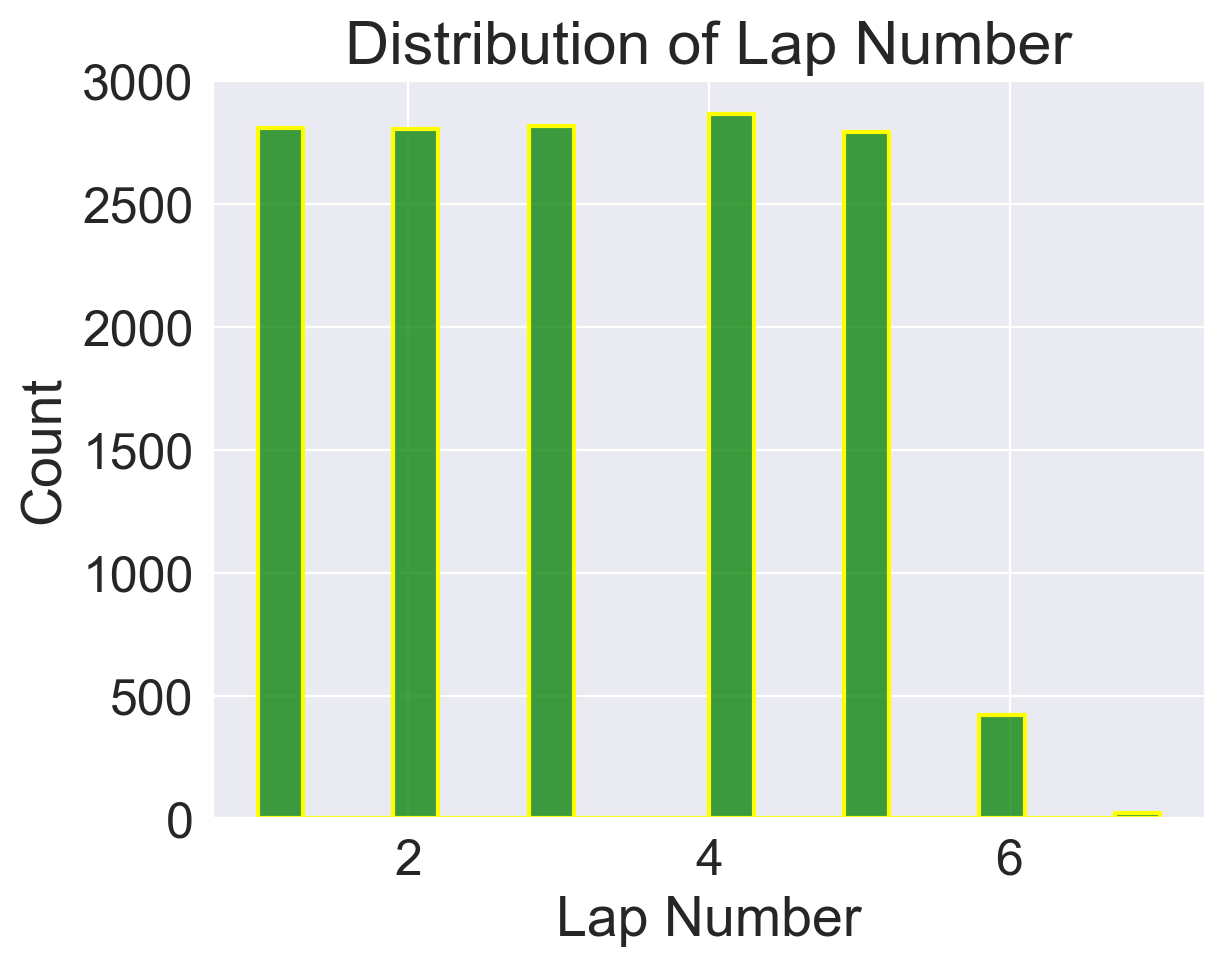

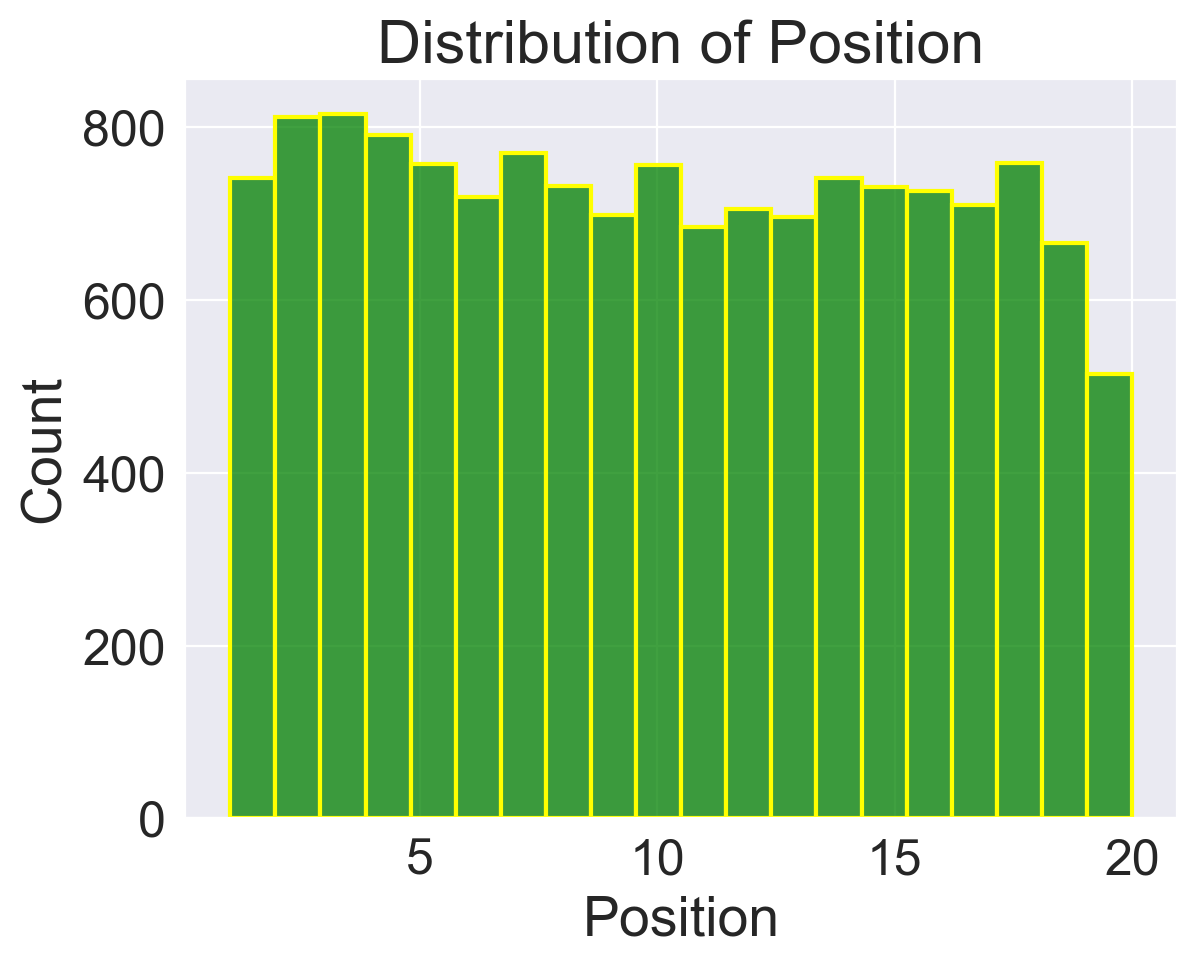

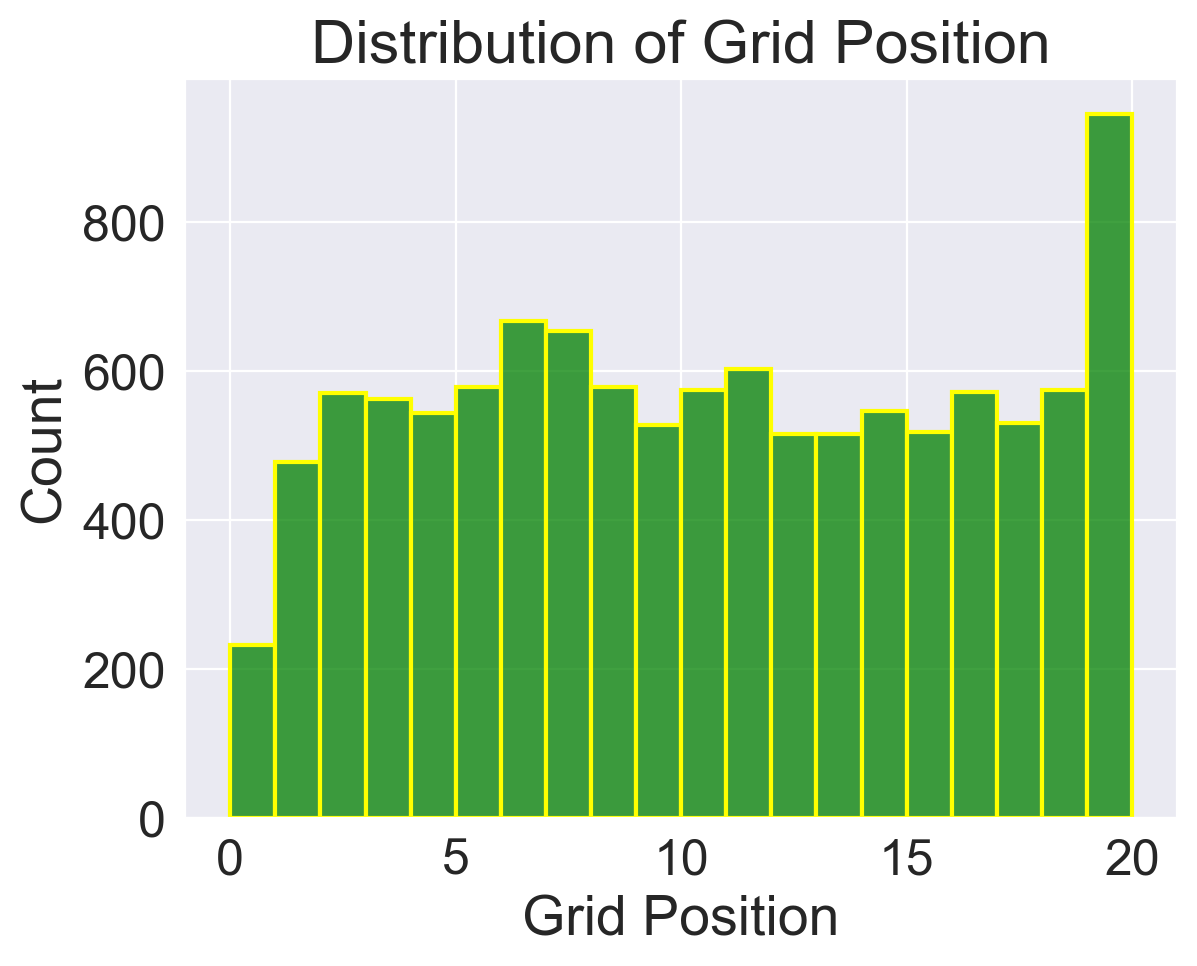

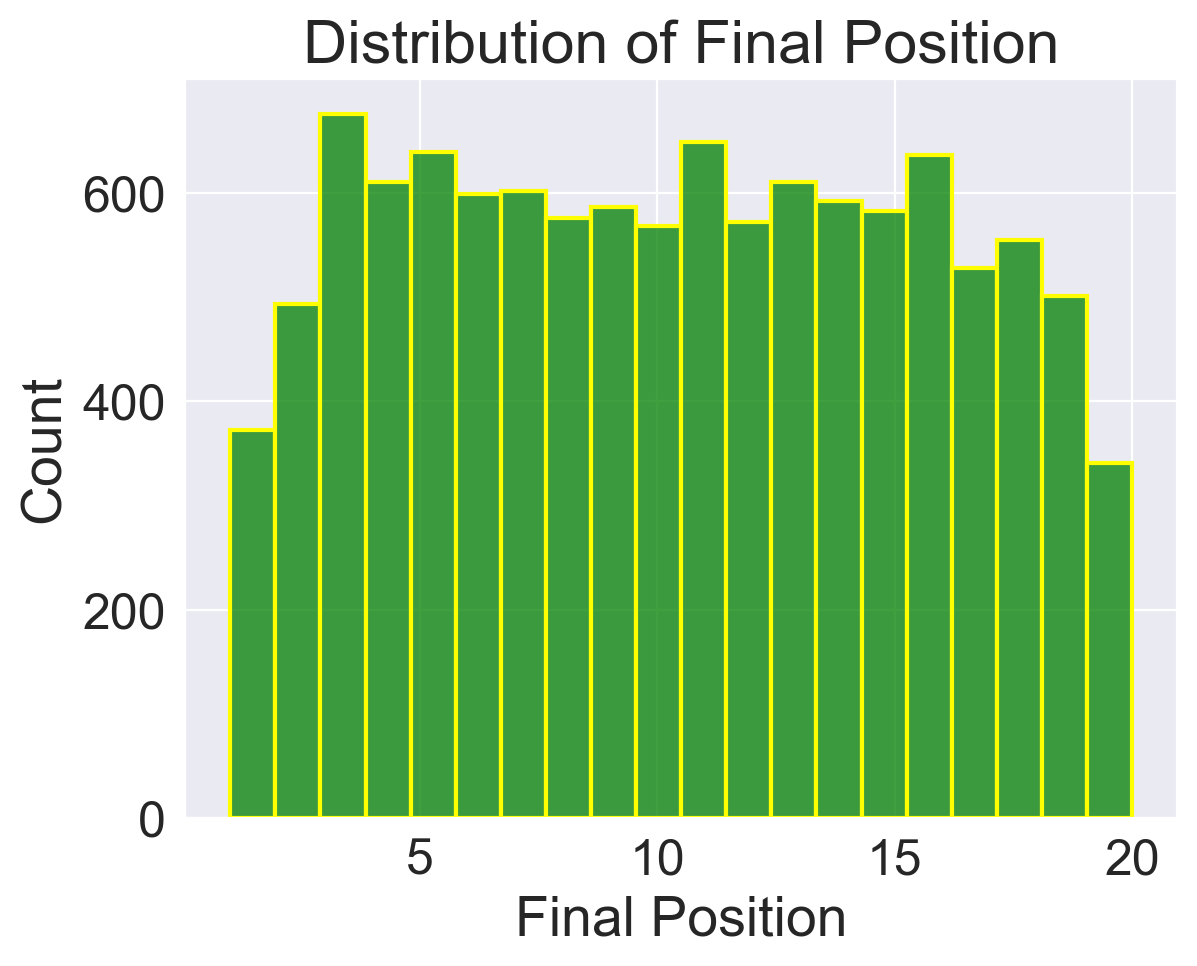

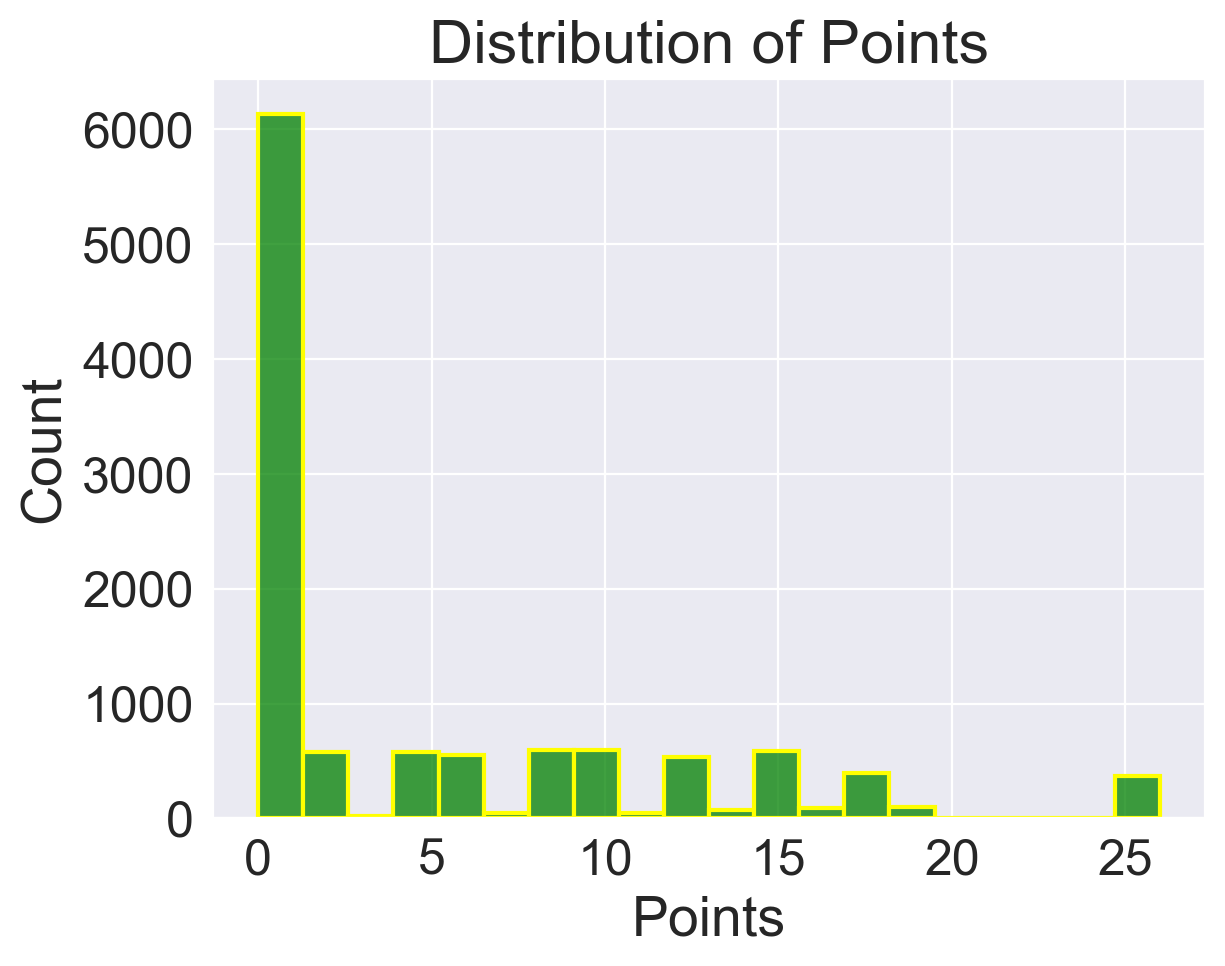

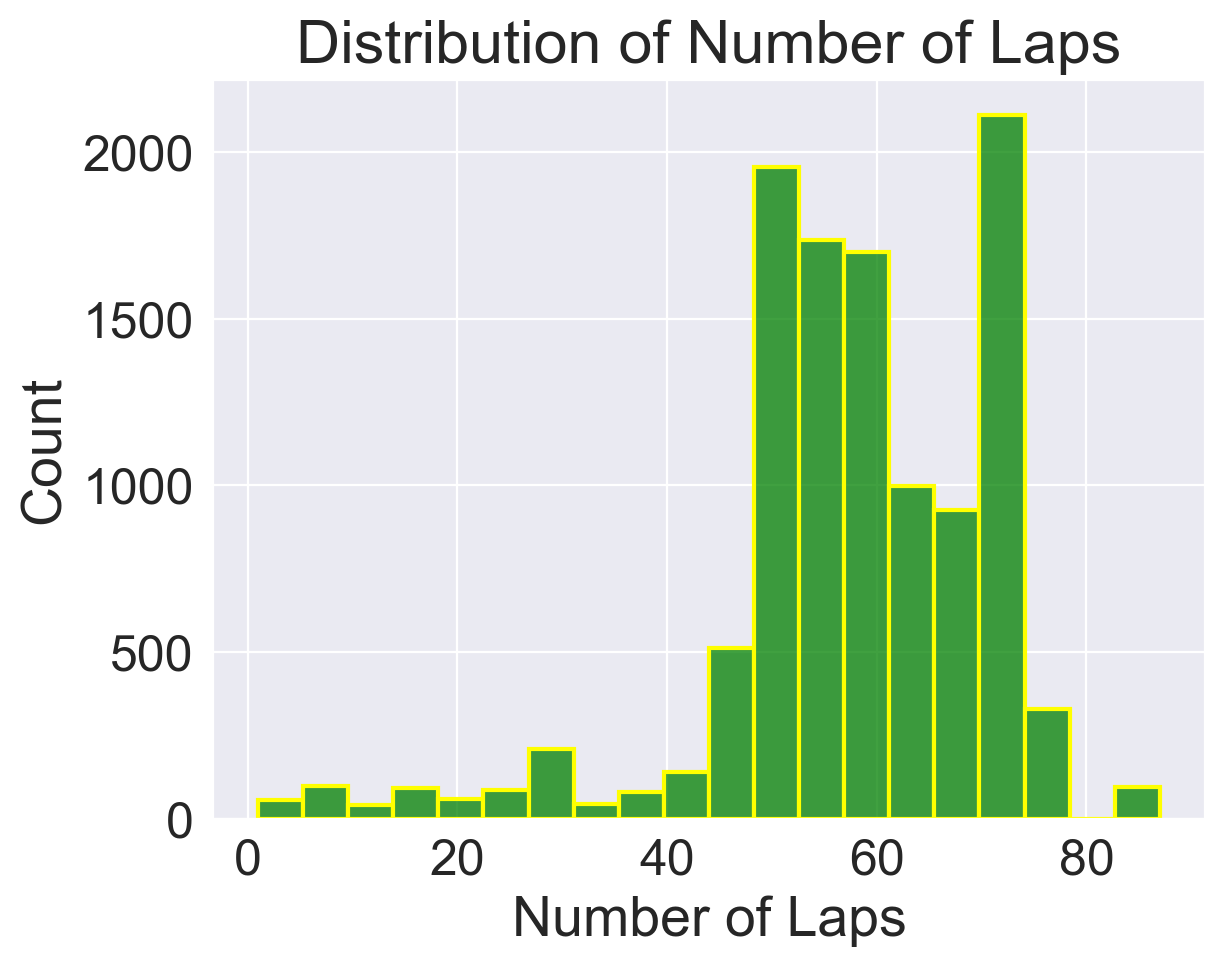

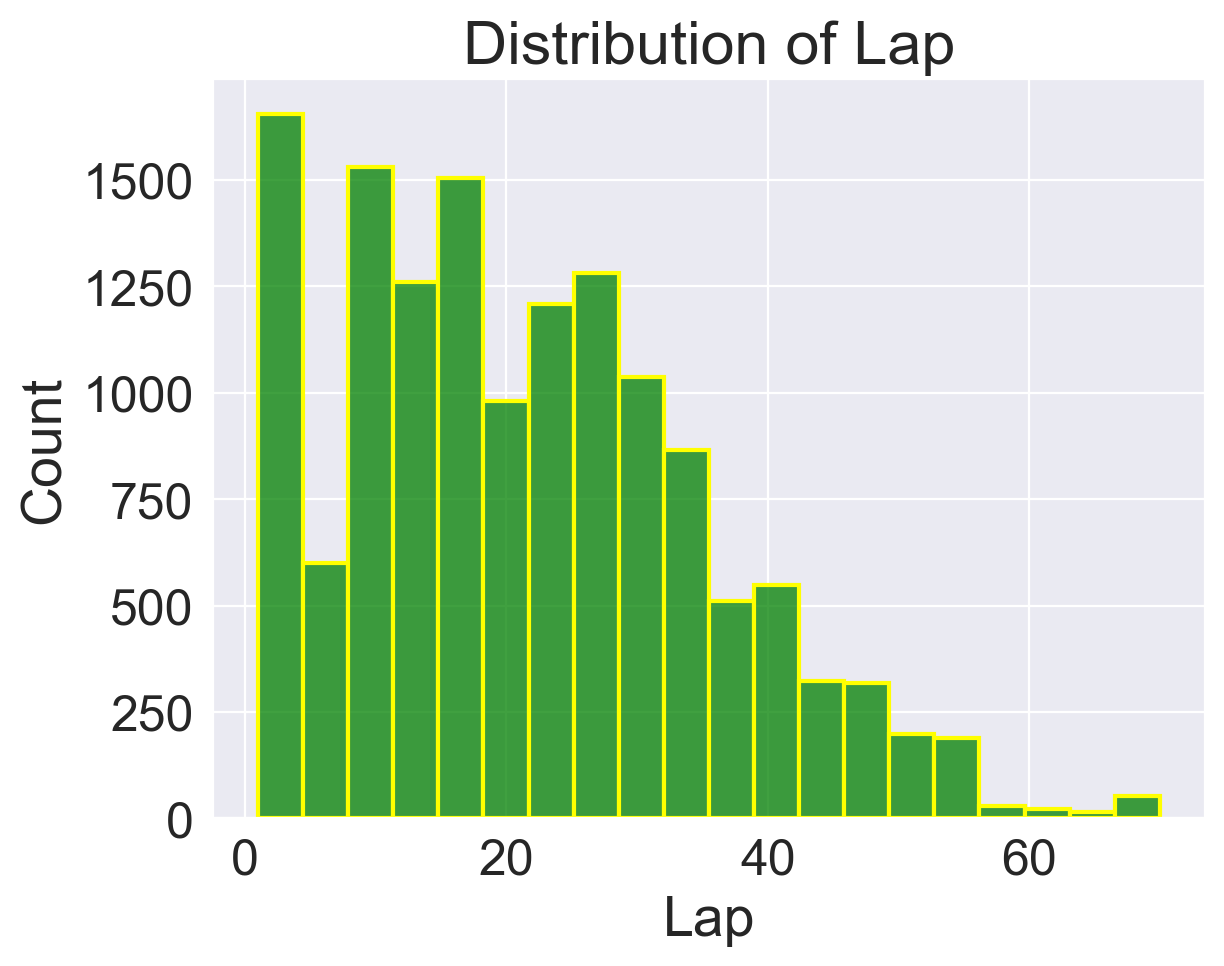

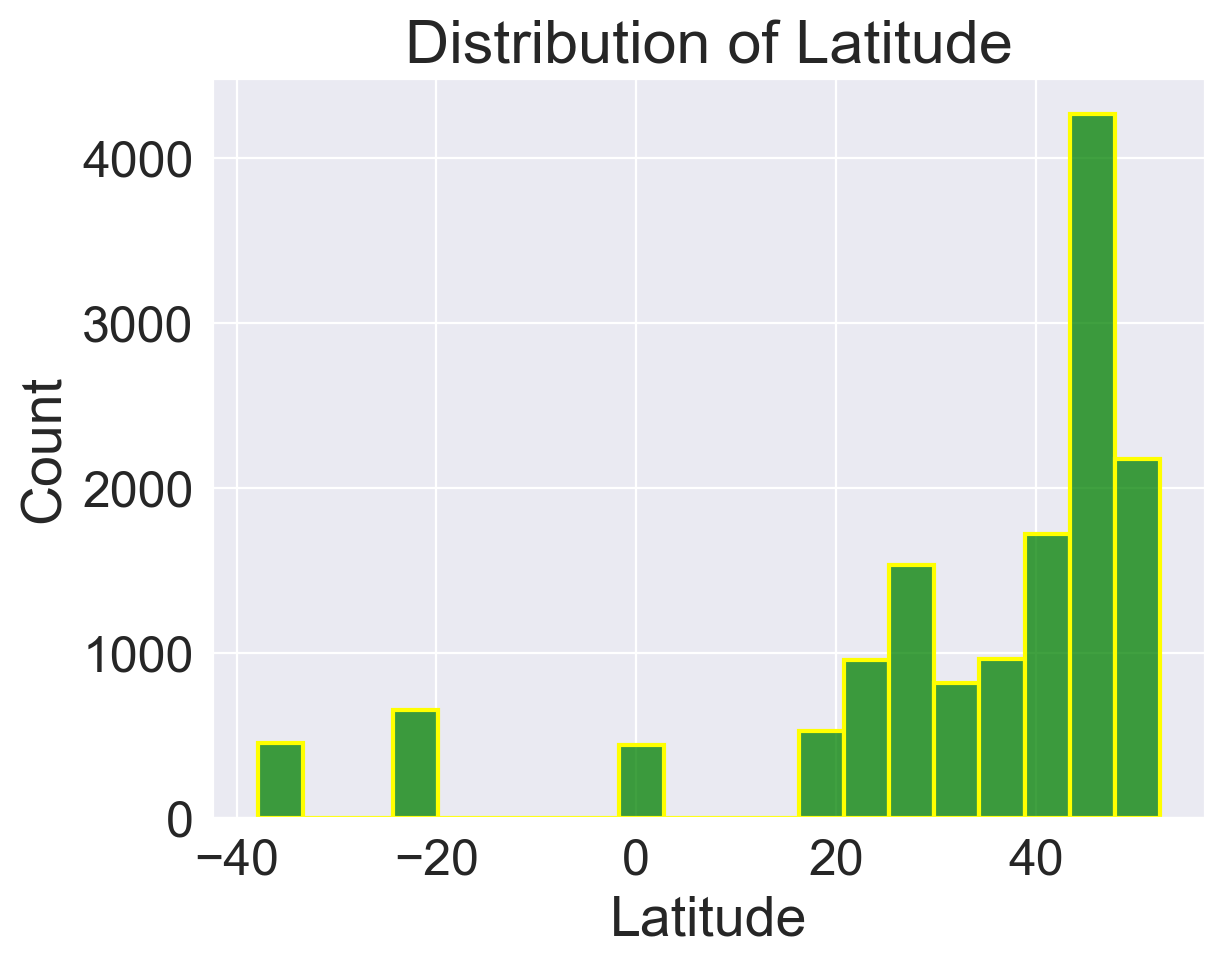

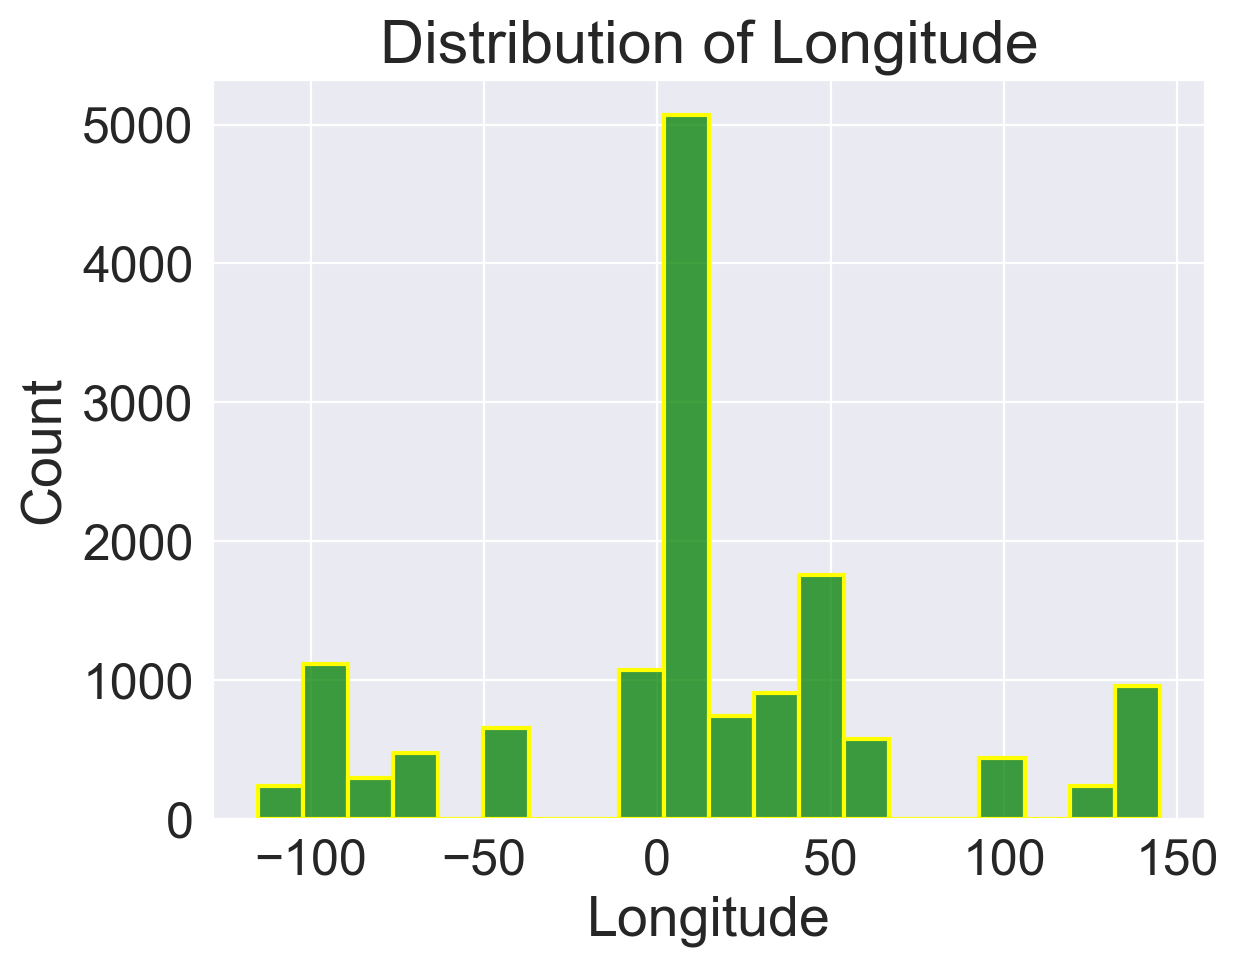

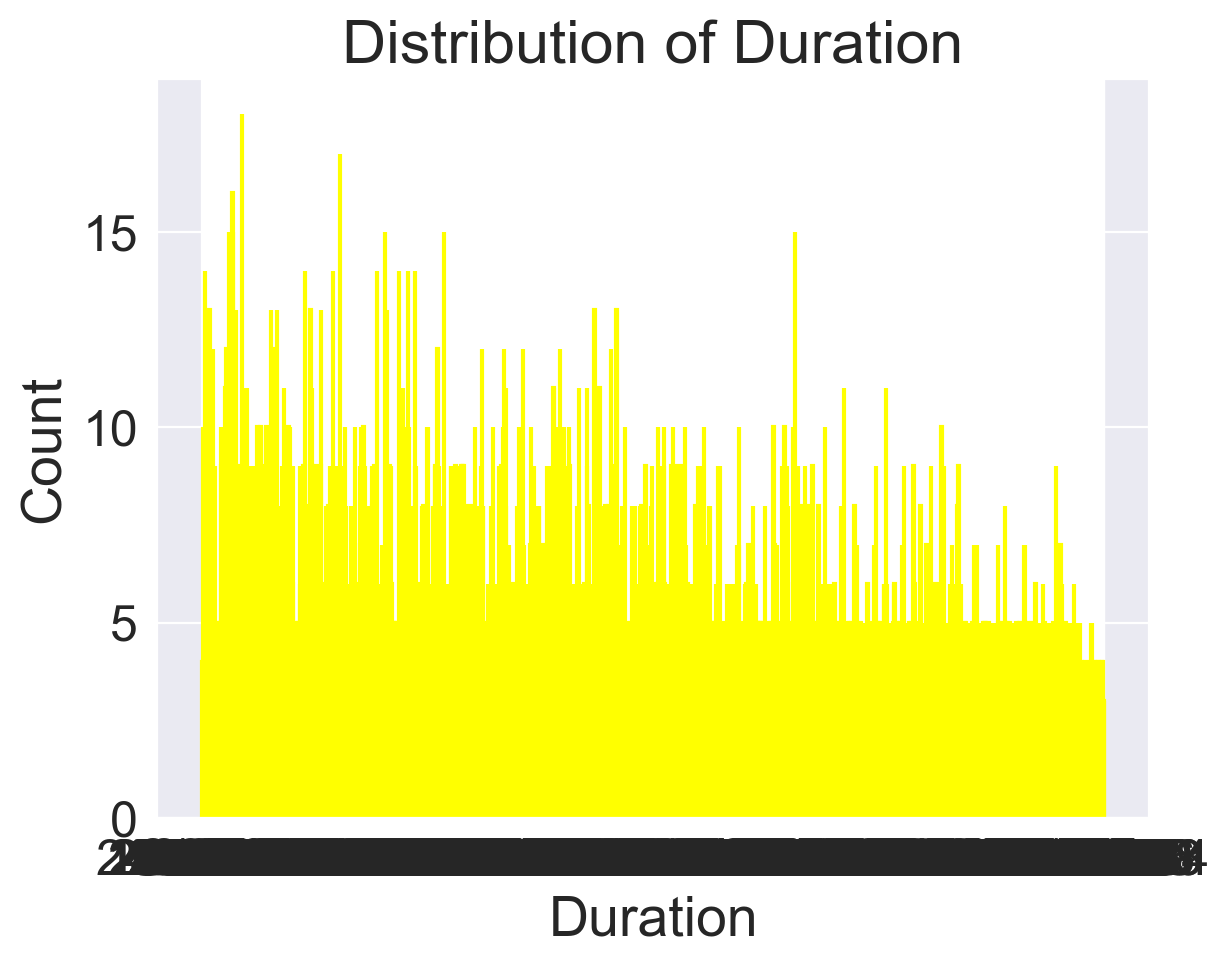

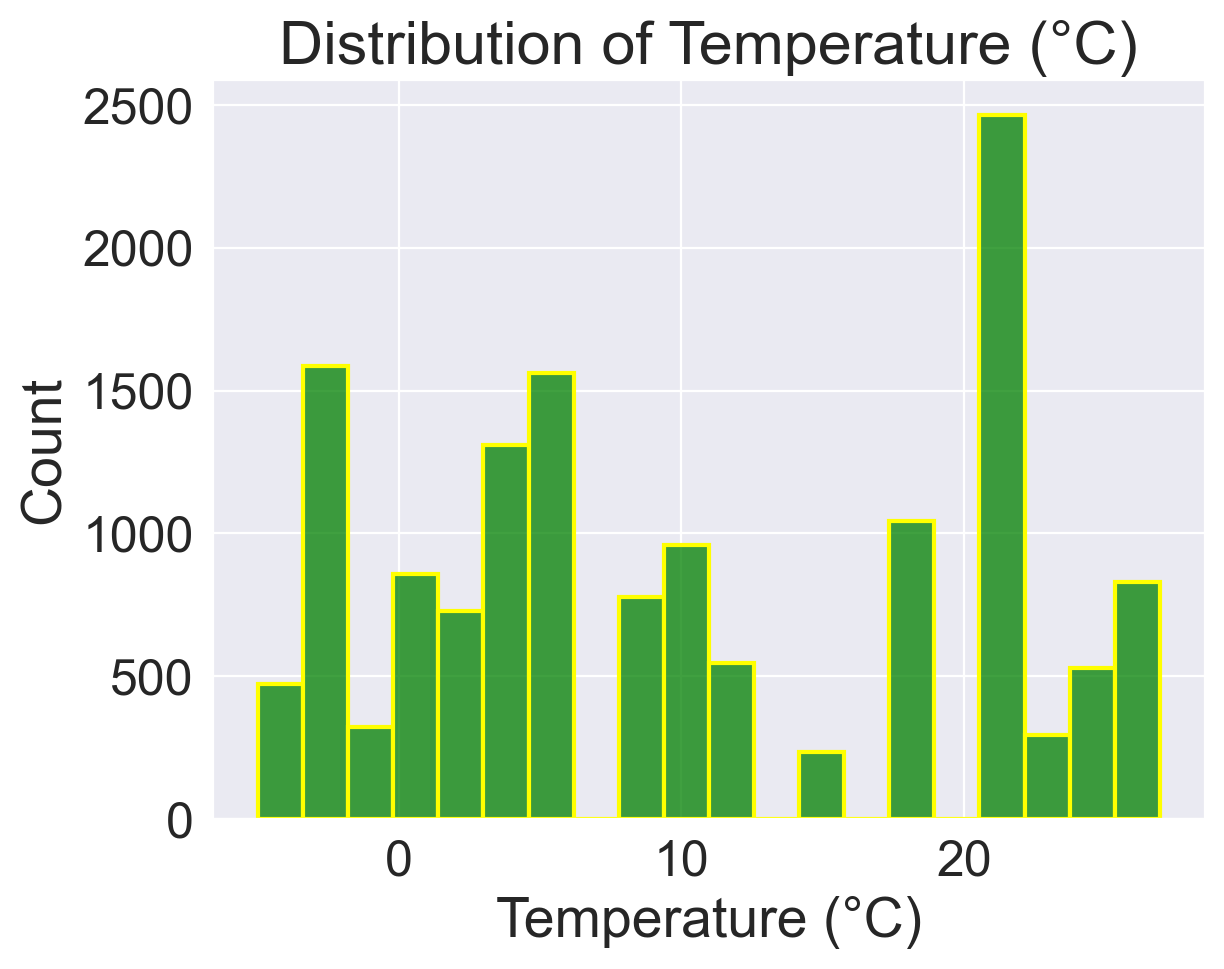

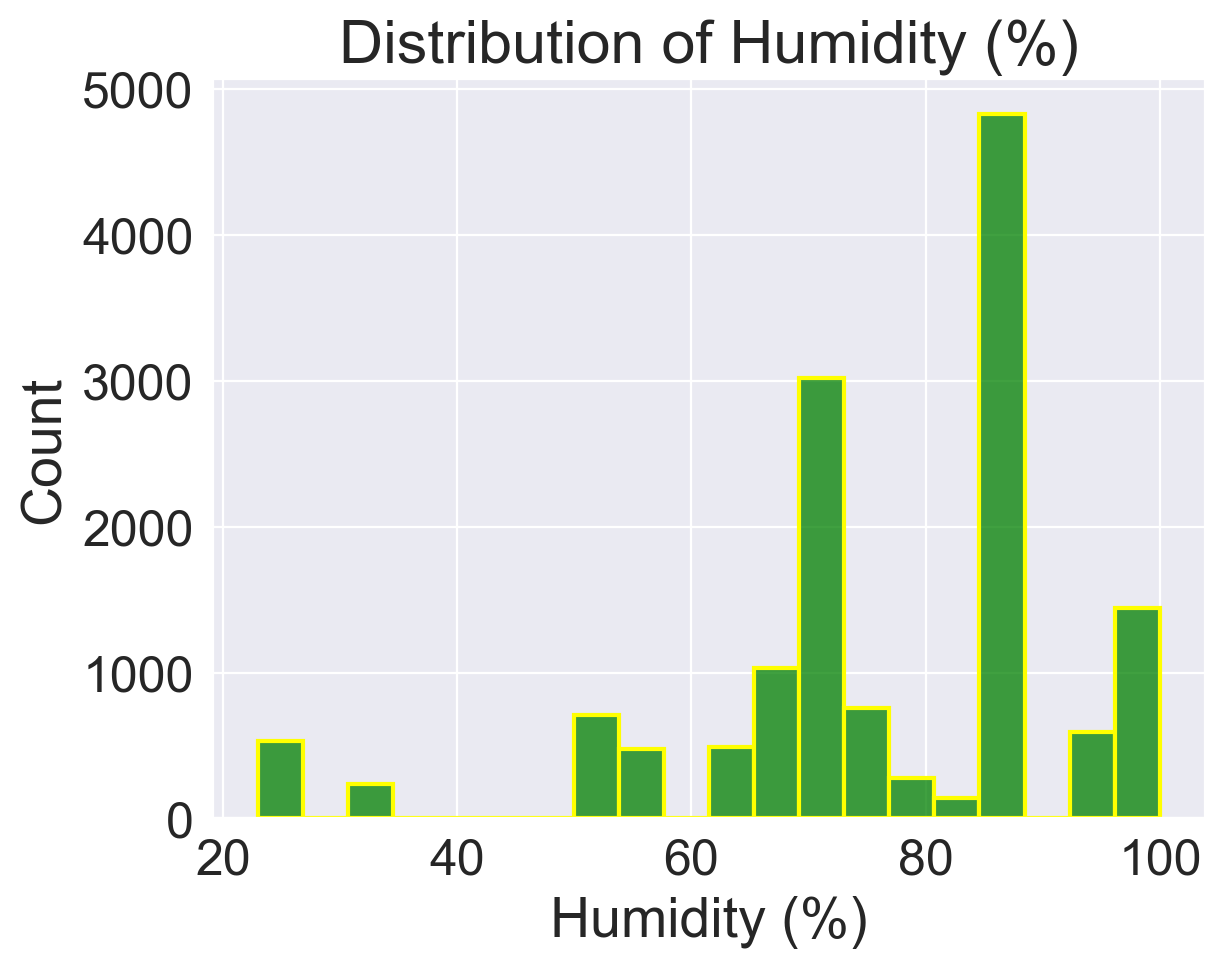

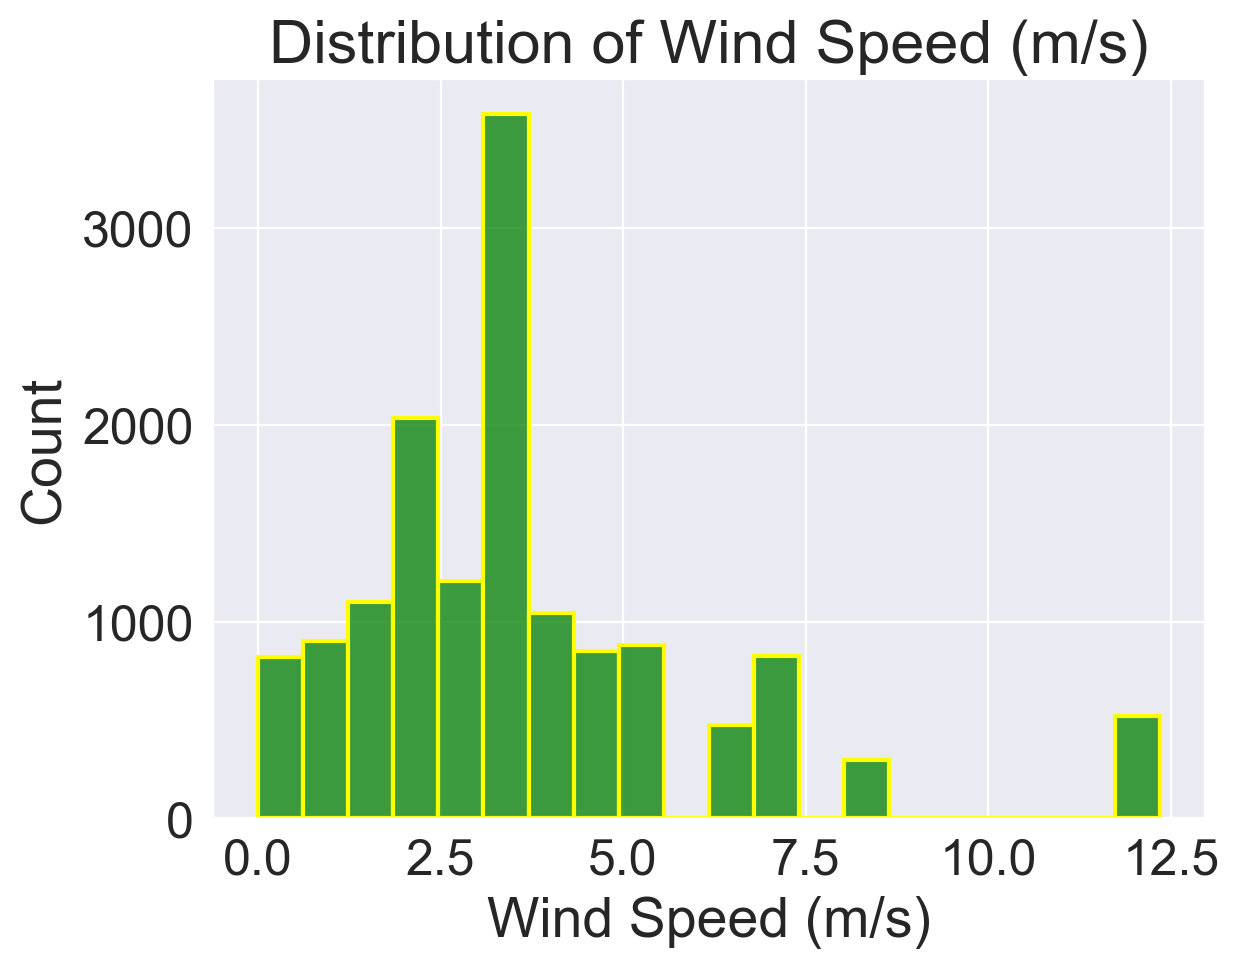

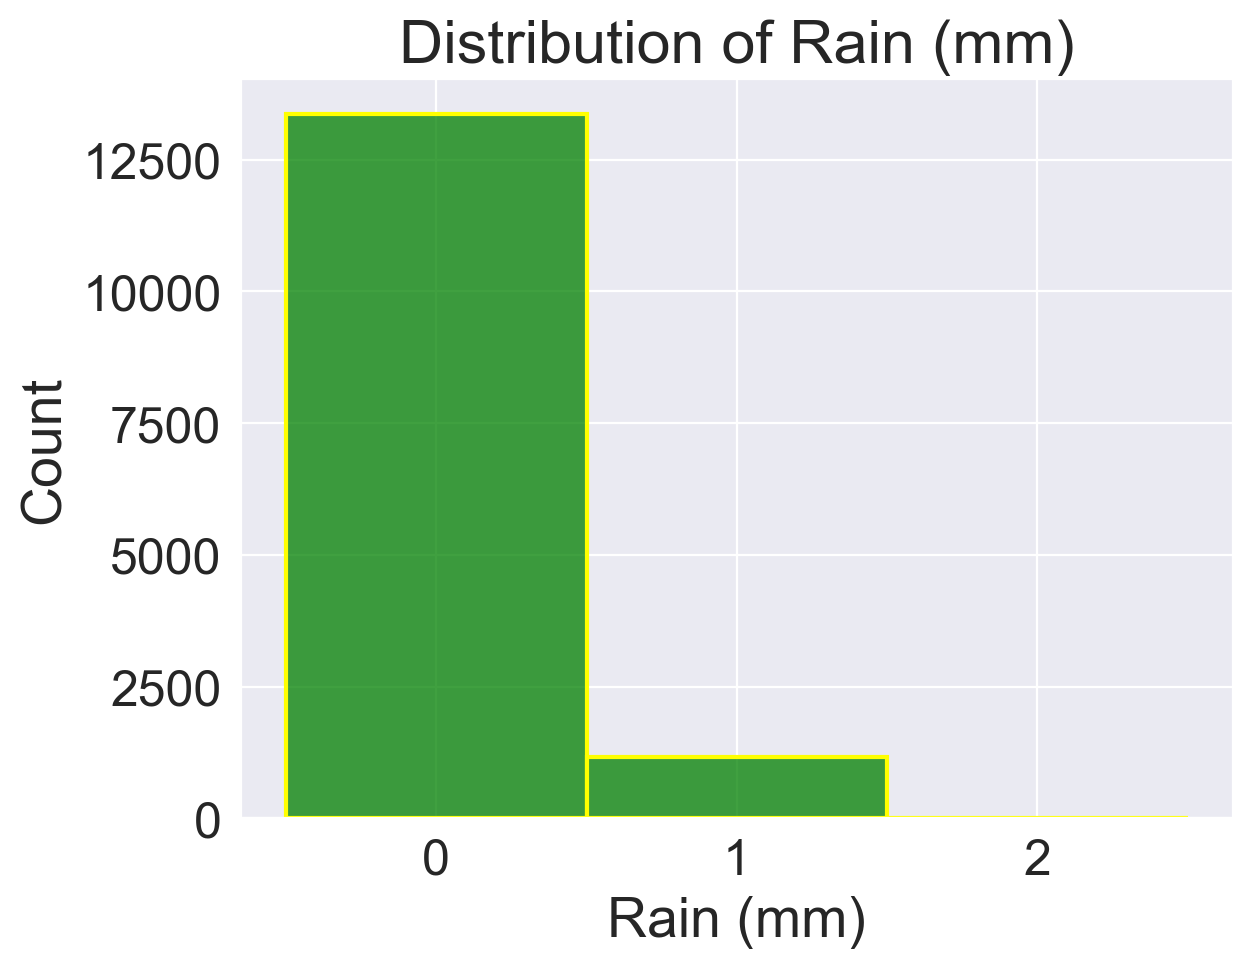

In [16]:
for feature in continuous:
  sns.histplot(data=train_df,
               x=feature,
               bins=20,
               color='green',
               edgecolor='yellow',
               linewidth=1.5)
  plt.ylabel('Count')
  plt.title(f'Distribution of {feature}')
  plt.show()

* We will drop Lap Number as it contains limited amount of data
* Position follows a uniform distribution, so it provides little to no information
* Same goes for the grid position and final position, what we can do is create a new feature position gained from these two features, which will provide more info
* For Points, we can create a categorical variable Points Gained, which will indicate 1 if points are gained or 0 if points are lost.
* Number of Laps is slightly extends more to the left of the median than the right. i.e, not tail-heavy.
* Lap follows a downward trend which indicates that as the laps go on the chances of having a pitstop reduce
* Latitude and Longitude provide little to no information and the weather data is available along with the name of the grand prix,therefore it can be dropped
Pitstop Duration follows a uniform distribution more or so
* Temperature, wind speed and humidity values are high in certain areas and low in certain

### Looking for Correlations

We can compare the standard correlation coefficient between every pair of continuous features using the pandas corr() method and plot it as a matrix

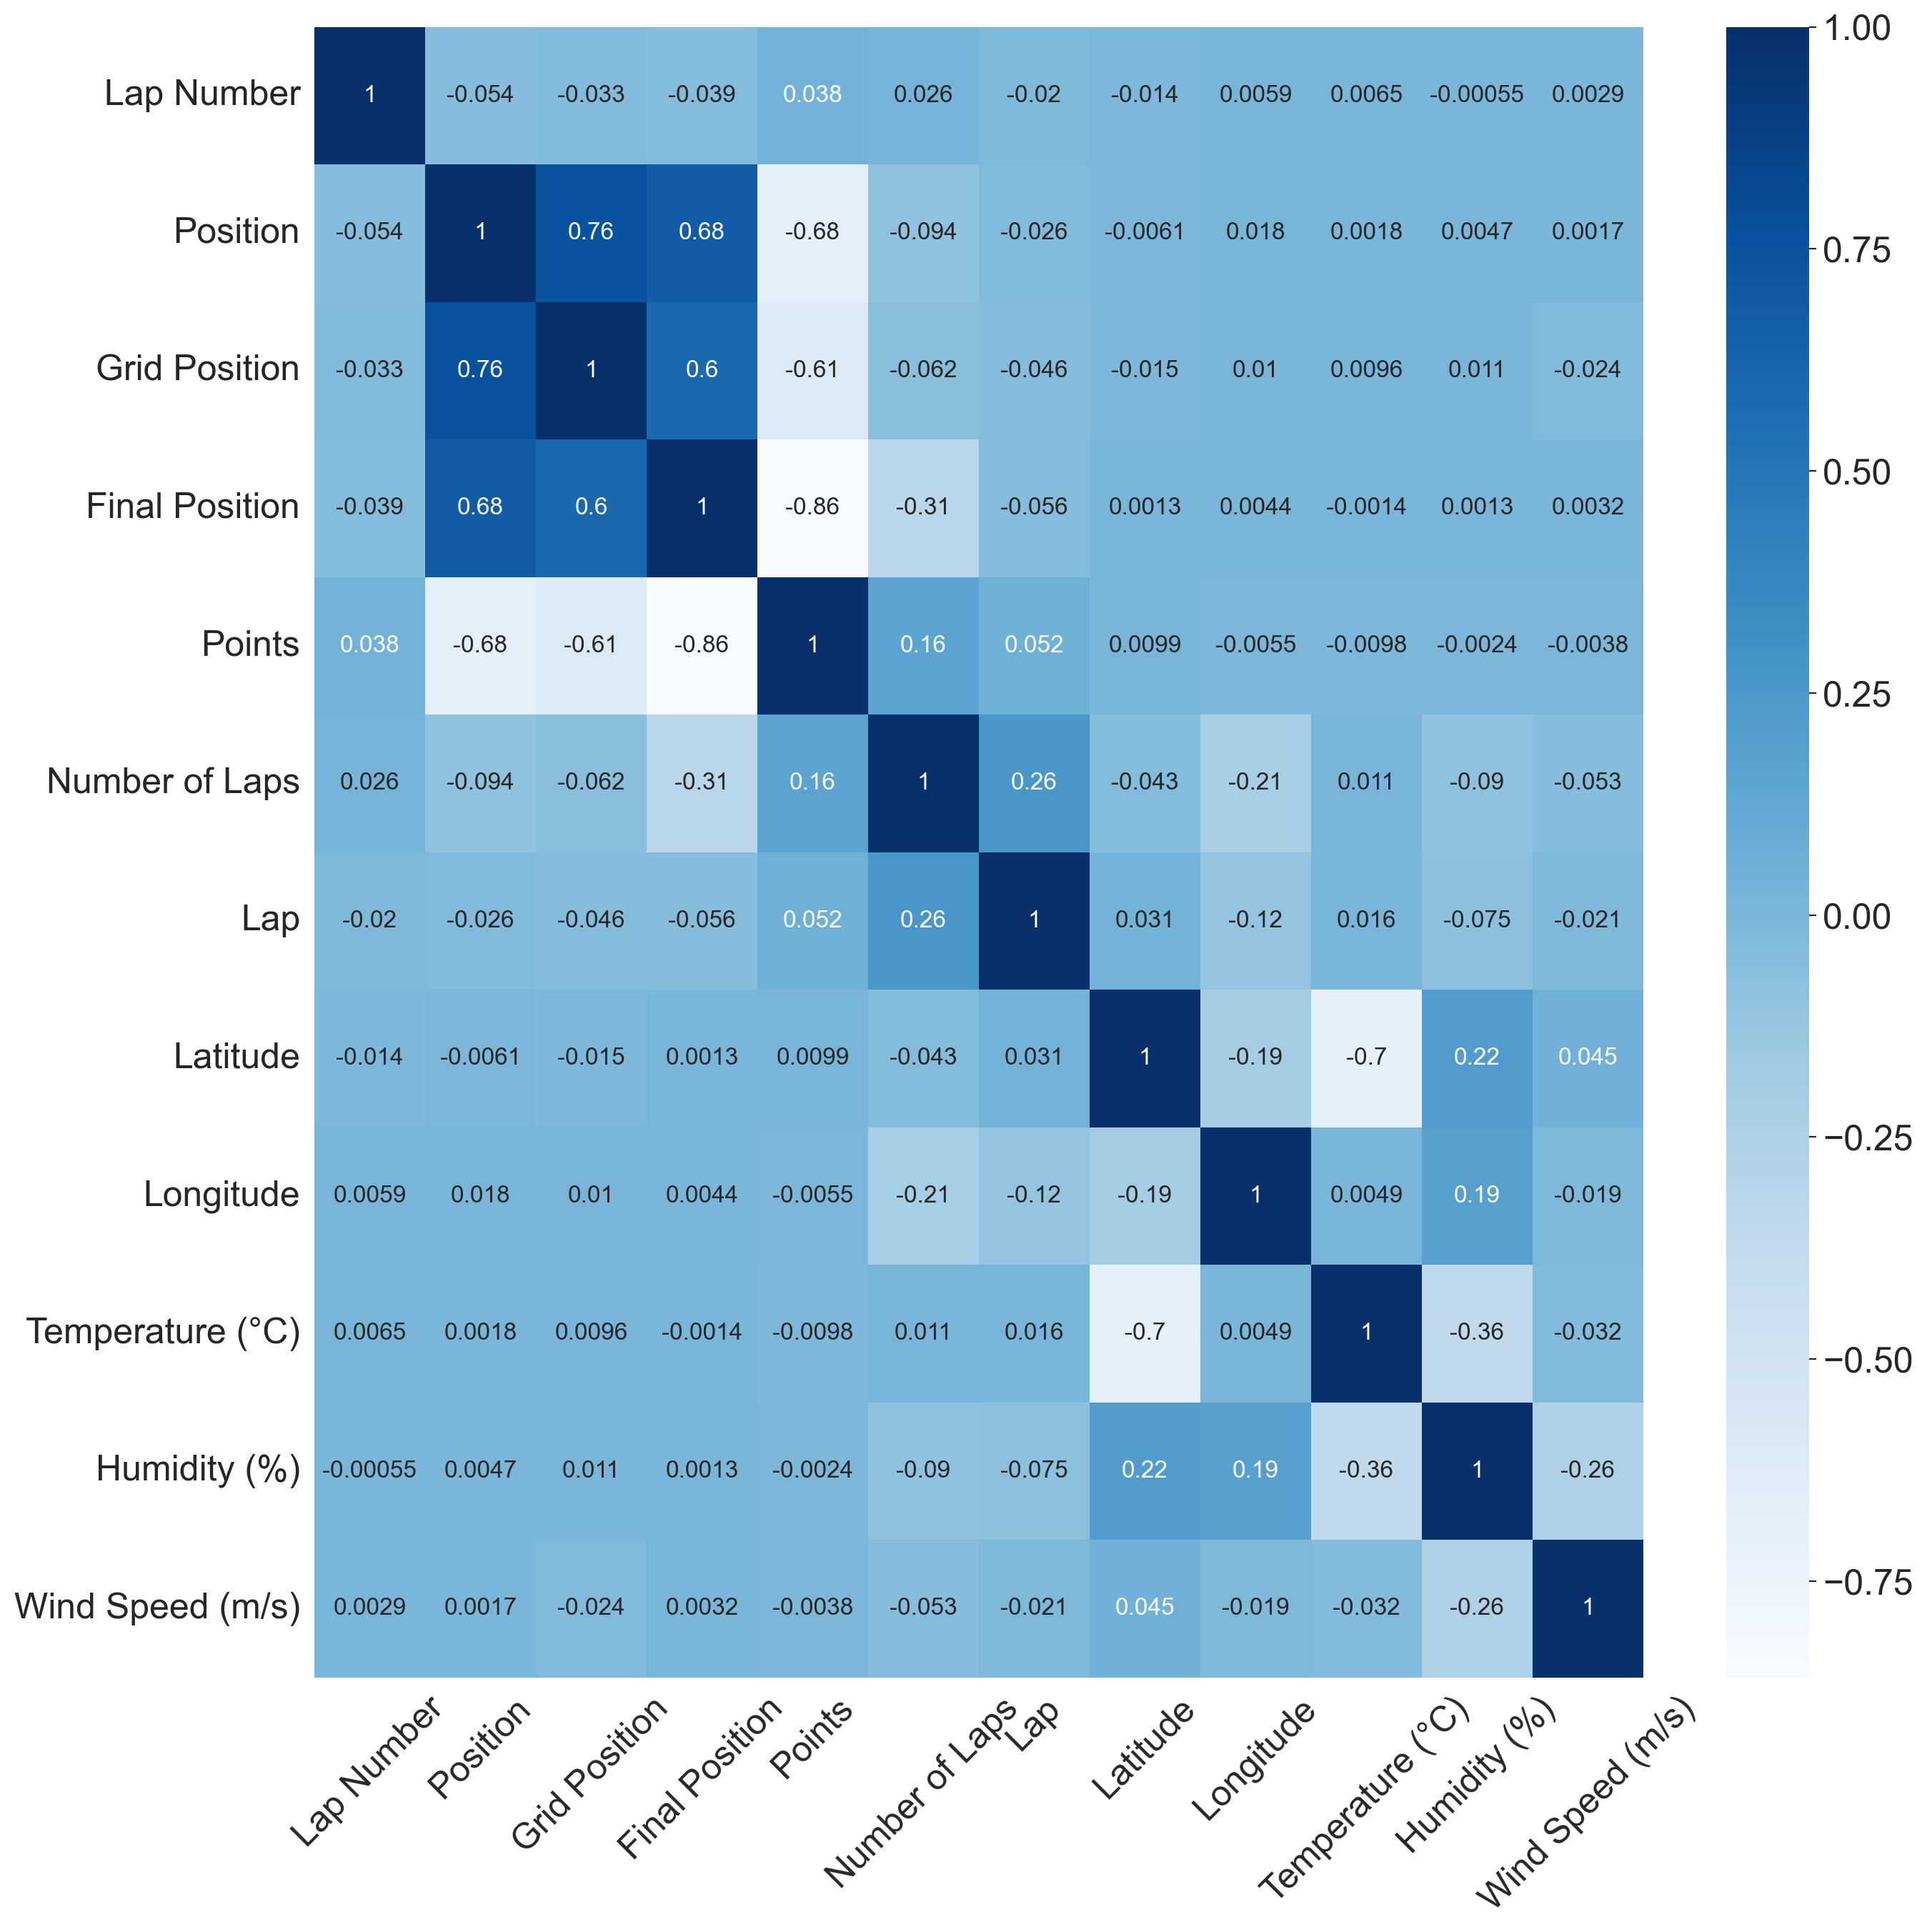

In [17]:
fig , ax = plt.subplots(figsize=(15,15))

sns.heatmap(train_df[continuous].corr(numeric_only=True),
            annot = True,
            annot_kws = {'fontsize':12},
            cmap = 'Blues',
            ax=ax
            )

ax.tick_params(axis='x',rotation=45)
ax.tick_params(axis='y',rotation=360)

There is a high correlation between Position, Grid Position, Final Position and Points. Since we will be creating new features from the final three ones and the first one will be dropped, there is no case of multicollinearity.

Also between Temperature and Latitude, there is a high correlation, since Latitude is being dropped, we don't need to worry about it

Let us look at the features in greater detail

In [18]:
#First let us drop the features discussed
train_df.drop(['Lap Number','Position','Latitude','Longitude'],axis=1,inplace=True)
test_df.drop(['Lap Number','Position','Latitude','Longitude'],axis=1,inplace=True)
train_df.head()


Year              Race Name  Driver ID  Lap Time Constructor Name  \
0  2024  Australian Grand Prix    leclerc  1:22.519          Ferrari   
1  2019  Azerbaijan Grand Prix      albon  1:51.021       Toro Rosso   
2  2020     British Grand Prix  raikkonen  2:05.243              NaN   
3  2022   Hungarian Grand Prix      sainz  1:23.354          Ferrari   
4  2024  Australian Grand Prix    tsunoda  1:23.434       RB F1 Team   

   Grid Position  Final Position Fastest Lap Time  Points    Status  \
0            4.0             2.0         1:19.813    19.0  Finished   
1           11.0            11.0         1:45.754     0.0    +1 Lap   
2            NaN             NaN              NaN     NaN       NaN   
3            2.0             4.0                1    12.0  Finished   
4            8.0             7.0         1:21.134     6.0  Finished   

   Number of Laps   Lap Duration        Date                      Weather  \
0            58.0  34.0   17.308  2024-03-24                broken clouds   
1            50.0  12.0   20.720  2019-04-28  light intensity shower rain   
2             NaN  47.0   44.085  2020-08-02              overcast clouds   
3            70.0  17.0   22.820  2022-07-31              overcast clouds   
4            58.0  36.0   17.535  2024-03-24                broken clouds   

   Temperature (°C)  Humidity (%)  Wind Speed (m/s) Rain (mm)  Pit Stops  
0             17.76            67              0.89         0          2  
1              4.97            75             12.35         0          1  
2              4.18            97              2.28         0          2  
3              1.26            70              3.09         0          1  
4             17.76            67              0.89         0          2

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

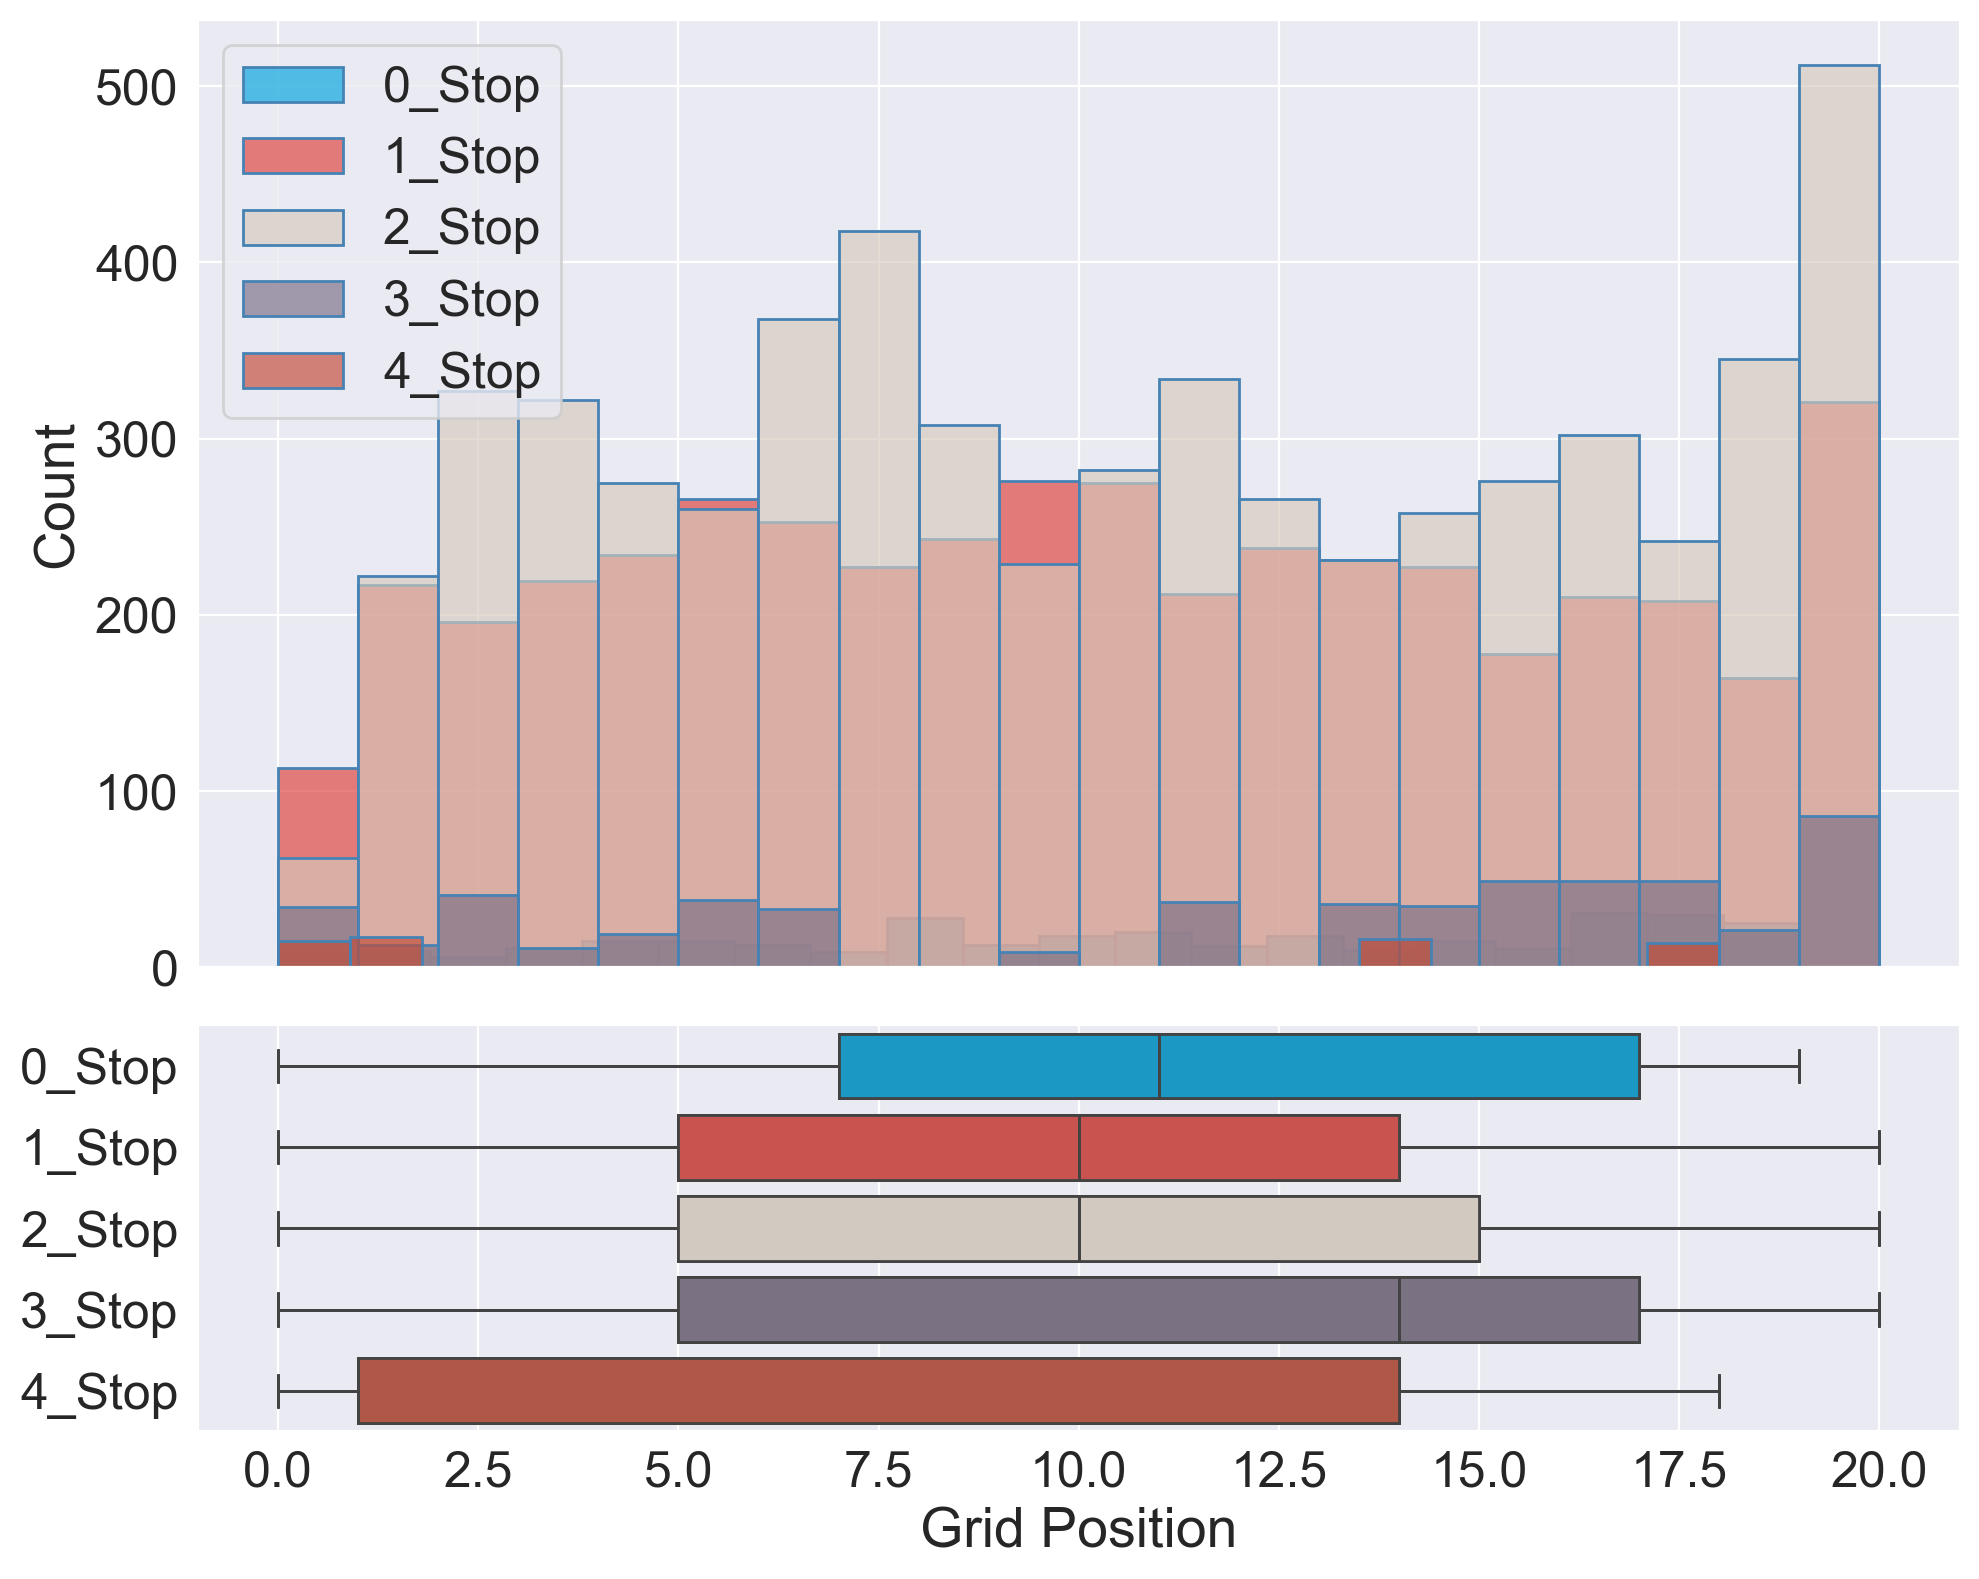

In [19]:
df_0_stop = train_df[train_df['Pit Stops'] == 0]
df_1_stop = train_df[train_df['Pit Stops'] == 1]
df_2_stop = train_df[train_df['Pit Stops'] == 2]
df_3_stop = train_df[train_df['Pit Stops'] == 3]
df_4_stop = train_df[train_df['Pit Stops'] == 4]

plot_continuous('Grid Position')

* Throughout the plot we can see that the frequency of 2-stops is much more compared to the 1-stops, but there are a few observations to note:
* Zero stops, mainly due to DNF's(Did Not Finish), mostly occur on the cars starting from the middle to the back of the grid, this might be due to reliability issues in the cars of the respective teams.
* The range if grid positions in which drivers tend to do a 1-stop, 2-stop and even a 3-stop are quite similar and mostly depend on the track characteristics, the tyre-degradation characteristics of the car and sudden weather changes.
* Zero-stops, four-stops are circumstancial as they occur when there is a change in weather or a broken part on the car or an issue with the engine etc.

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

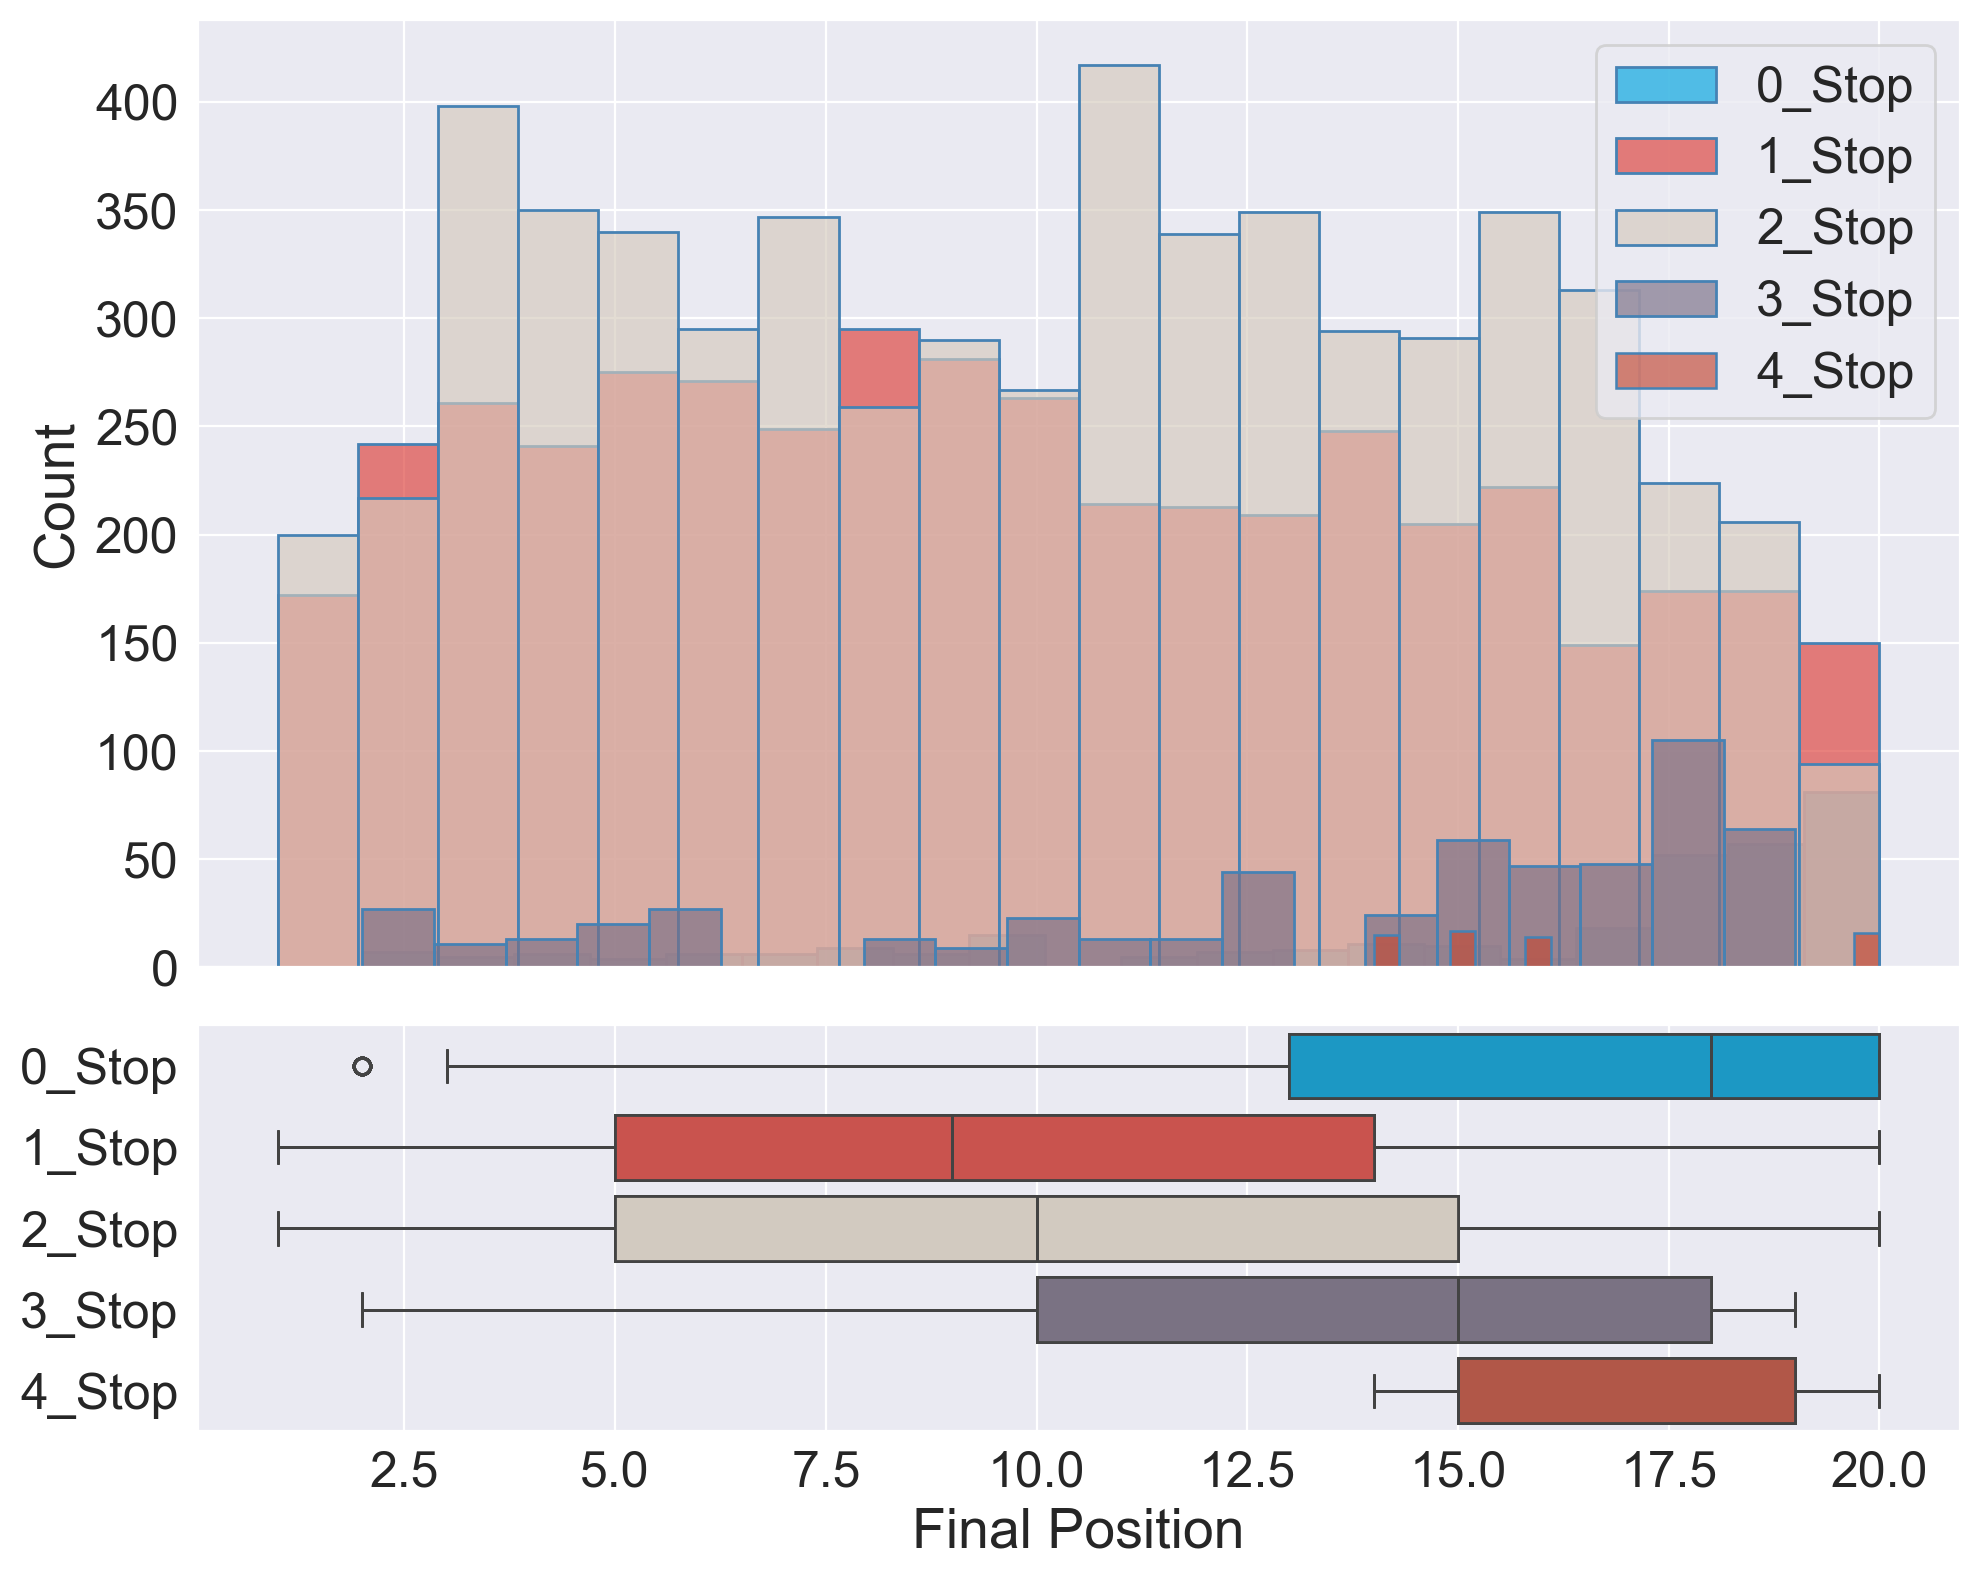

In [20]:
plot_continuous('Final Position')

* Its obvious that zero stoppers will end up at the back of the finishing grid
* The final positions of 1-stoppers and 2-stoppers are quite similar as they depend on the conditions stated previously.
* 3-stops sometimes are not the right call and the drivers end up finishing at the back of the grid and out of the points.
* Similarly for 4-stops

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

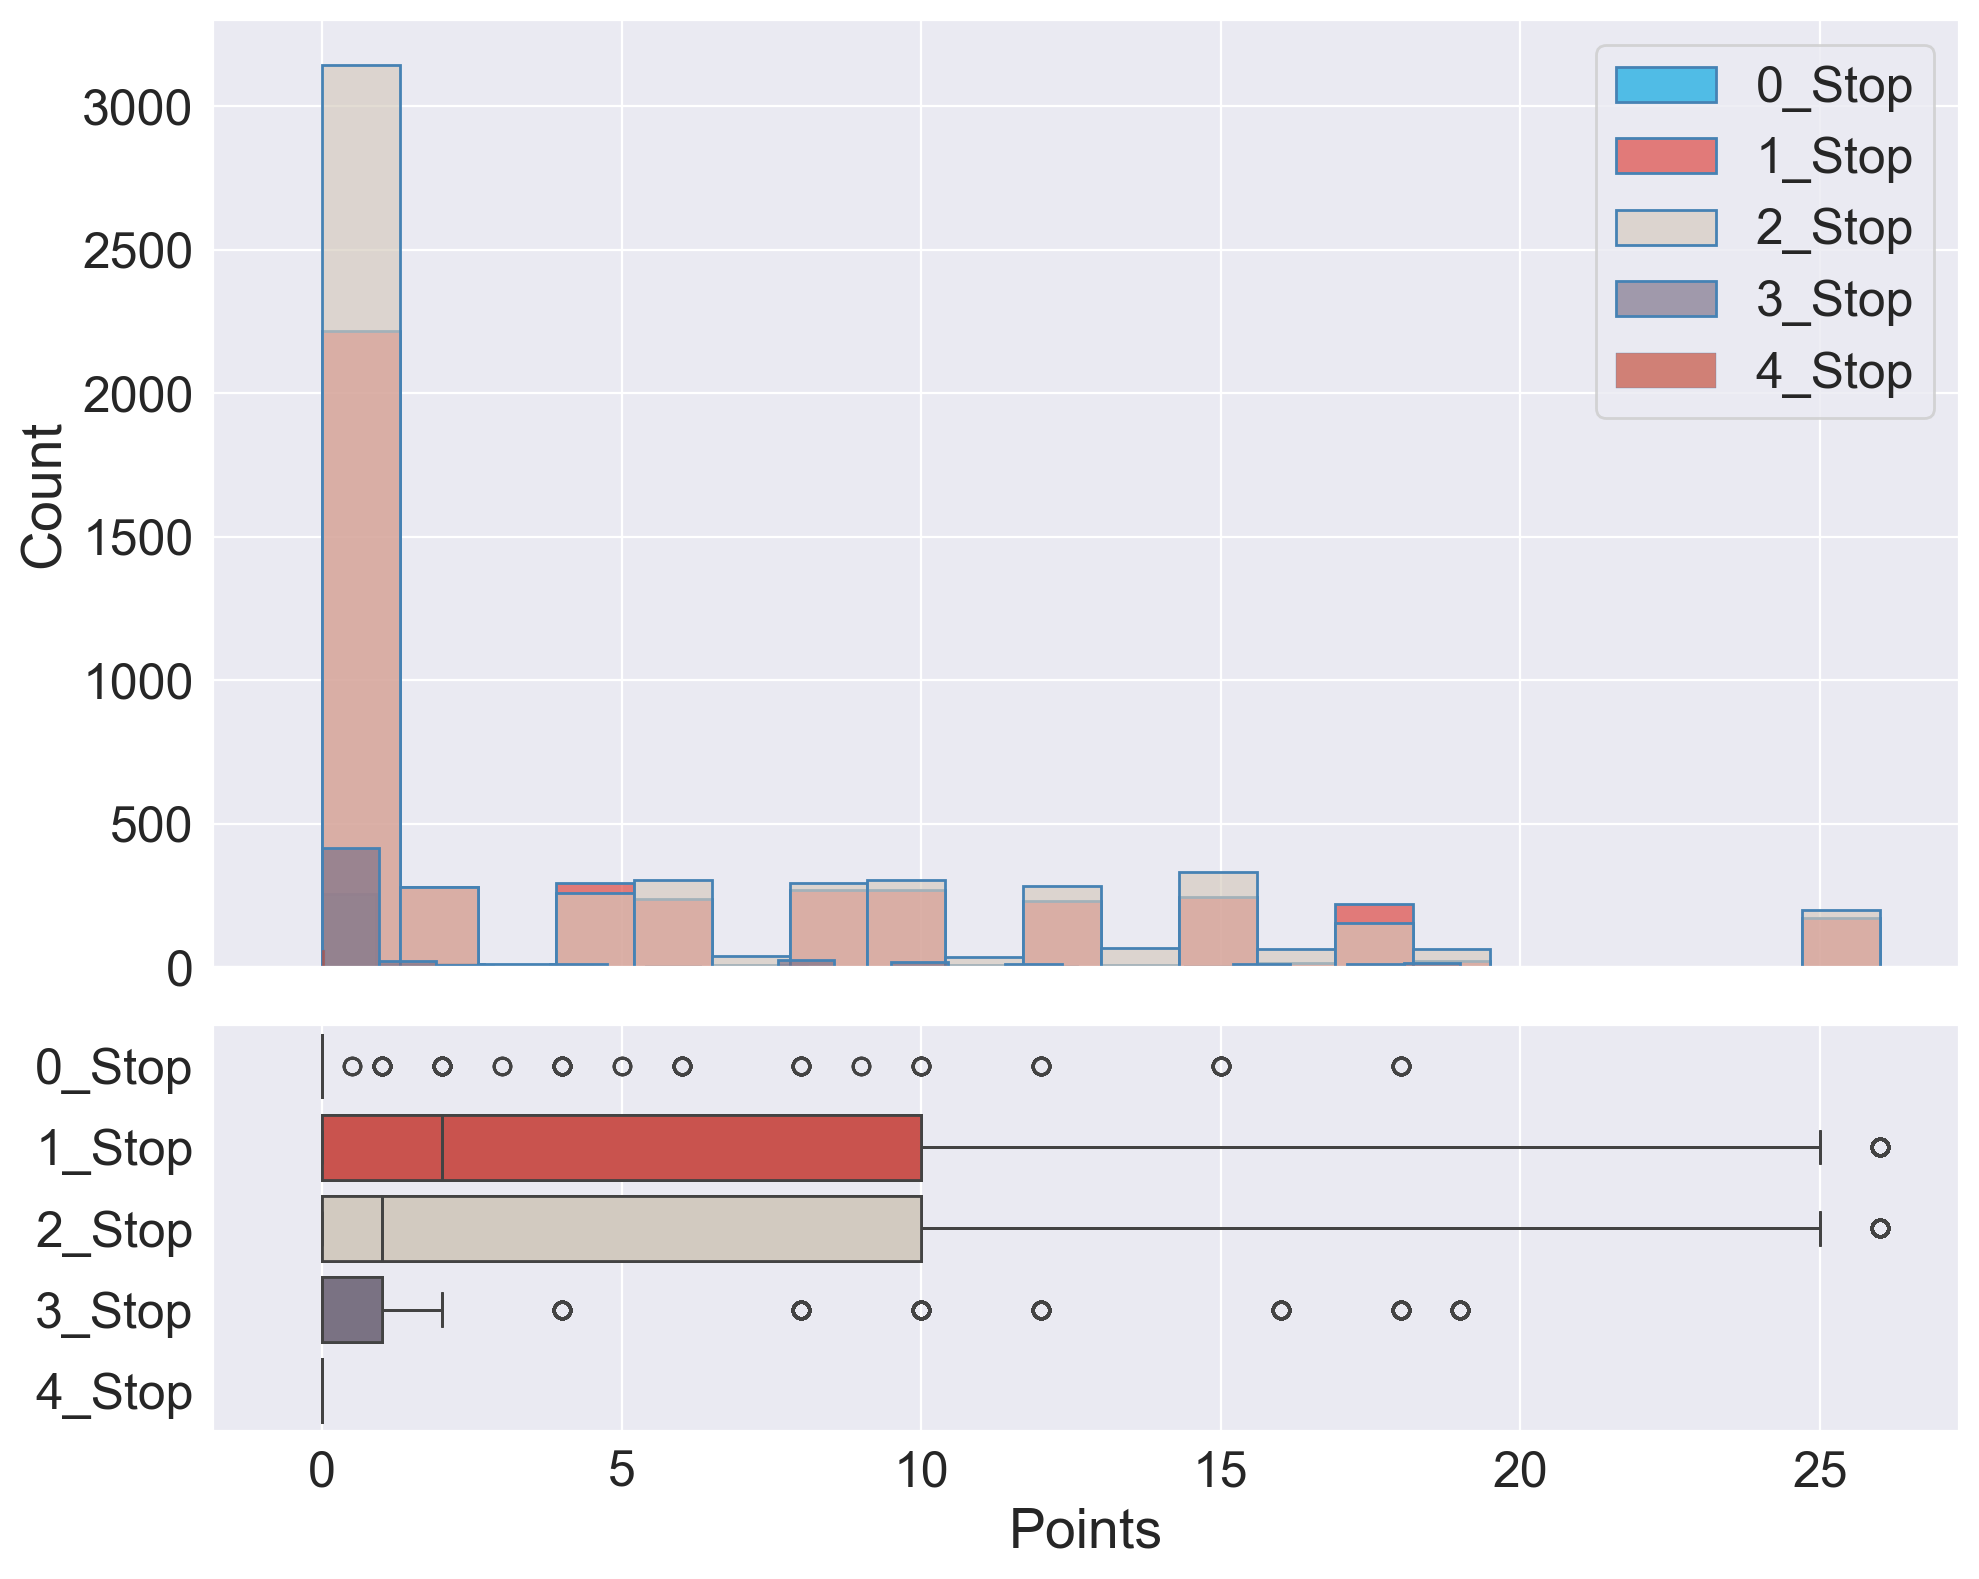

In [21]:
plot_continuous('Points')

As said earlier, we aren't getting much info from Points as a feature and so we will use it to create a feature Points Gained. This will also make use of grid position and final position features

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

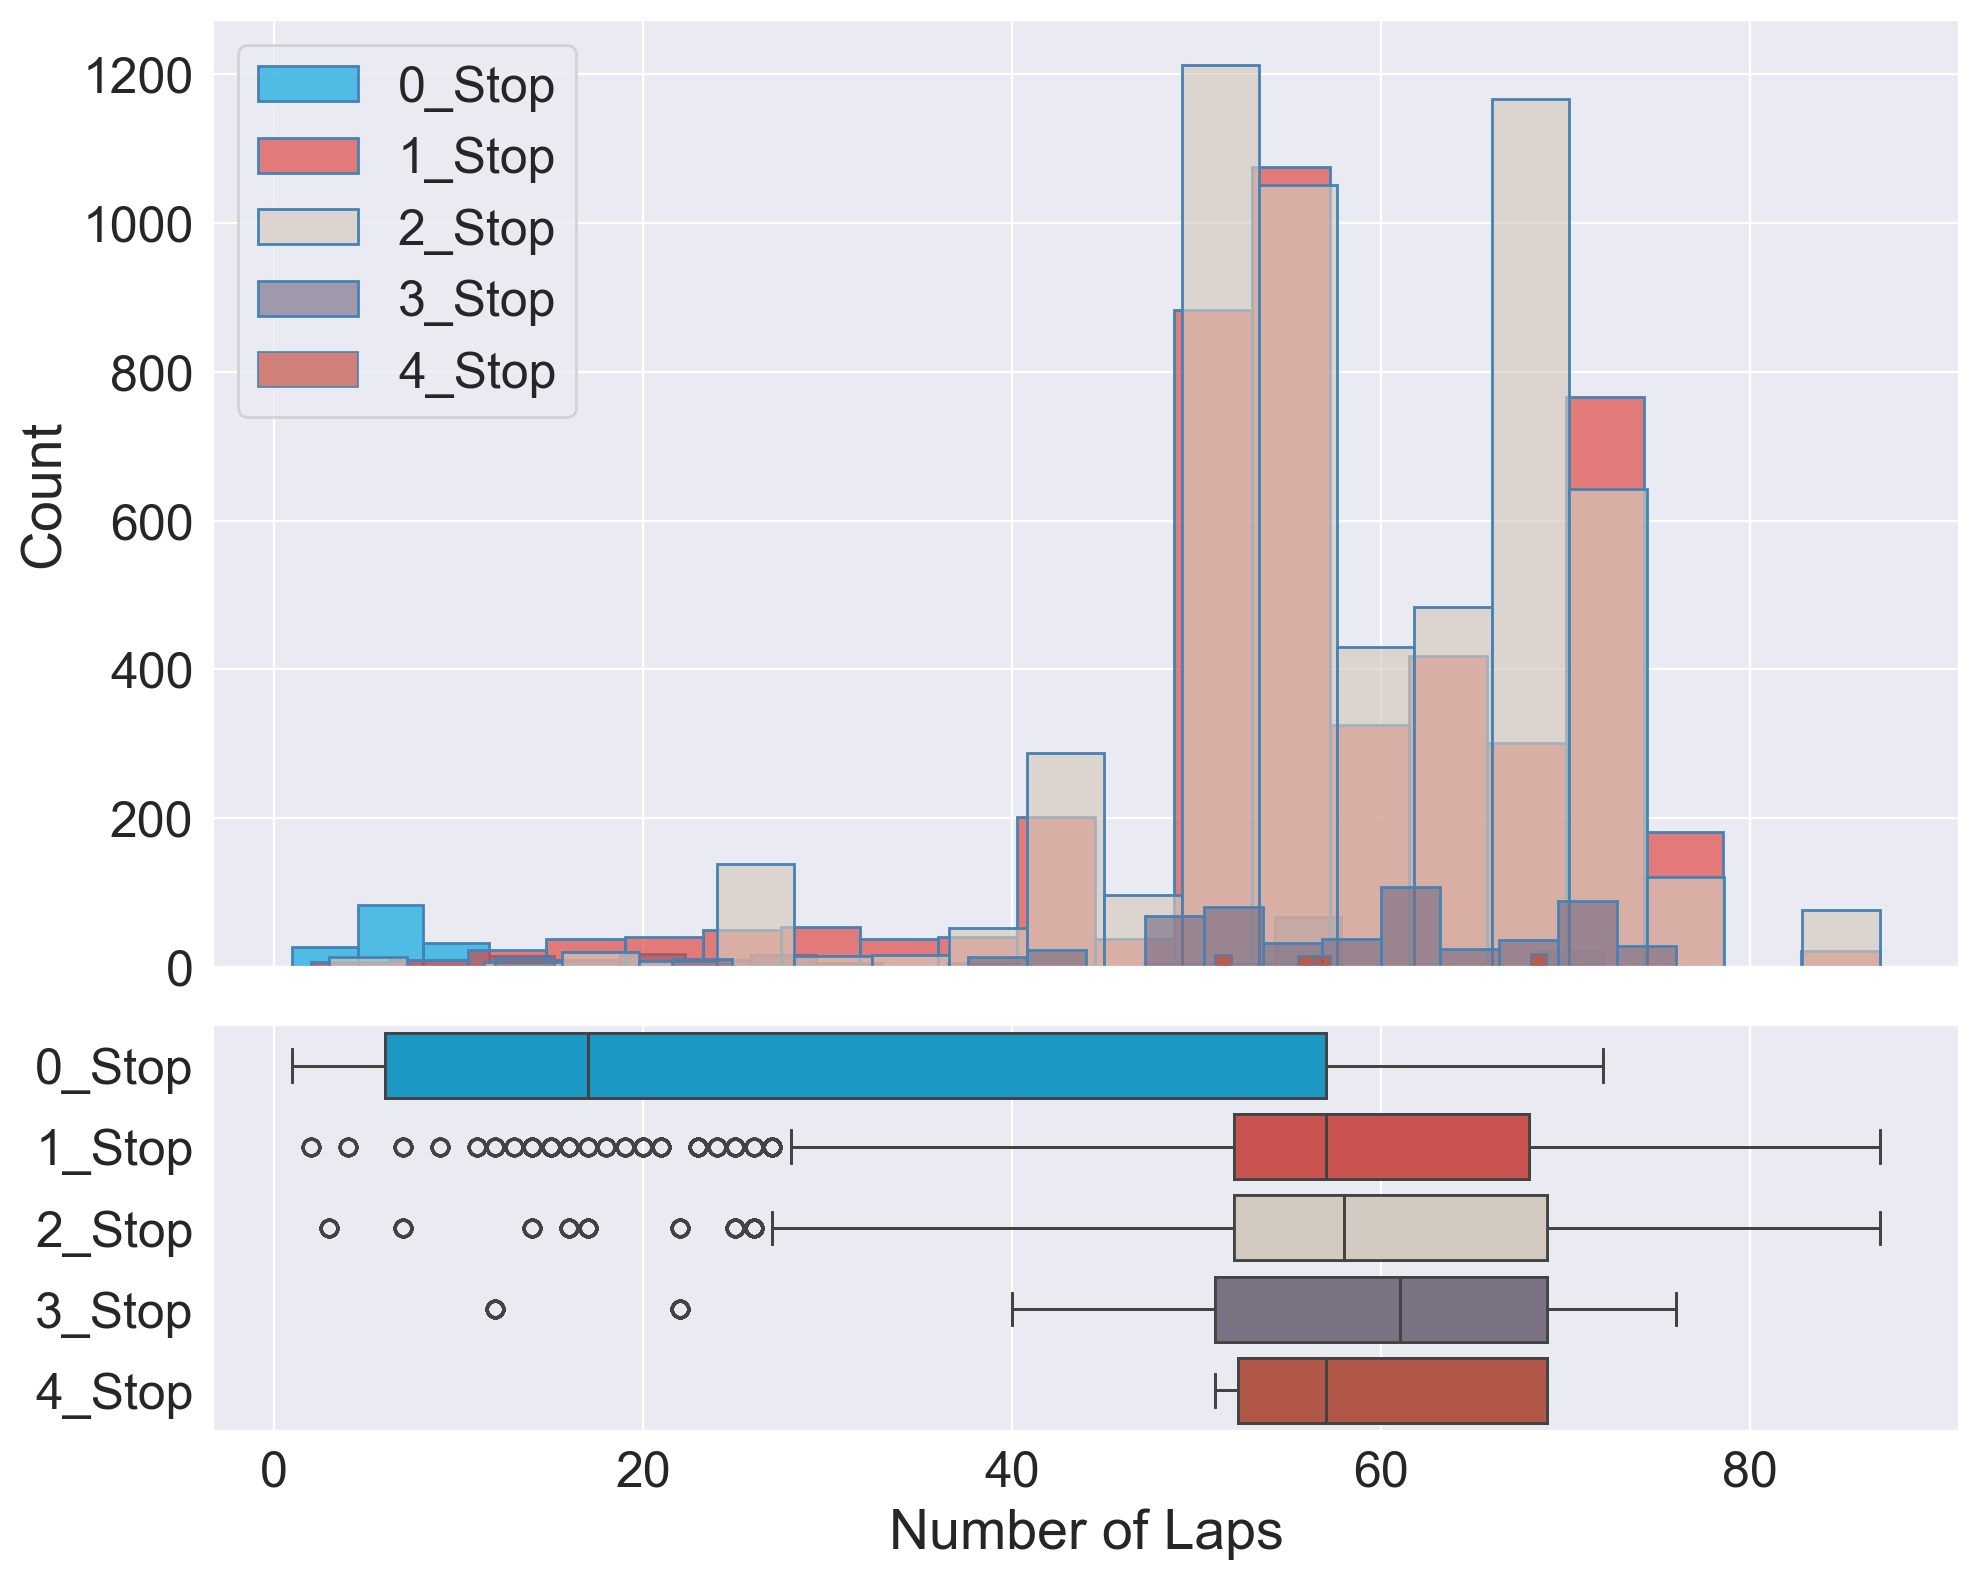

In [22]:
plot_continuous('Number of Laps')

* There are a lot of outliers in this data, but the inference we can make here is that races range from 50-70 laps or so
* Zero stop data represents the laps on which the drivers DNF'ed

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

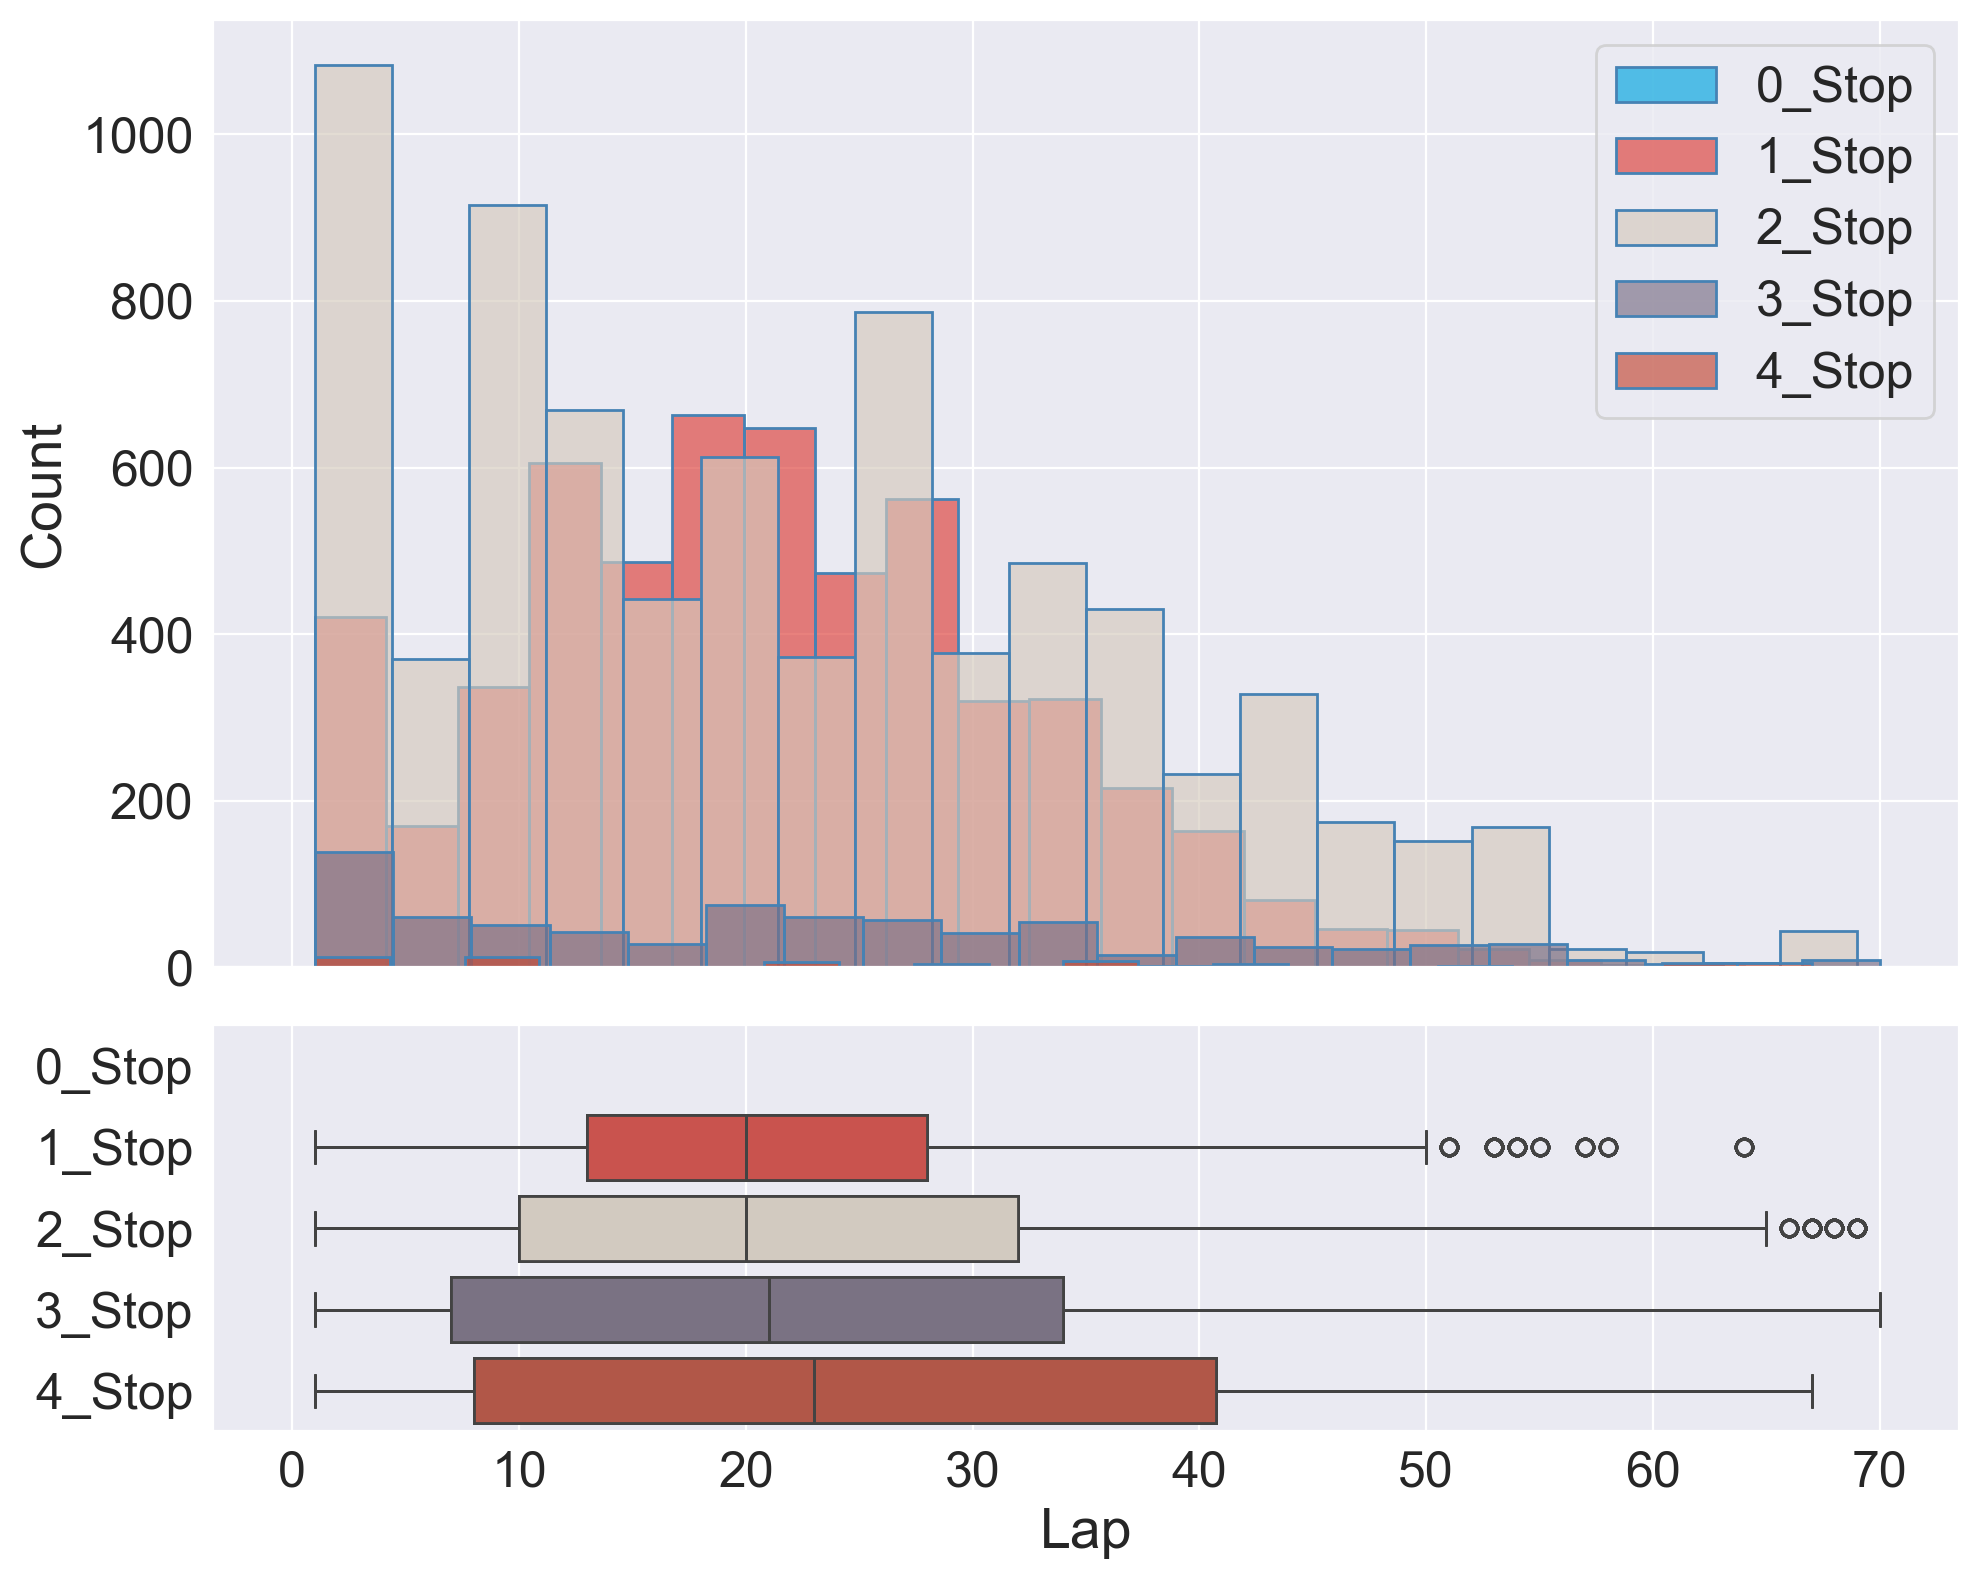

In [23]:
plot_continuous('Lap')

* As obvious as it can be, there is no data on zero stoppers as they do not pit
* When a 2-stop is made, the first stop is most probably made as early as lap 10-15 and then second stop is made 15-17 laps after that.
* It is evident from the box plot, that the pit window for a 1-stop is much narrower than the 2-stop and this pattern goes on until the 4-stop

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

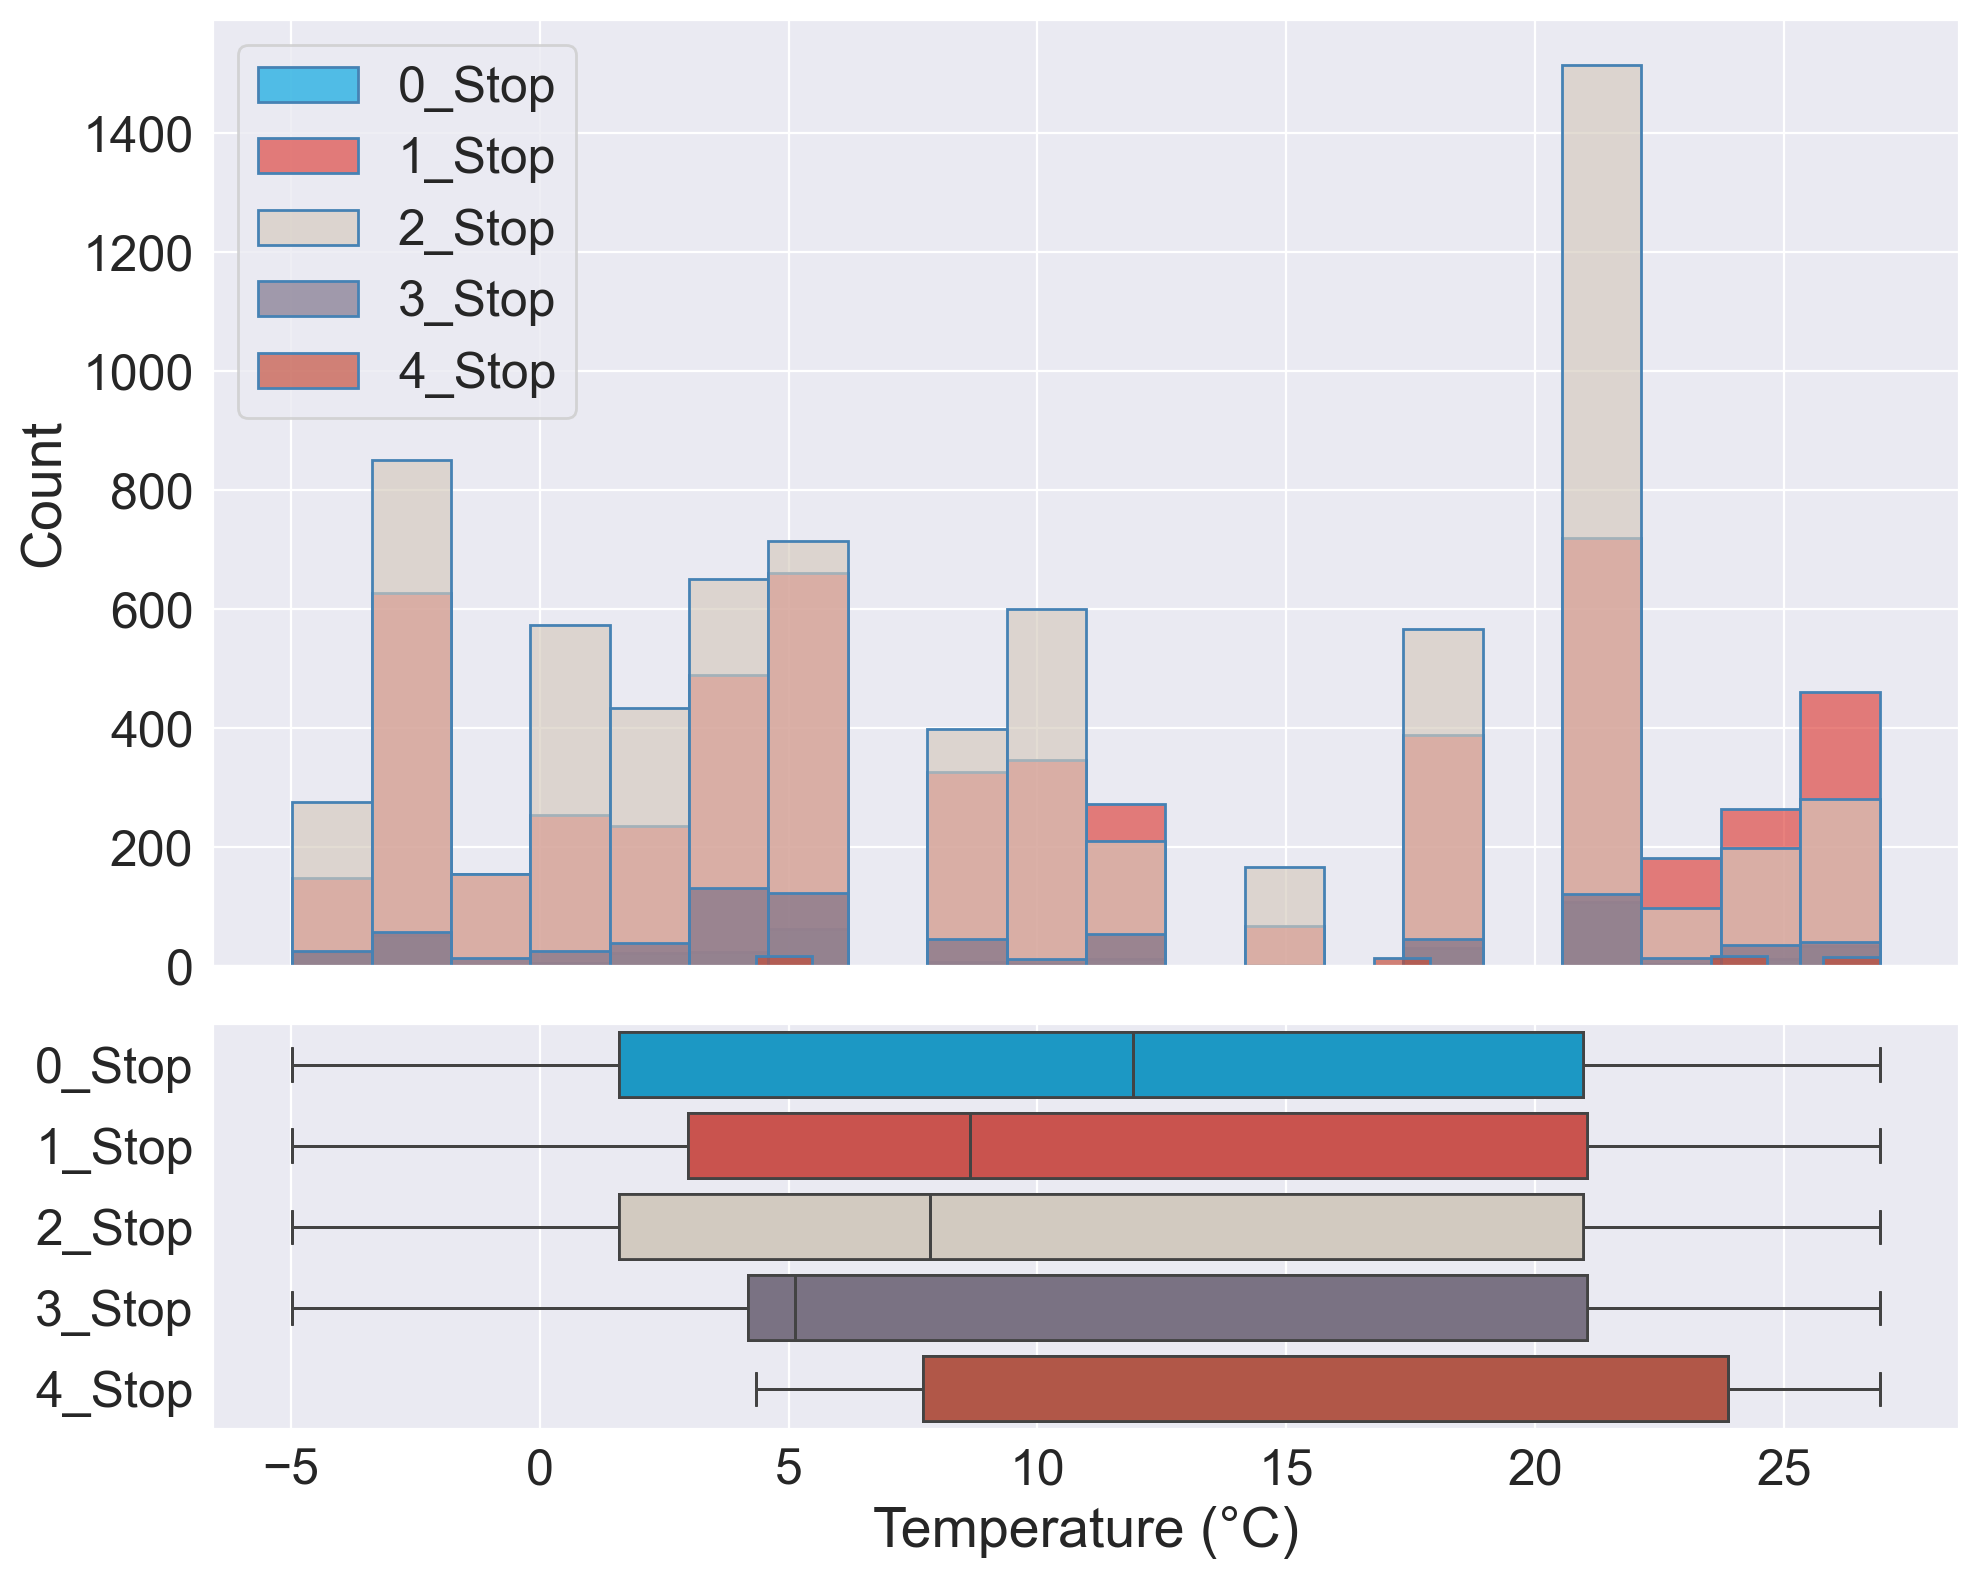

In [24]:
plot_continuous('Temperature (°C)')

* As seen from the plots, over the range of track temperatures and at lower temperatures, 2-stops are more prevelant compared to 1-stops.
* This can be due to the fact that at lower temperatures, cold-graining occurs, and the tyres degrade very fast without the driver being able to extract much performance from it, and so they have to come into the pits for another set of tyres.
* When the track temperatures are higher, it is much easier to fire up the tyres and extract the maximum performance possible from it
* Again, this also depends on how kind a car is on it's tyres.
3-stops and 4-stops are circumstantial

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

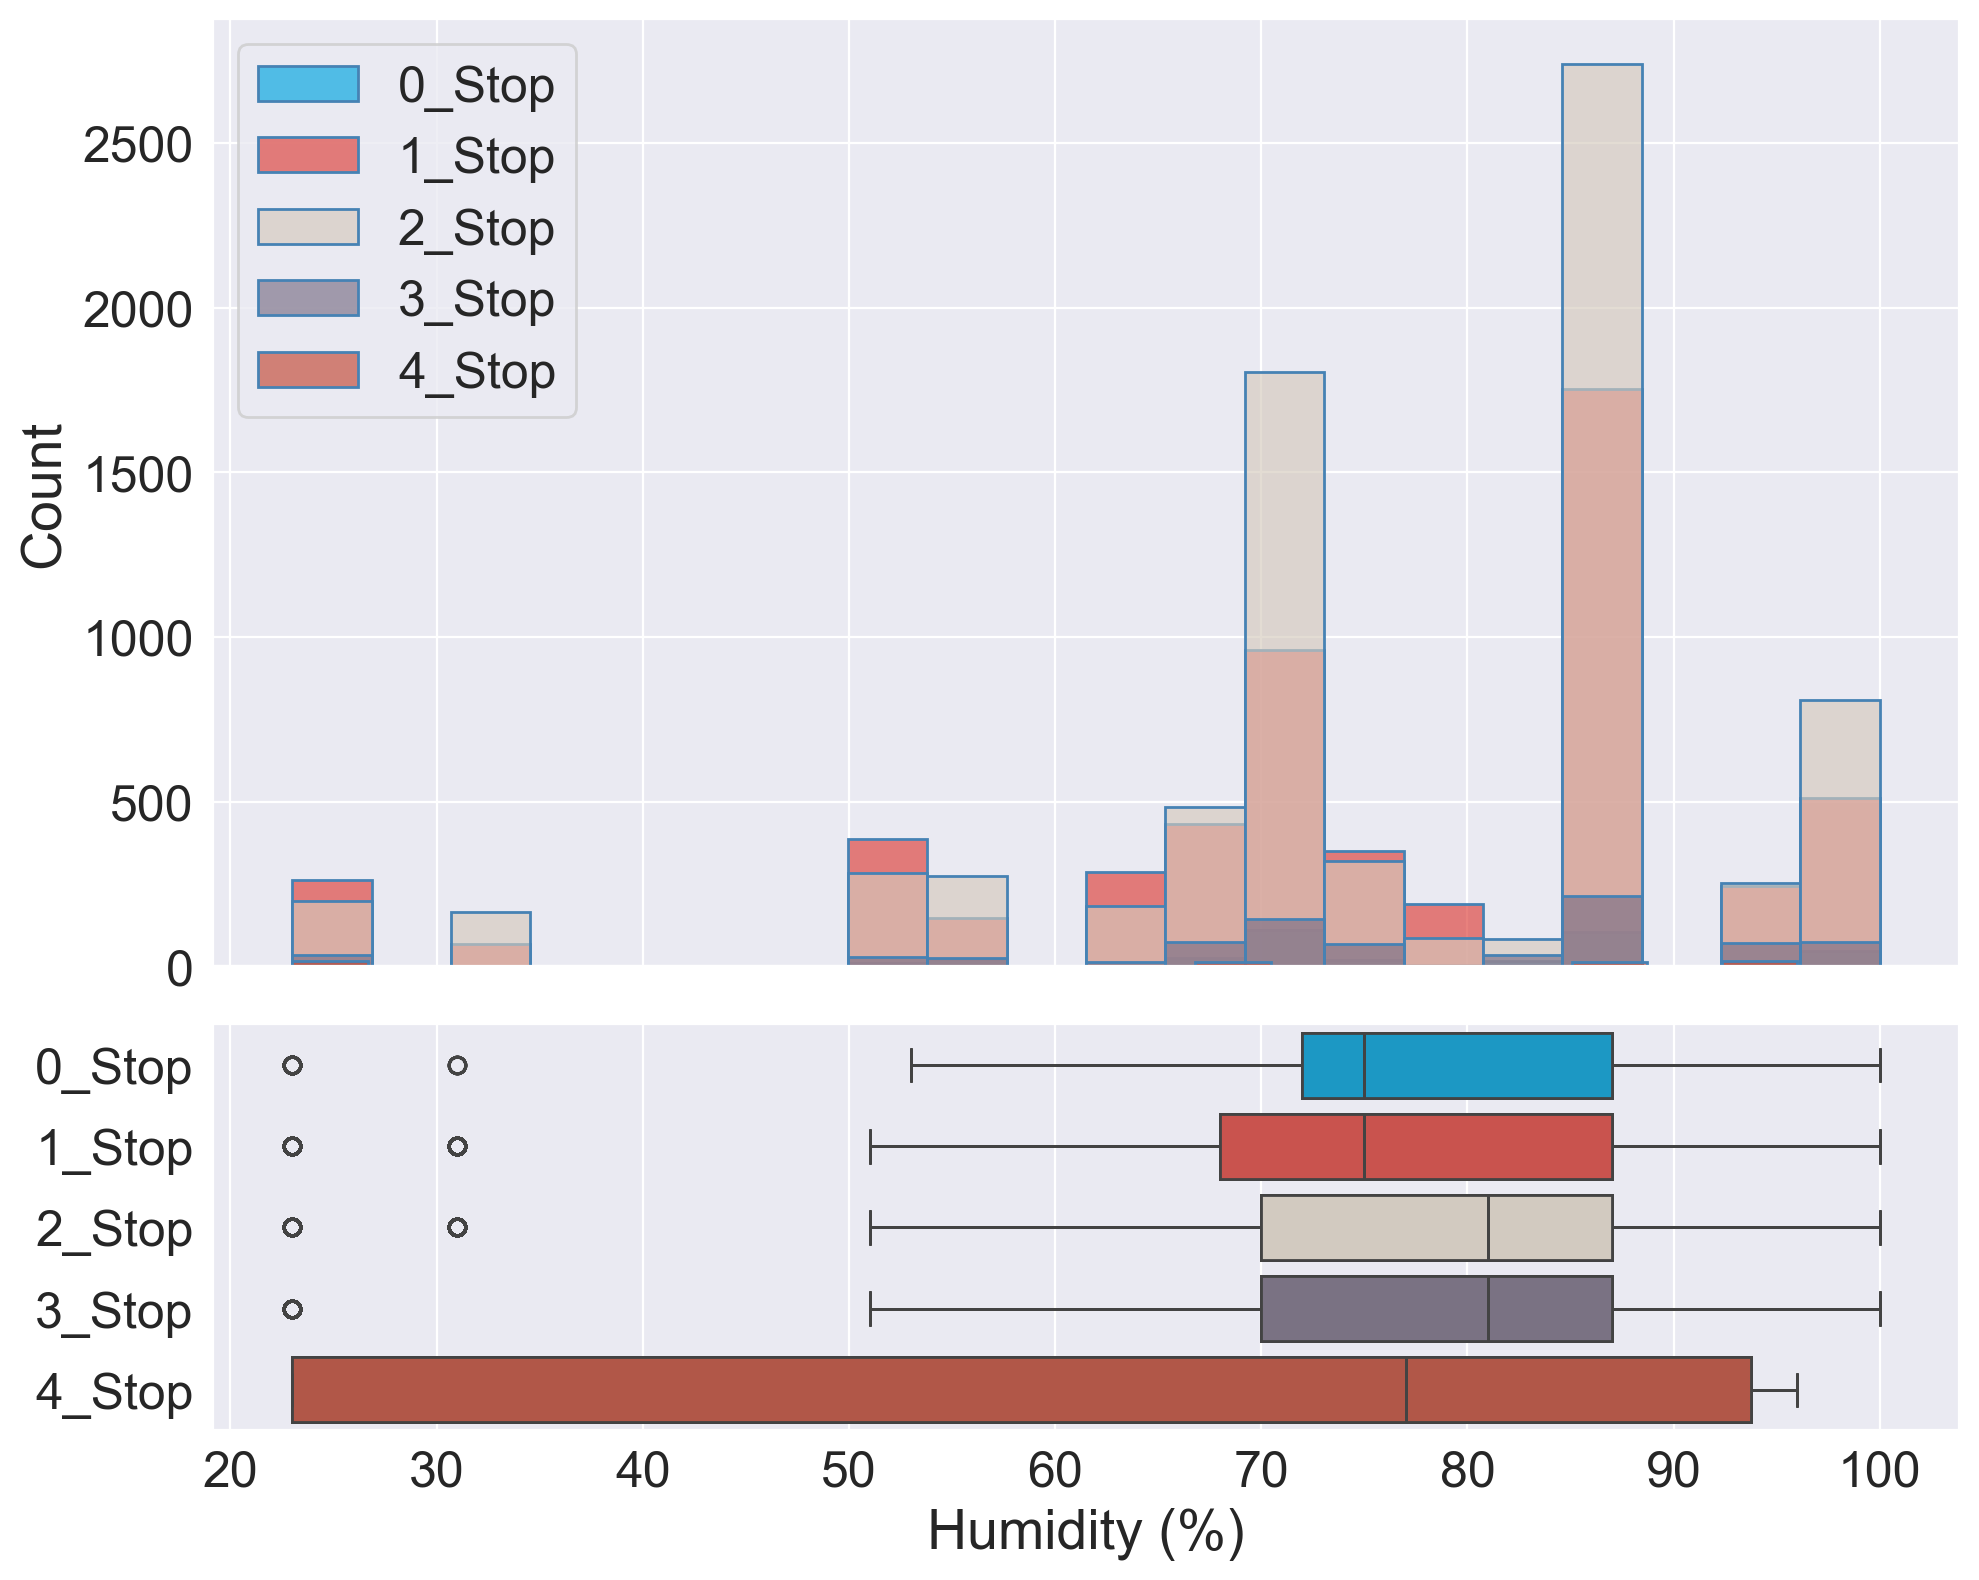

In [25]:
plot_continuous('Humidity (%)')

* From the plot it is evident that when the humidity is below 70%, there is a higher chance of a 1-stop because there is a low chance that there will be any downpour.
* The opposite happens when the humidity is above 70%, which can lead to rain, which therefore leads to higher number of stops.

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0_Stop','1_Stop','2_Stop','3_Stop','4_Stop'])
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1664138167.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

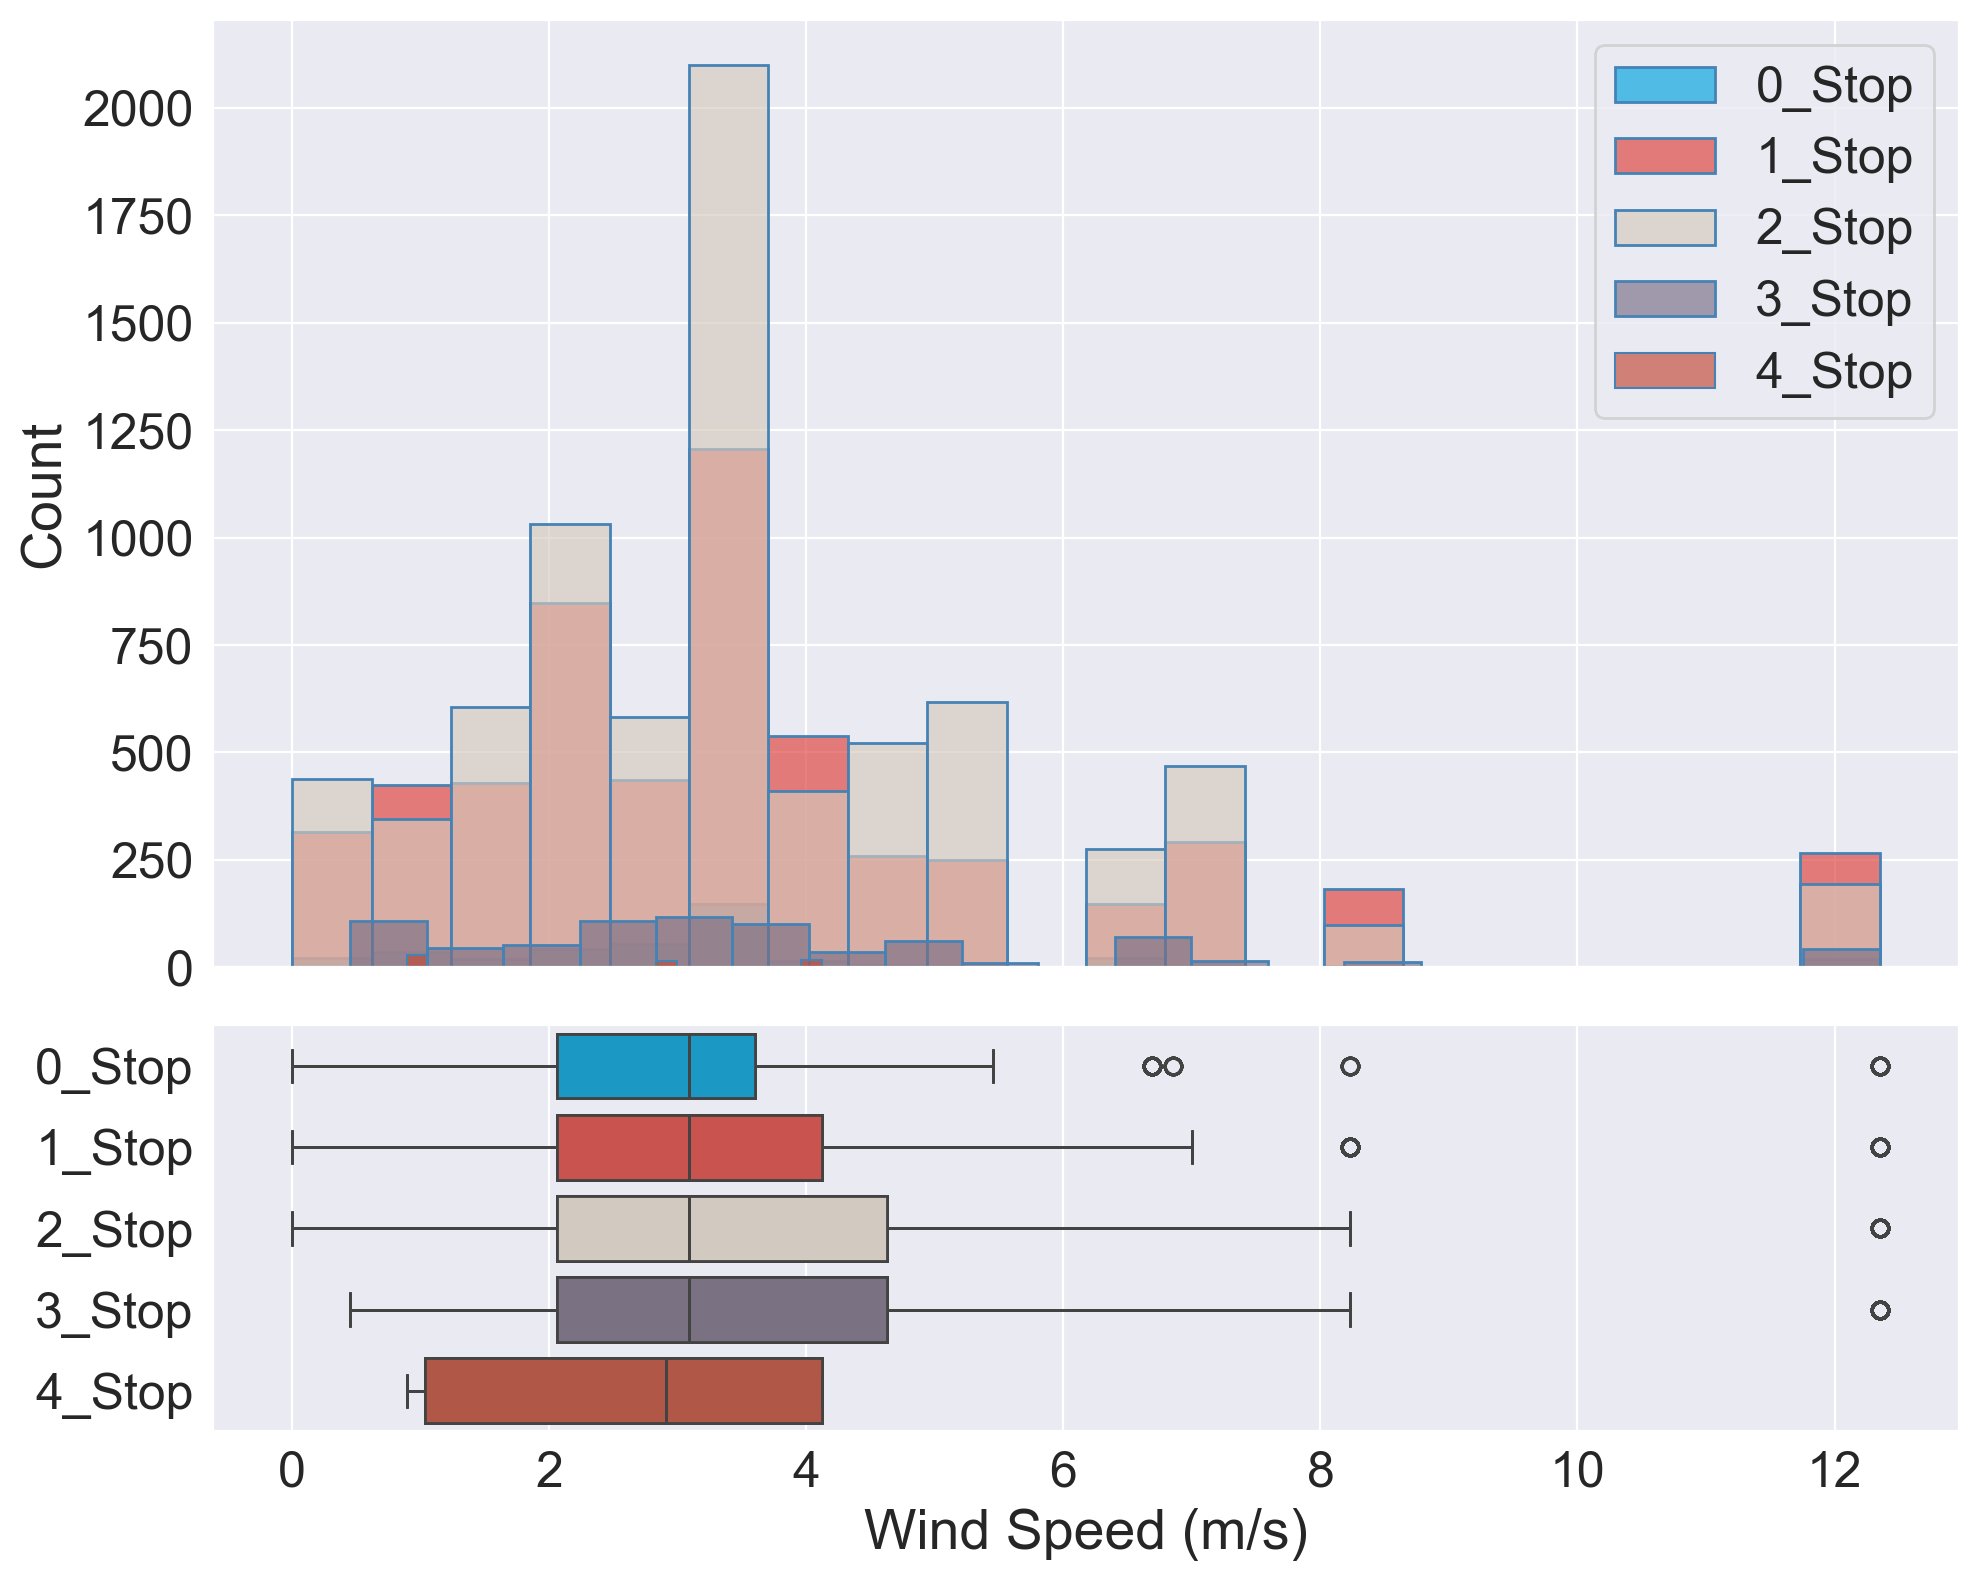

In [26]:
plot_continuous('Wind Speed (m/s)')

From the plot it is evident that in normal conditions, wind speed doesn't dictate whether it's gonna be a 1 stop, 2 stop or 3 stop.

### Categorical Features

Lets check the count of categories in Status

In [27]:
train_df['Status'].value_counts()

Status
Finished            6831
+1 Lap              2616
+2 Laps              502
Collision            199
Collision damage     140
Accident             130
Engine               122
Retired               98
Gearbox               80
Brakes                55
Power Unit            54
+3 Laps               50
Suspension            38
Disqualified          29
Overheating           26
Undertray             22
Power loss            21
Water pressure        19
Mechanical            18
Electronics           15
Hydraulics            15
Oil leak              15
Puncture              13
Radiator              13
Rear wing             13
+5 Laps               12
Spun off              10
Cooling system        10
Fuel pump             10
Damage                 9
Water leak             9
Wheel                  9
Withdrew               8
+6 Laps                8
Illness                7
Electrical             6
Water pump             6
Turbo                  6
Wheel nut              5
Debris            

In [28]:
#We can replace the categories that are not Finished, +1 Lap and +2 Lap with DNF(Did Not Finish)
#This will be easier to visualise and for the model to find patterns in data
status_values = train_df['Status'].values
for stat_val in status_values:
  if stat_val not in ['Finished','+1 Lap','+2 Laps']:
    train_df['Status'].replace(stat_val,'DNF',inplace=True)
    test_df['Status'].replace(stat_val,'DNF',inplace=True)

train_df['Status'].value_counts()

Status
Finished    6831
DNF         4580
+1 Lap      2616
+2 Laps      502
Name: count, dtype: int64

In [29]:
test_df['Status'].value_counts()

Status
Finished    1736
DNF         1119
+1 Lap       663
+2 Laps      115
Name: count, dtype: int64

In [30]:
#Since the some categorical values in the features are lengthy let us shorten them to first 2 characters
for feature in ['Race Name','Driver ID']:
  train_df[feature] = train_df[feature].str[:2]
  test_df[feature] = test_df[feature].str[:2]

#For teams let us make it 3 characters, it will be easier to understand
train_df['Constructor Name'] = train_df['Constructor Name'].str[:2]
test_df['Constructor Name'] = test_df['Constructor Name'].str[:2]

test_df[['Race Name','Driver ID','Constructor Name']].head()

Race Name Driver ID Constructor Name
0        Ba        le               Fe
1        Ab        bo               Me
2        Ja        ru               Wi
3        Hu        sa               Wi
4        Hu        ve               As

In [31]:
#let us check the weather values counts
train_df['Weather'].value_counts()

Weather
broken clouds                  3210
clear sky                      2969
overcast clouds                2550
few clouds                     1713
scattered clouds               1208
light rain                      703
mist                            598
light intensity drizzle         587
light intensity shower rain     522
moderate rain                   469
Name: count, dtype: int64

In [32]:
#Let us categorize these values into rain or no rain

no_rain_conditions = ['clear sky','broken clouds','overcast clouds','few clouds','scattered clouds']

train_df['Weather'] = np.where(train_df['Weather'].isin(no_rain_conditions),'No rain','Rain')
test_df['Weather'] = np.where(test_df['Weather'].isin(no_rain_conditions),'No rain','Rain')

train_df['Weather'].value_counts()

Weather
No rain    11650
Rain        2879
Name: count, dtype: int64

In [33]:
categorical

['Year', 'Race Name', 'Driver ID', 'Constructor Name', 'Status', 'Weather']

In [34]:
#Creating a dataframe from categorical features
df_cat = train_df[categorical]

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\4119755032.py:4: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  sns.countplot(x=feature,
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\4119755032.py:4: UserWarning: 
The palette list has fewer values (11) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=feature,
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\4119755032.py:4: UserWarning: 
The palette list has fewer values (11) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=feature,
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\4119755032.py:4: UserWarning: 
The palette list has fewer values (11) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=feature,
C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\4119755032.py:4: UserWarning: The palette list has more values (11) than needed (4), wh

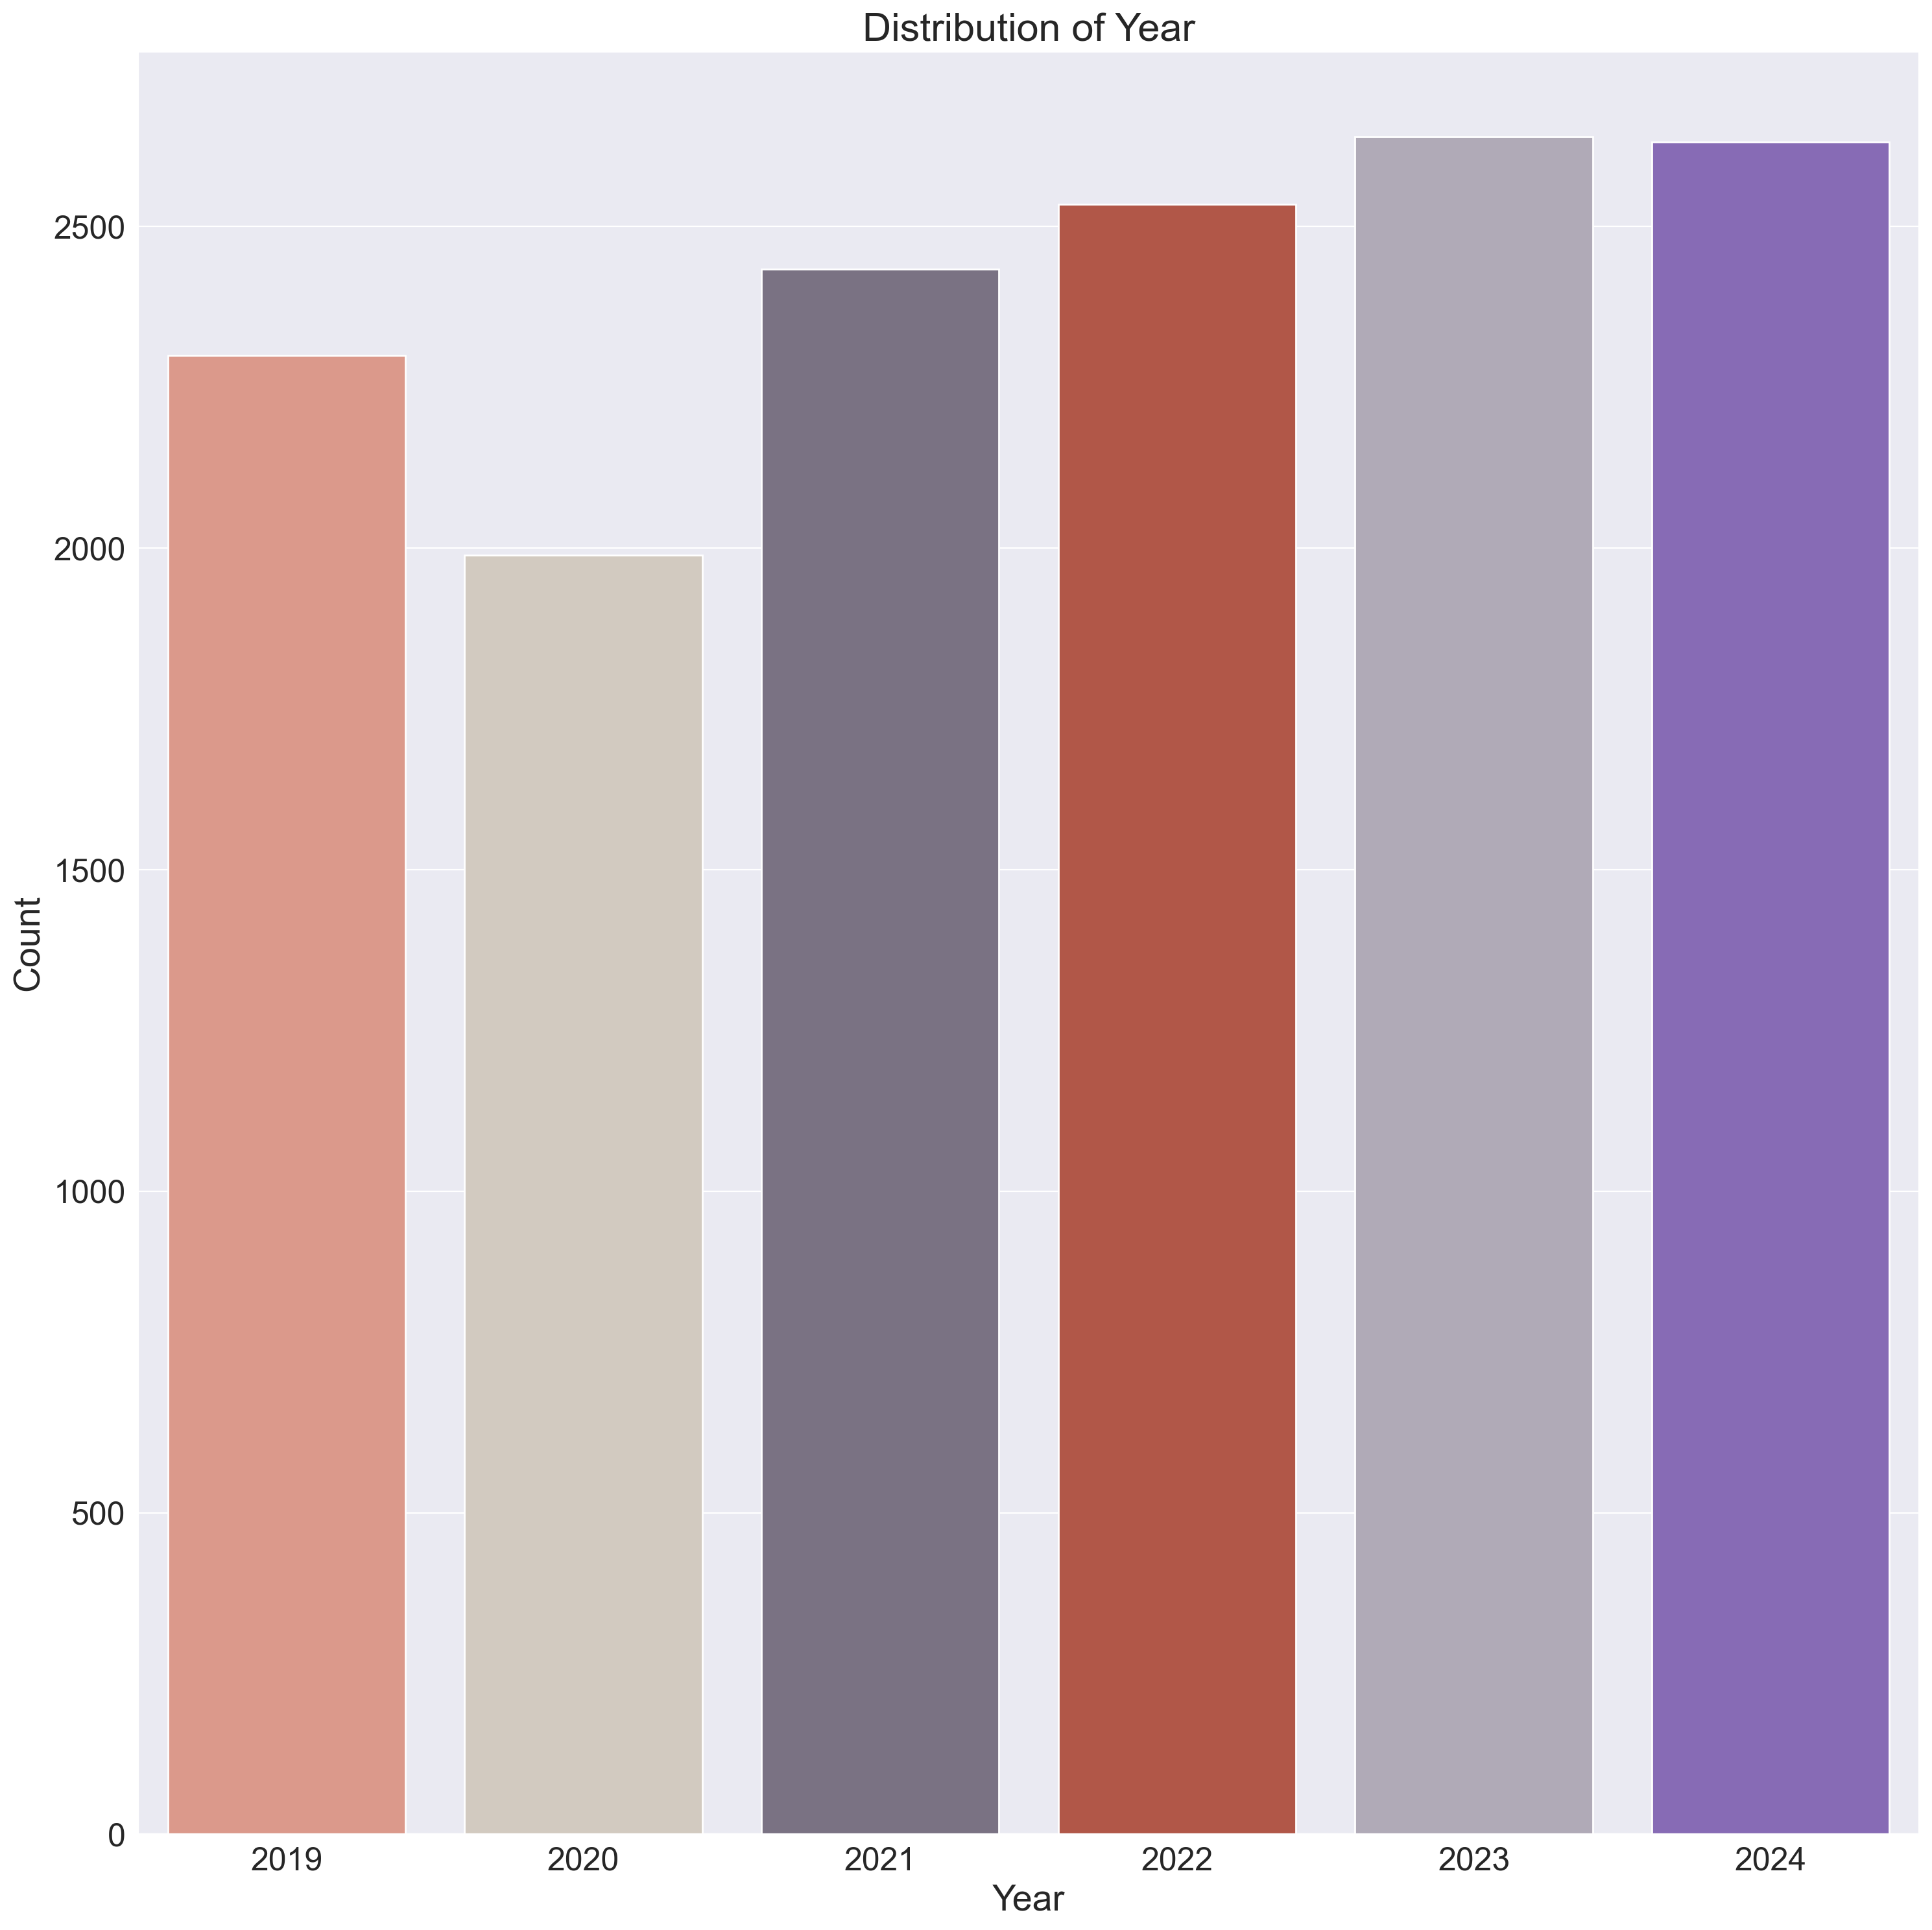

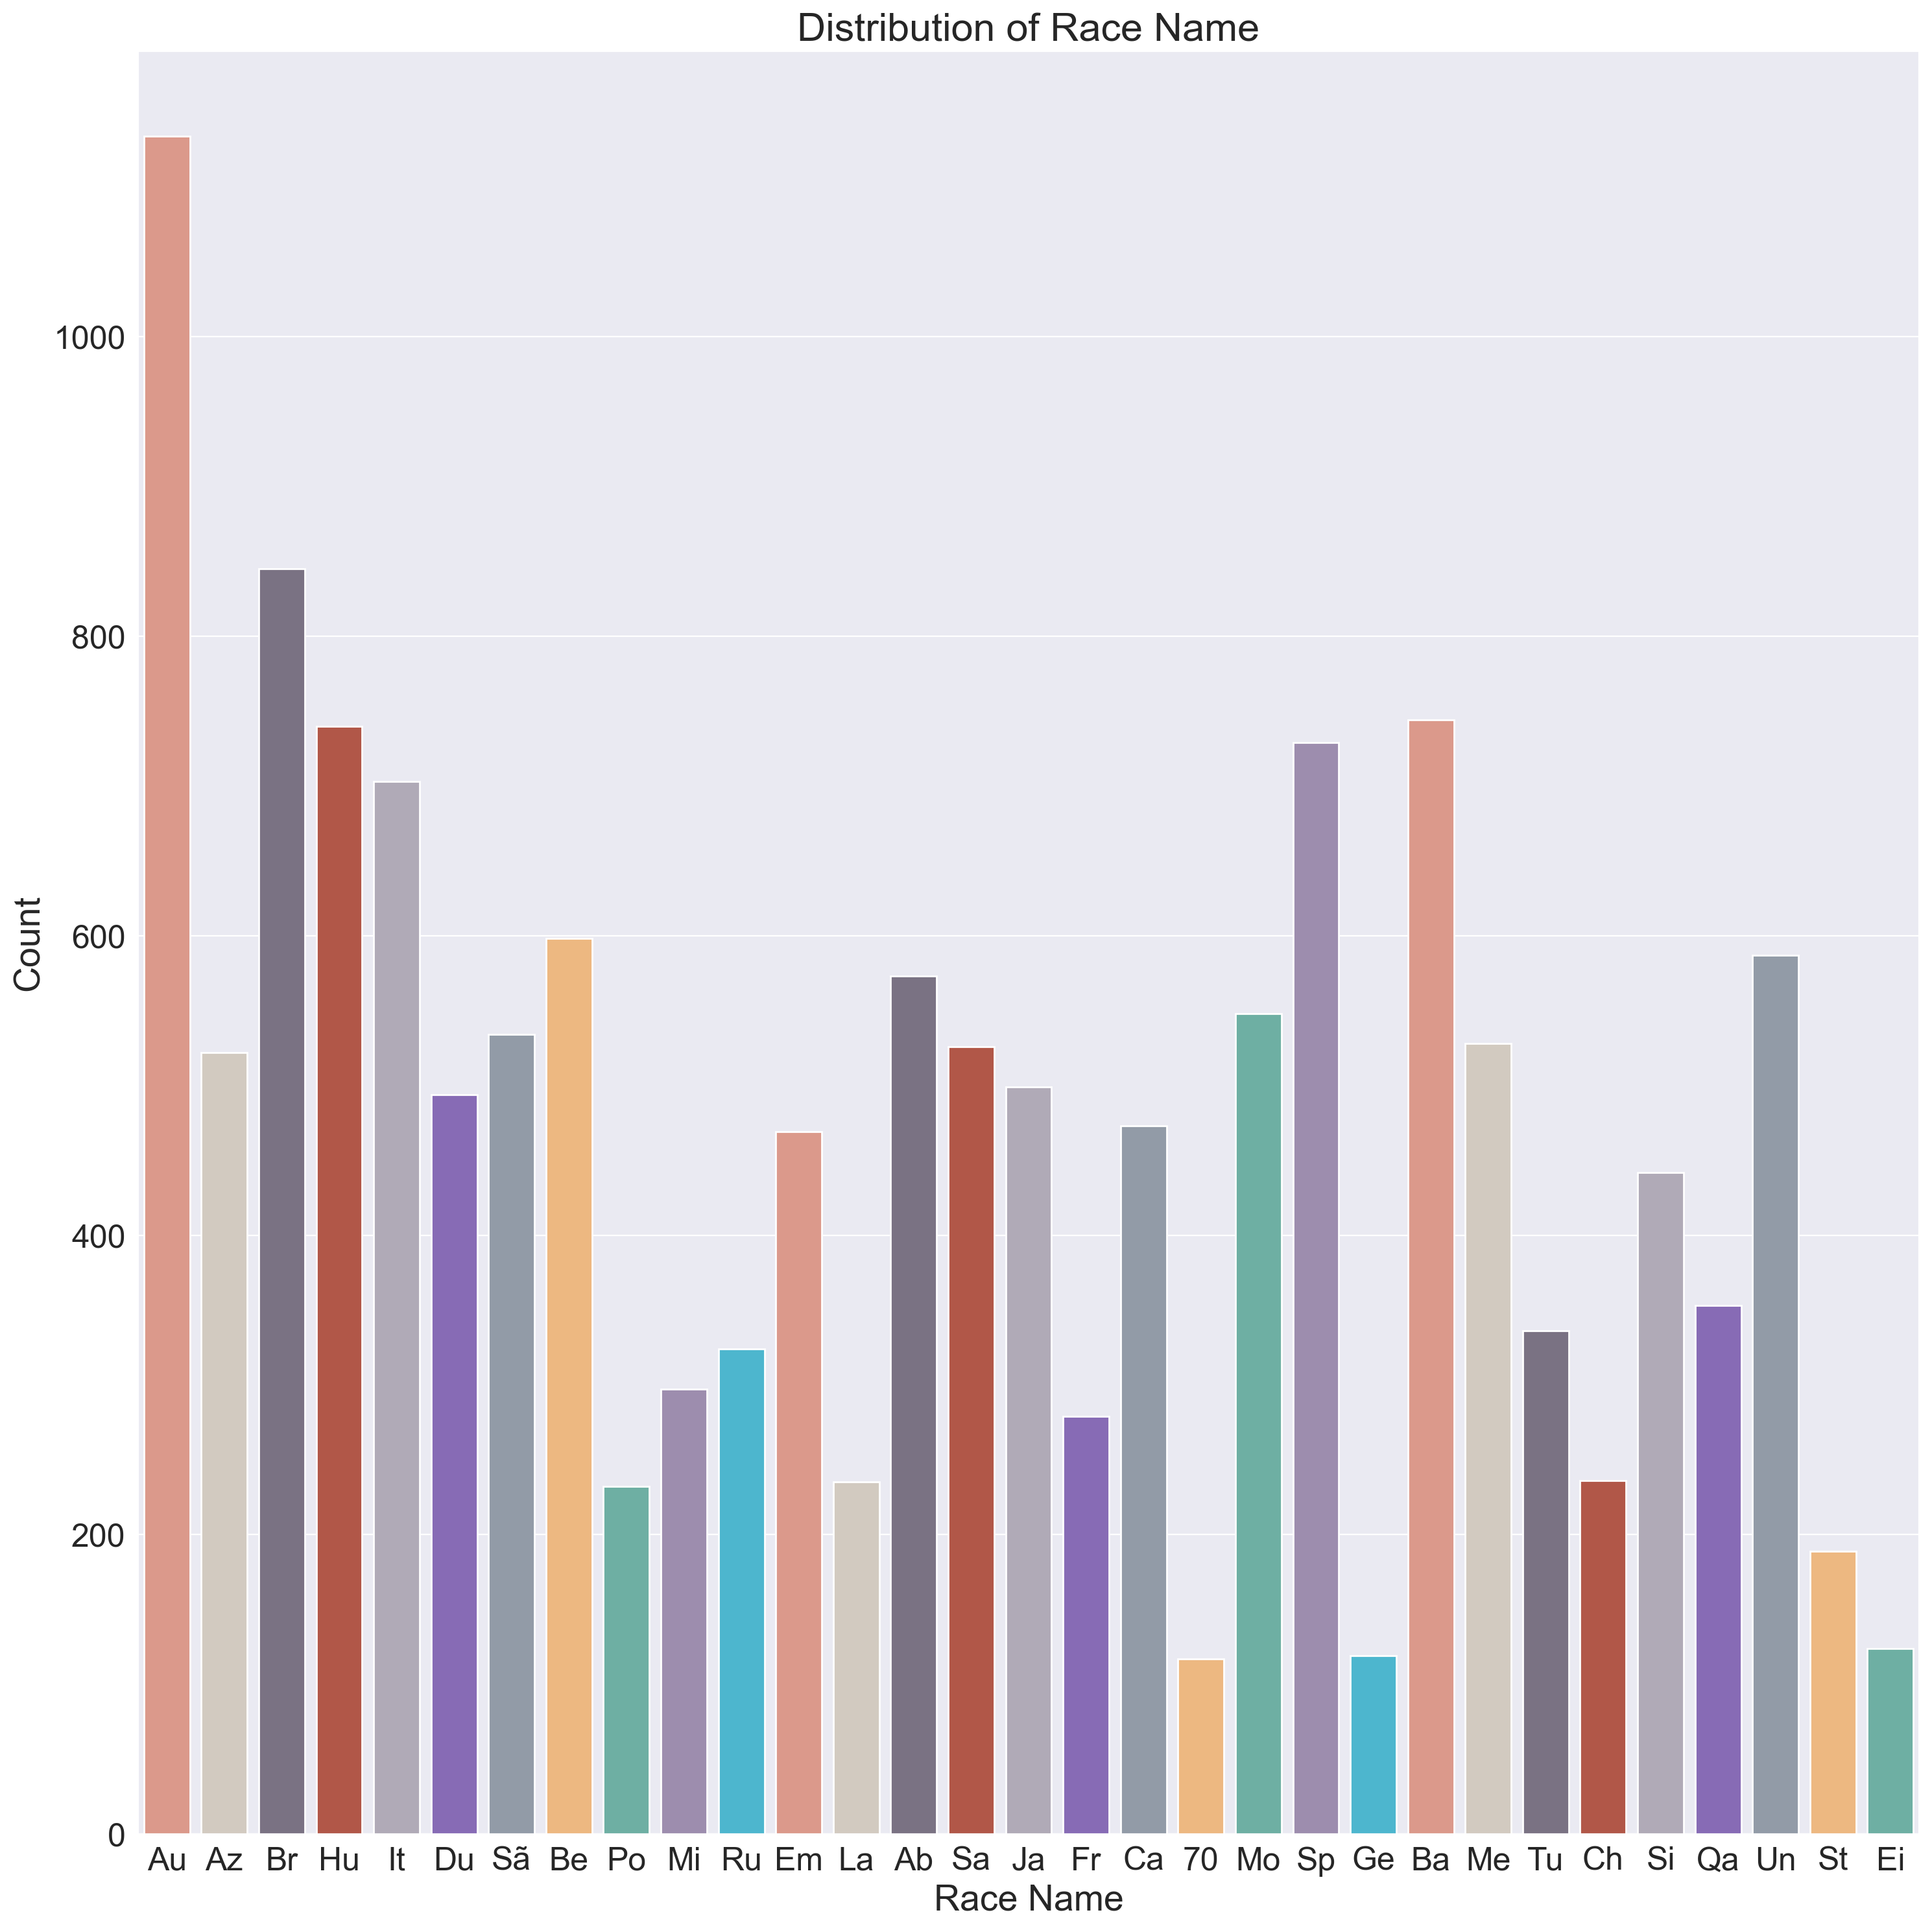

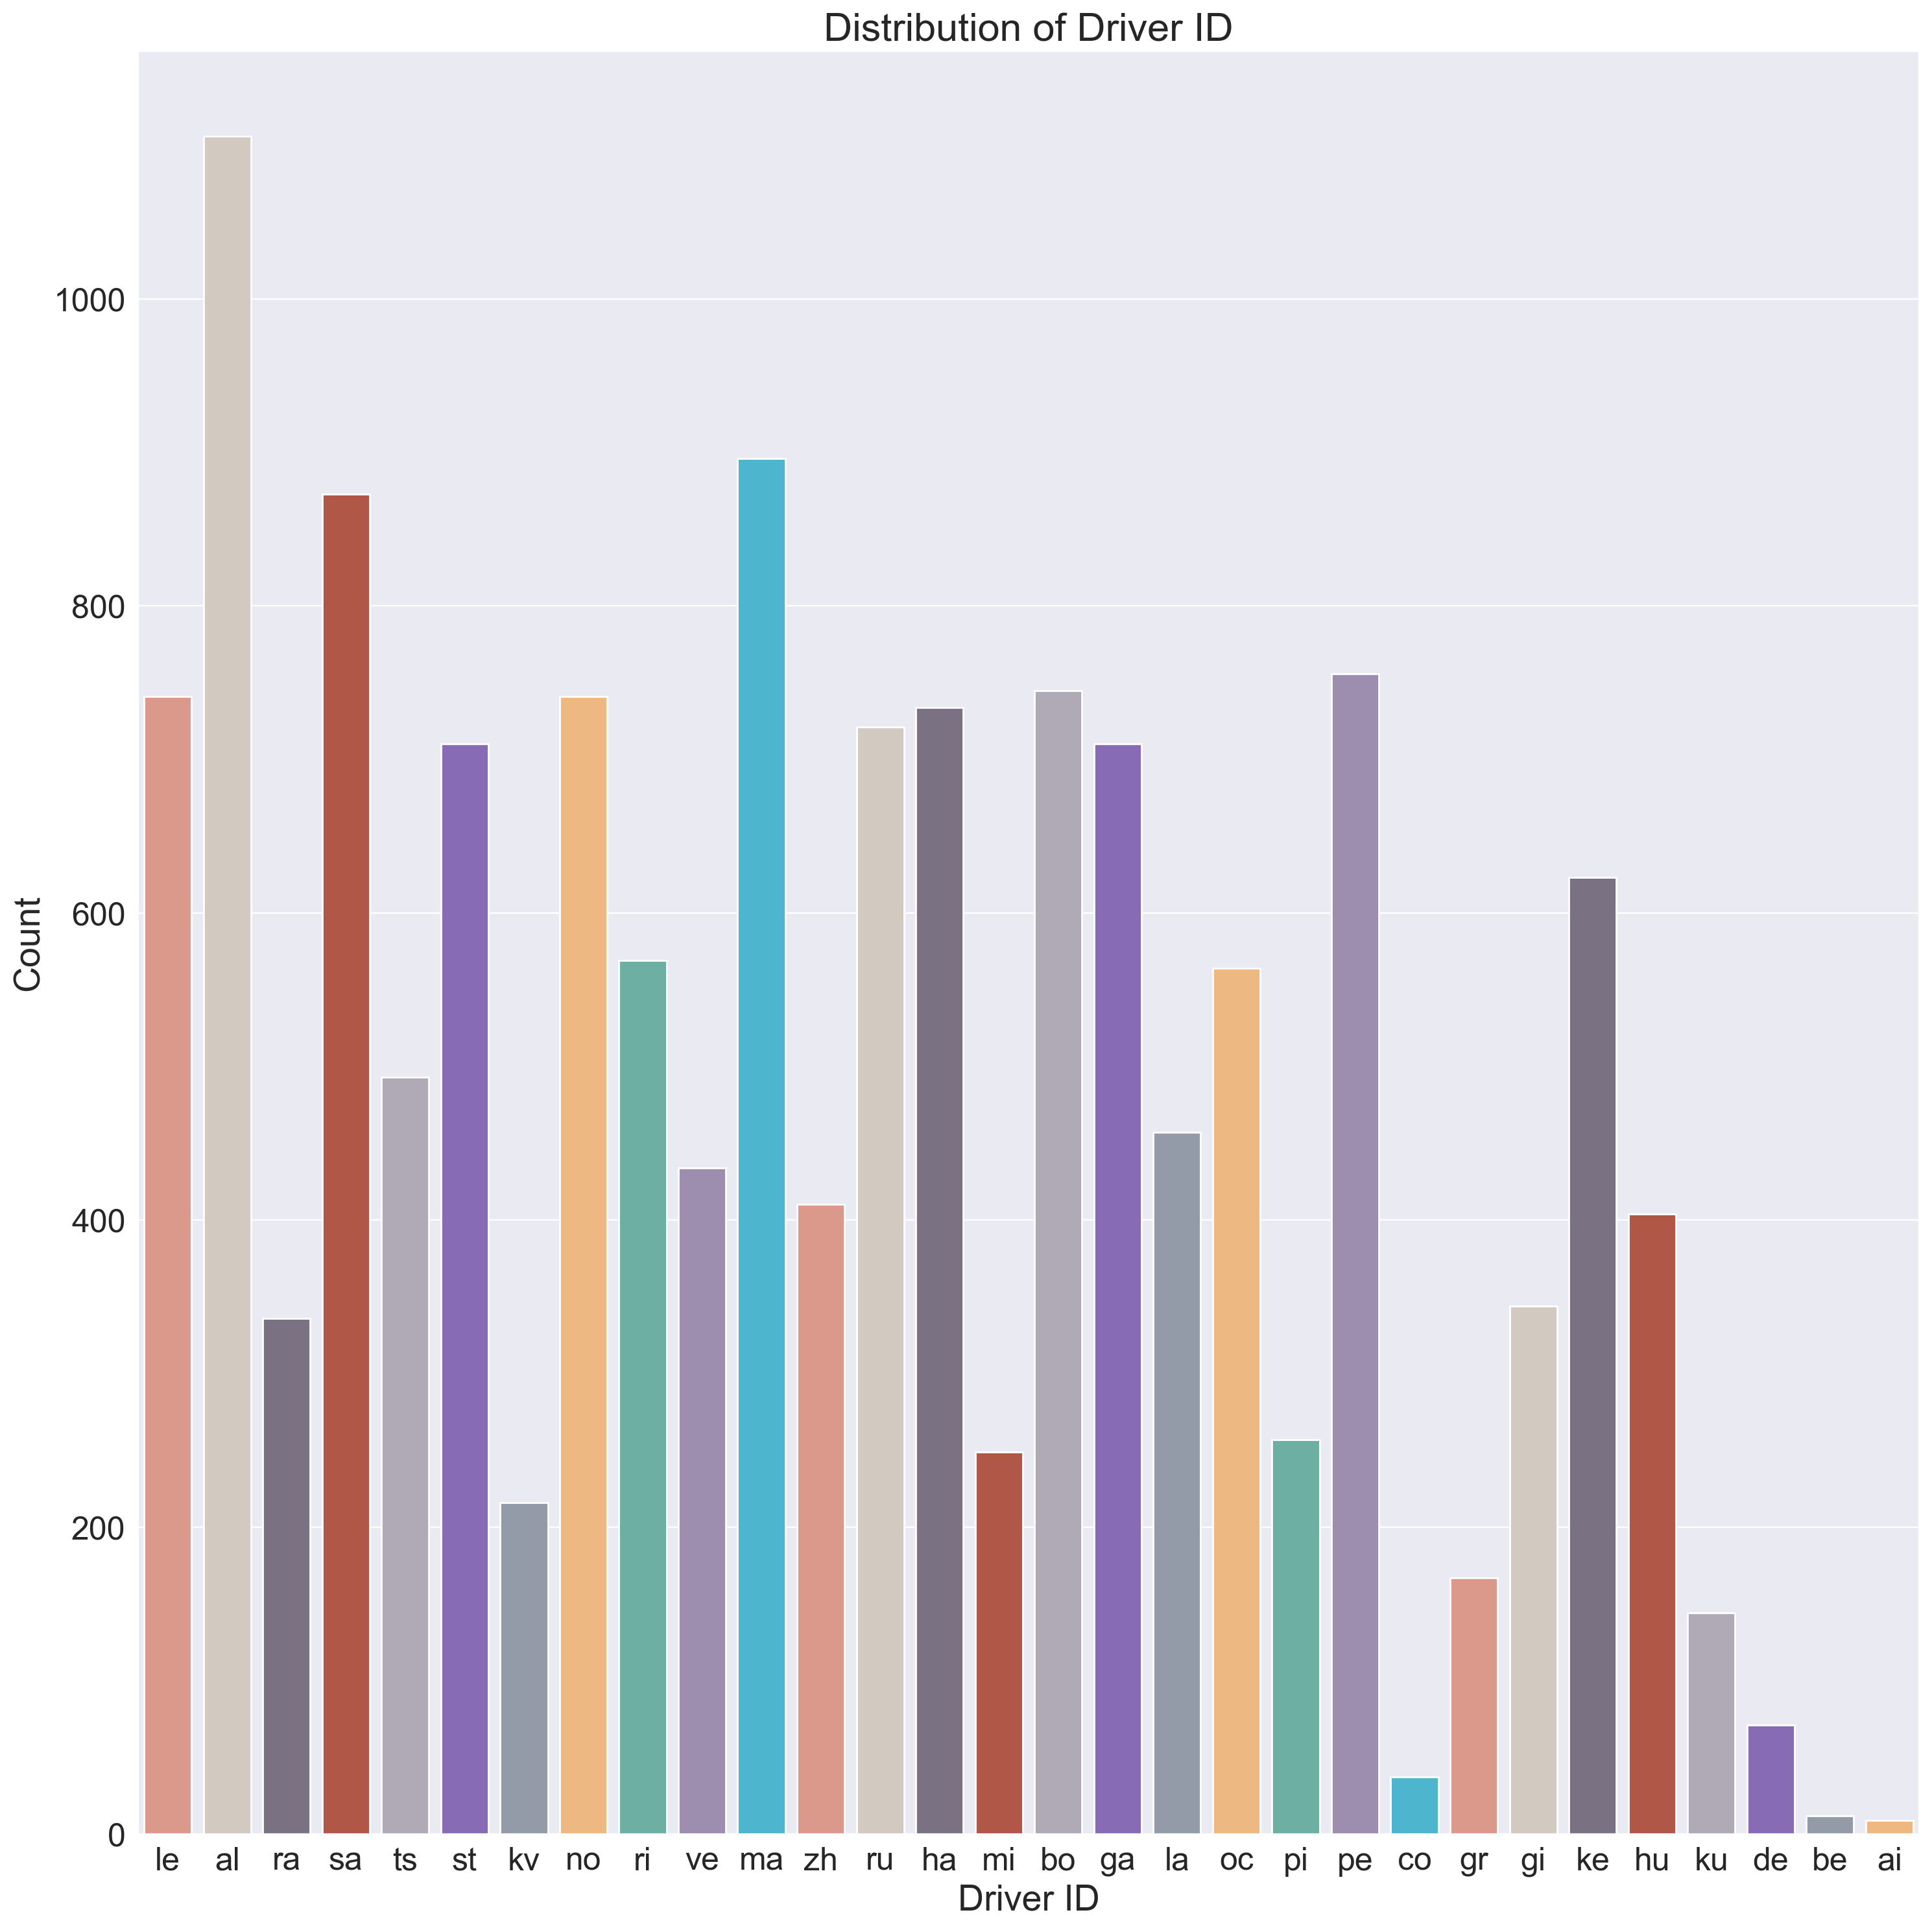

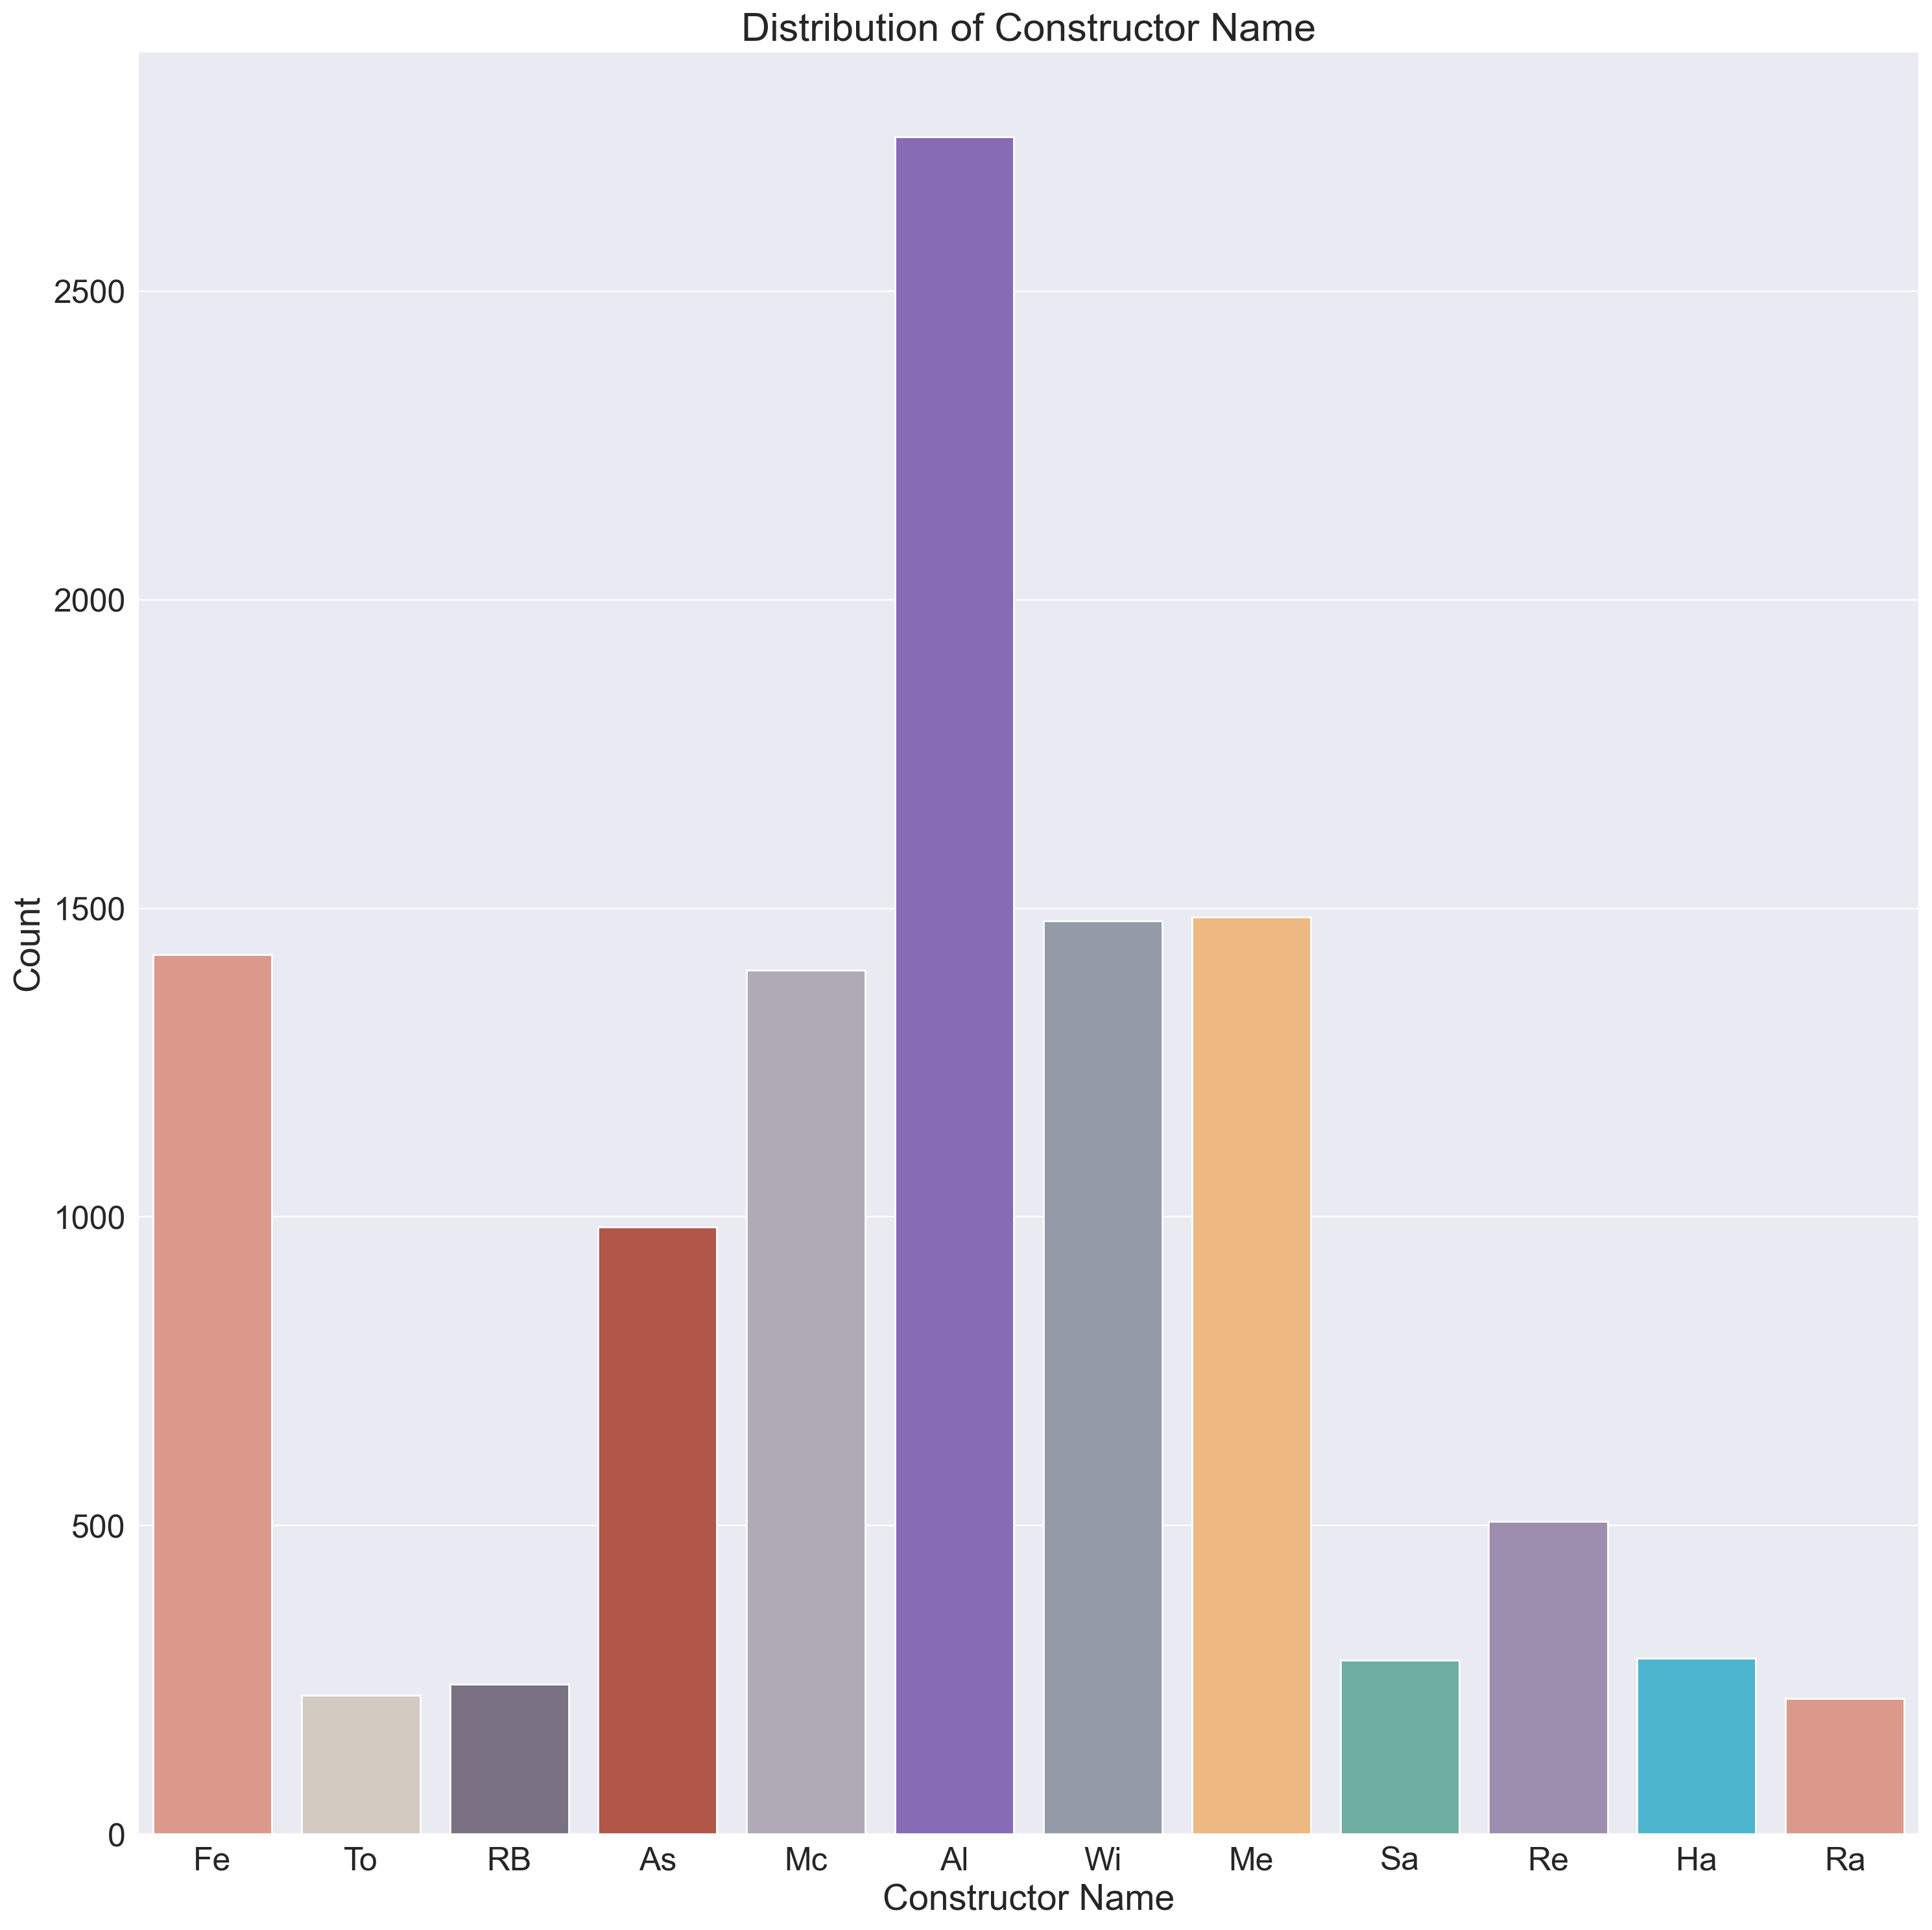

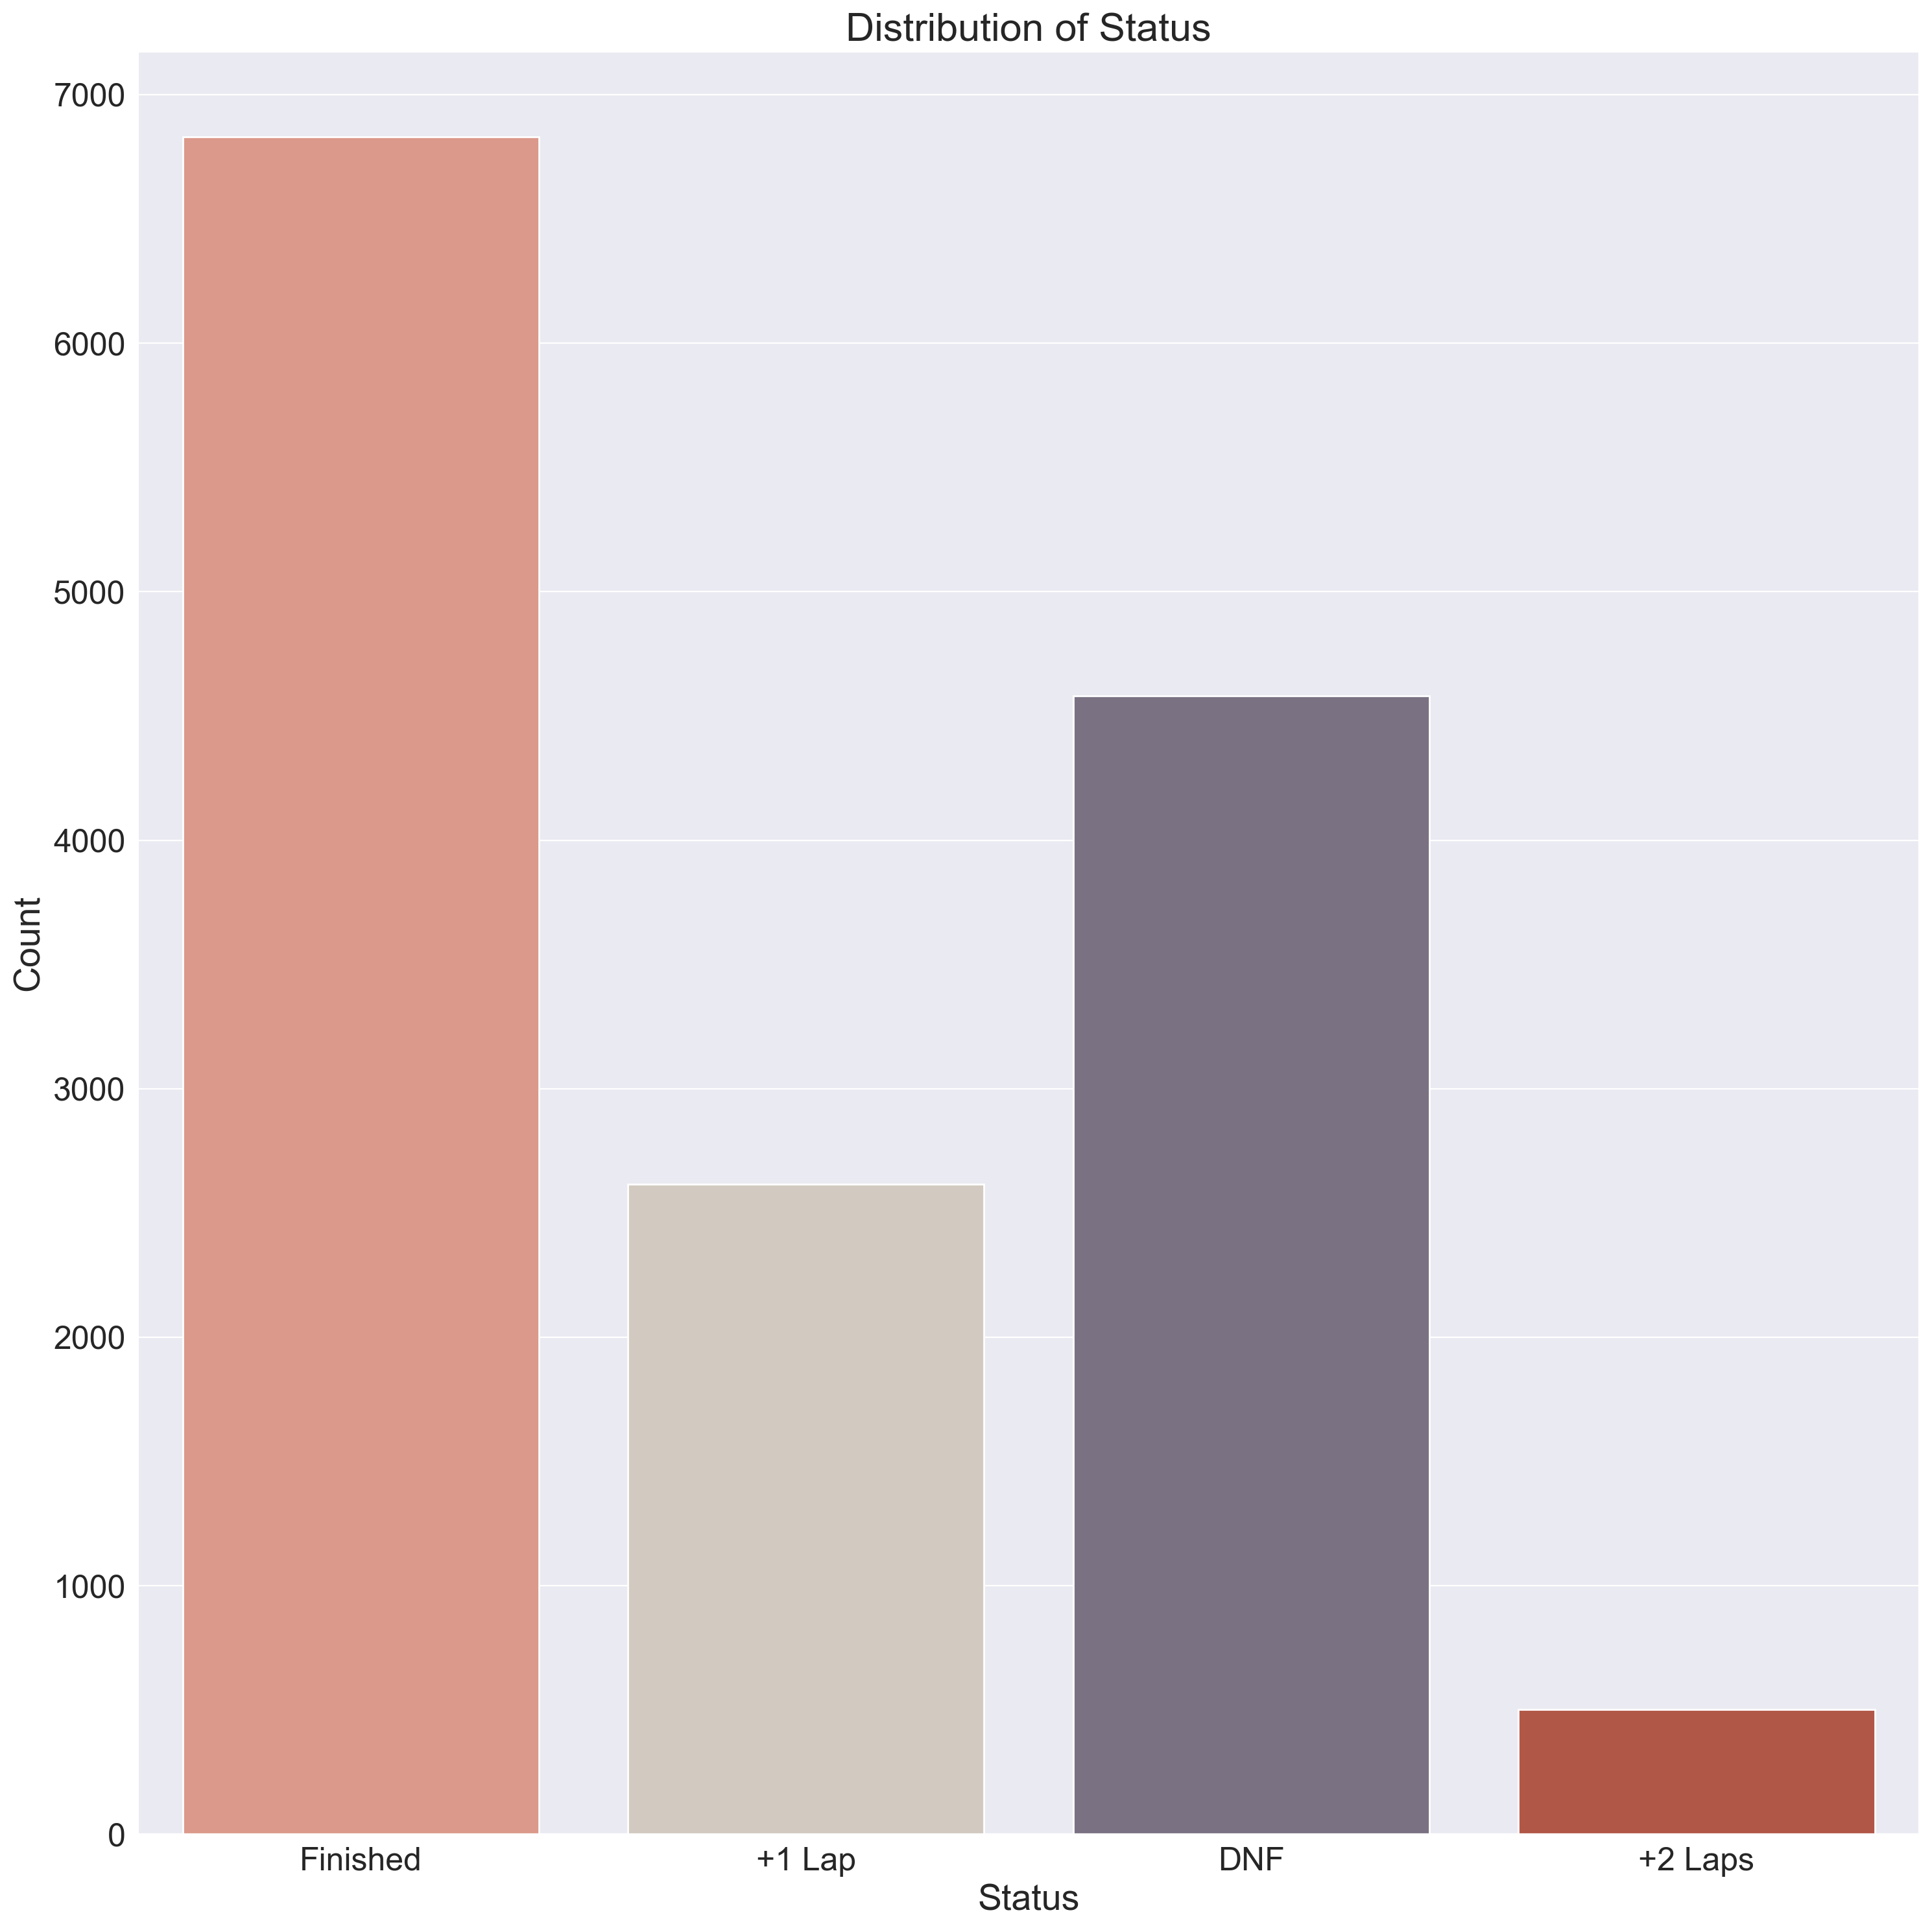

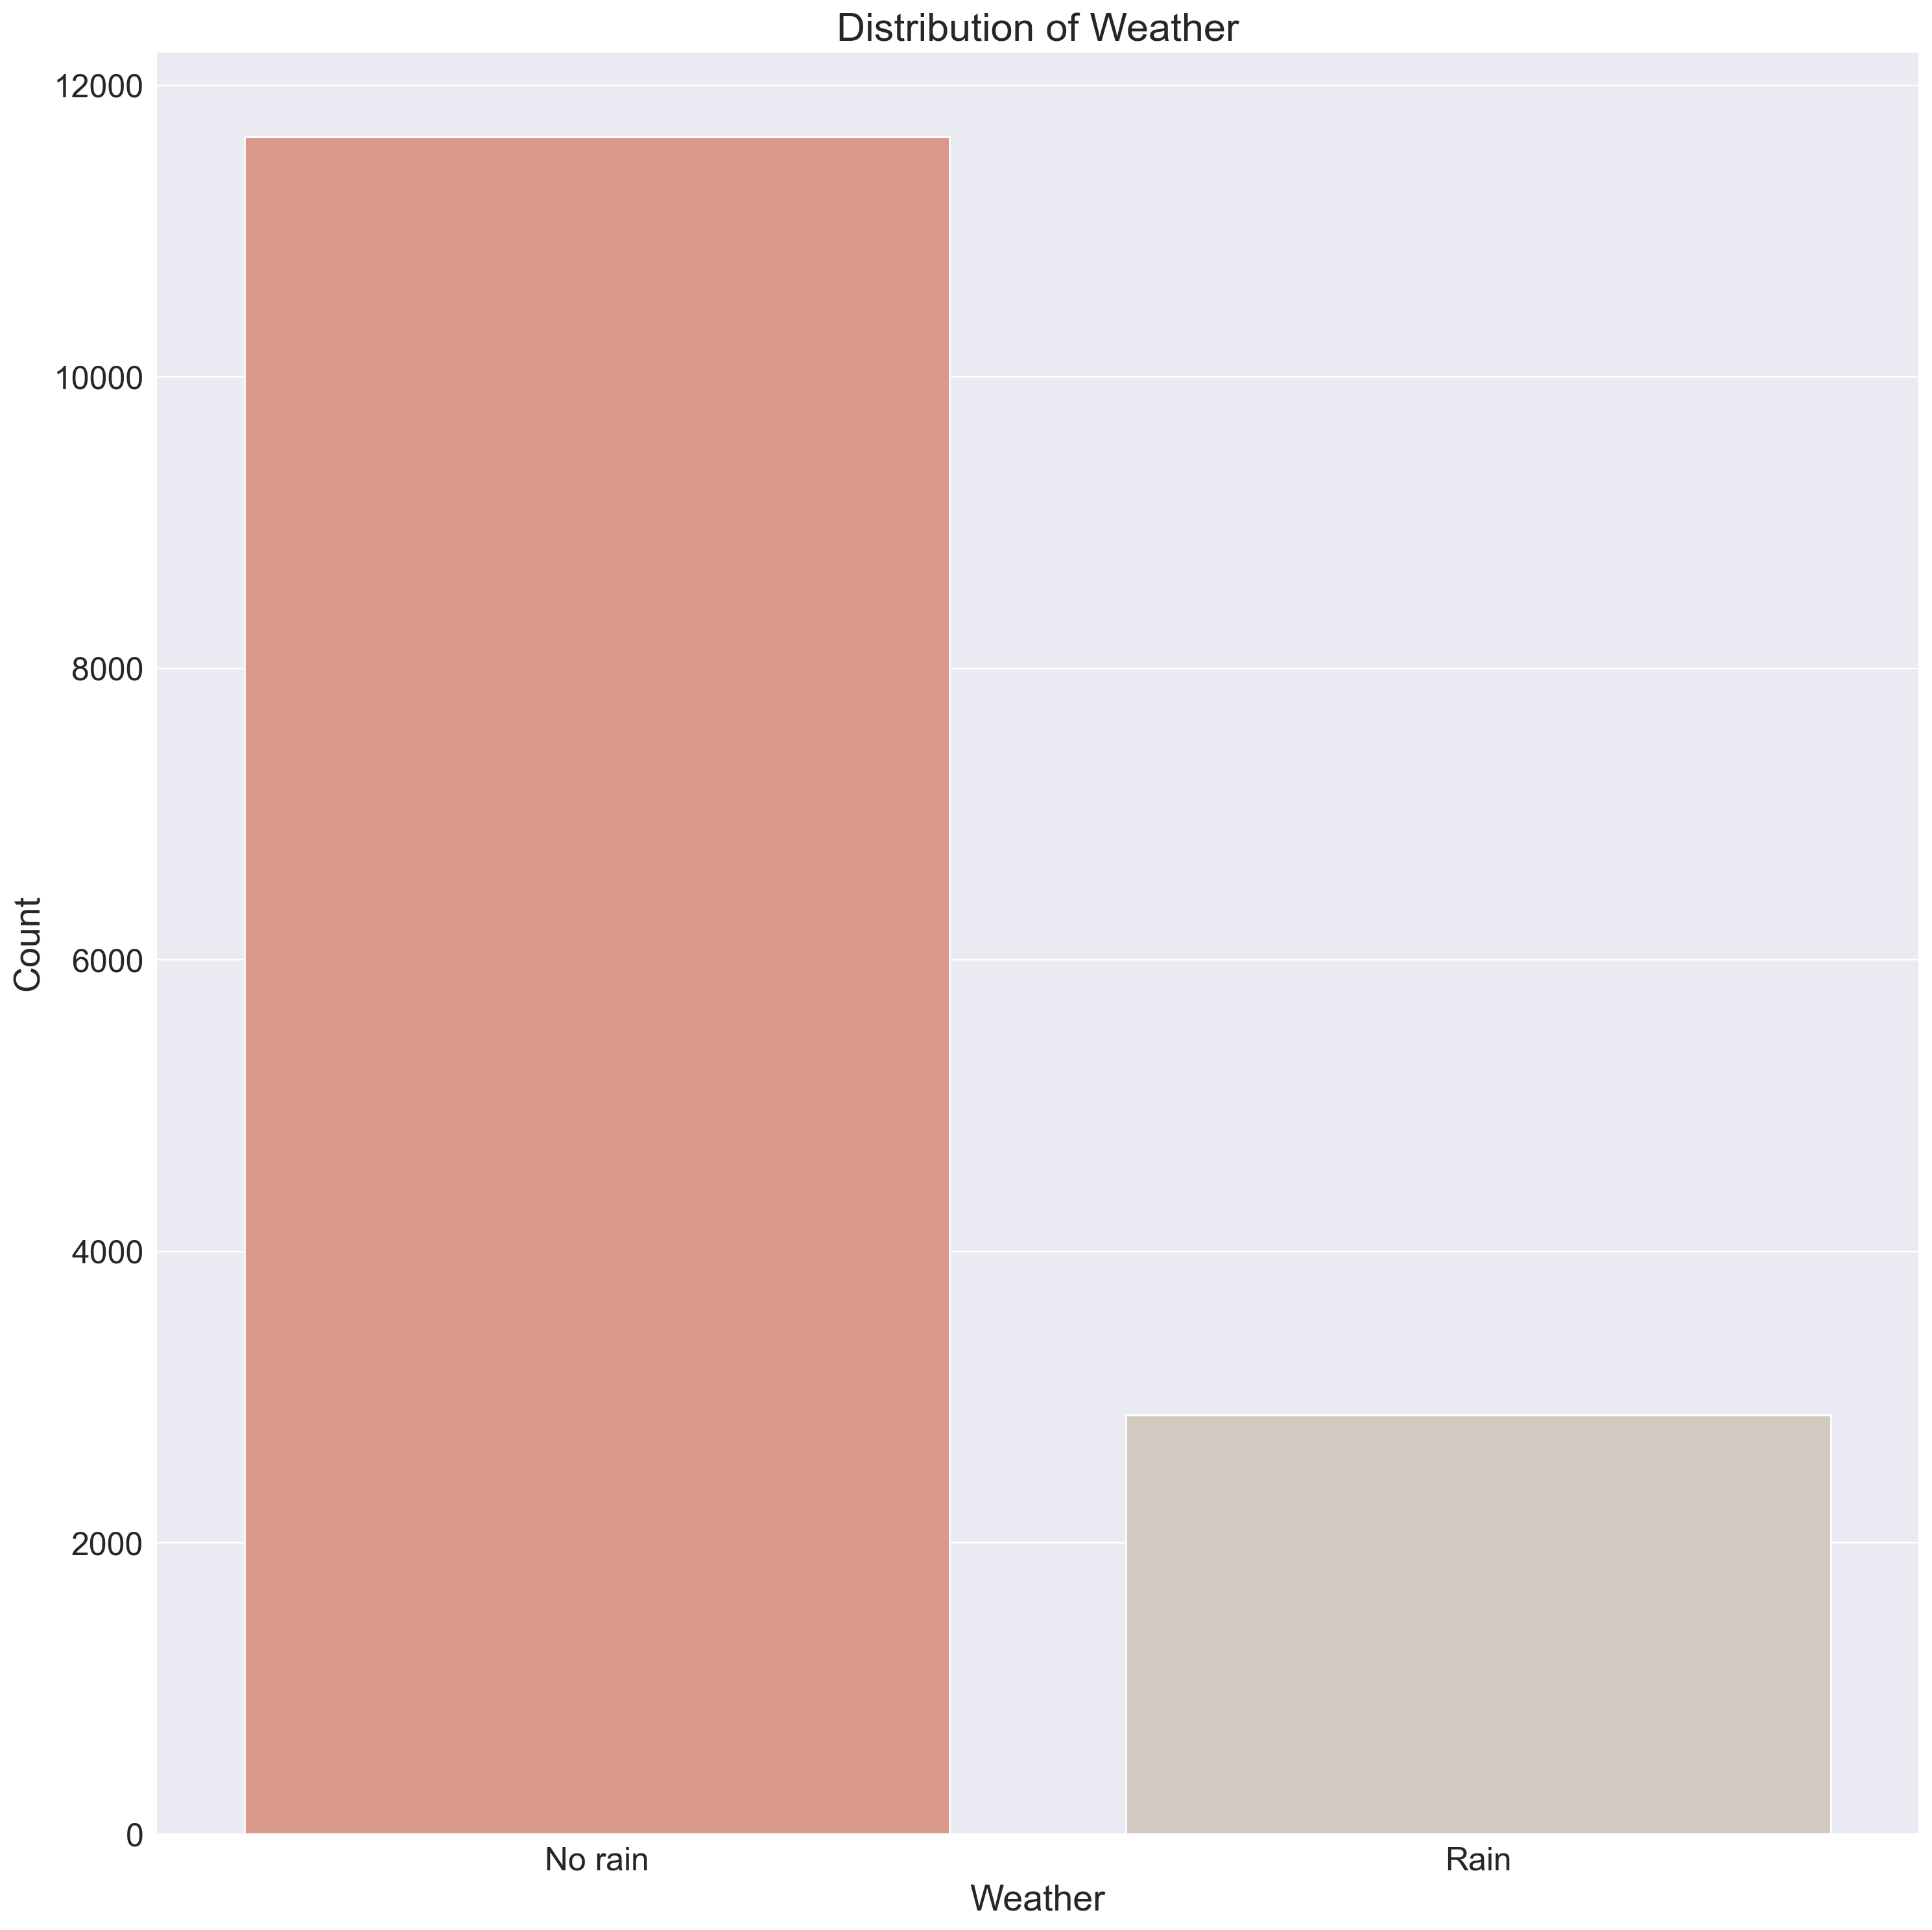

In [35]:
#Visualising the features
for feature in categorical:
  plt.figure(figsize=(15,15))
  sns.countplot(x=feature,
                  data=df_cat,
                  palette=colors_cat)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.tight_layout()

plt.show()

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\1959427061.py:3: UserWarning: The palette list has more values (11) than needed (4), which may not be intended.
  sns.countplot(x='Rain (mm)',


<Axes: xlabel='Rain (mm)', ylabel='count'>

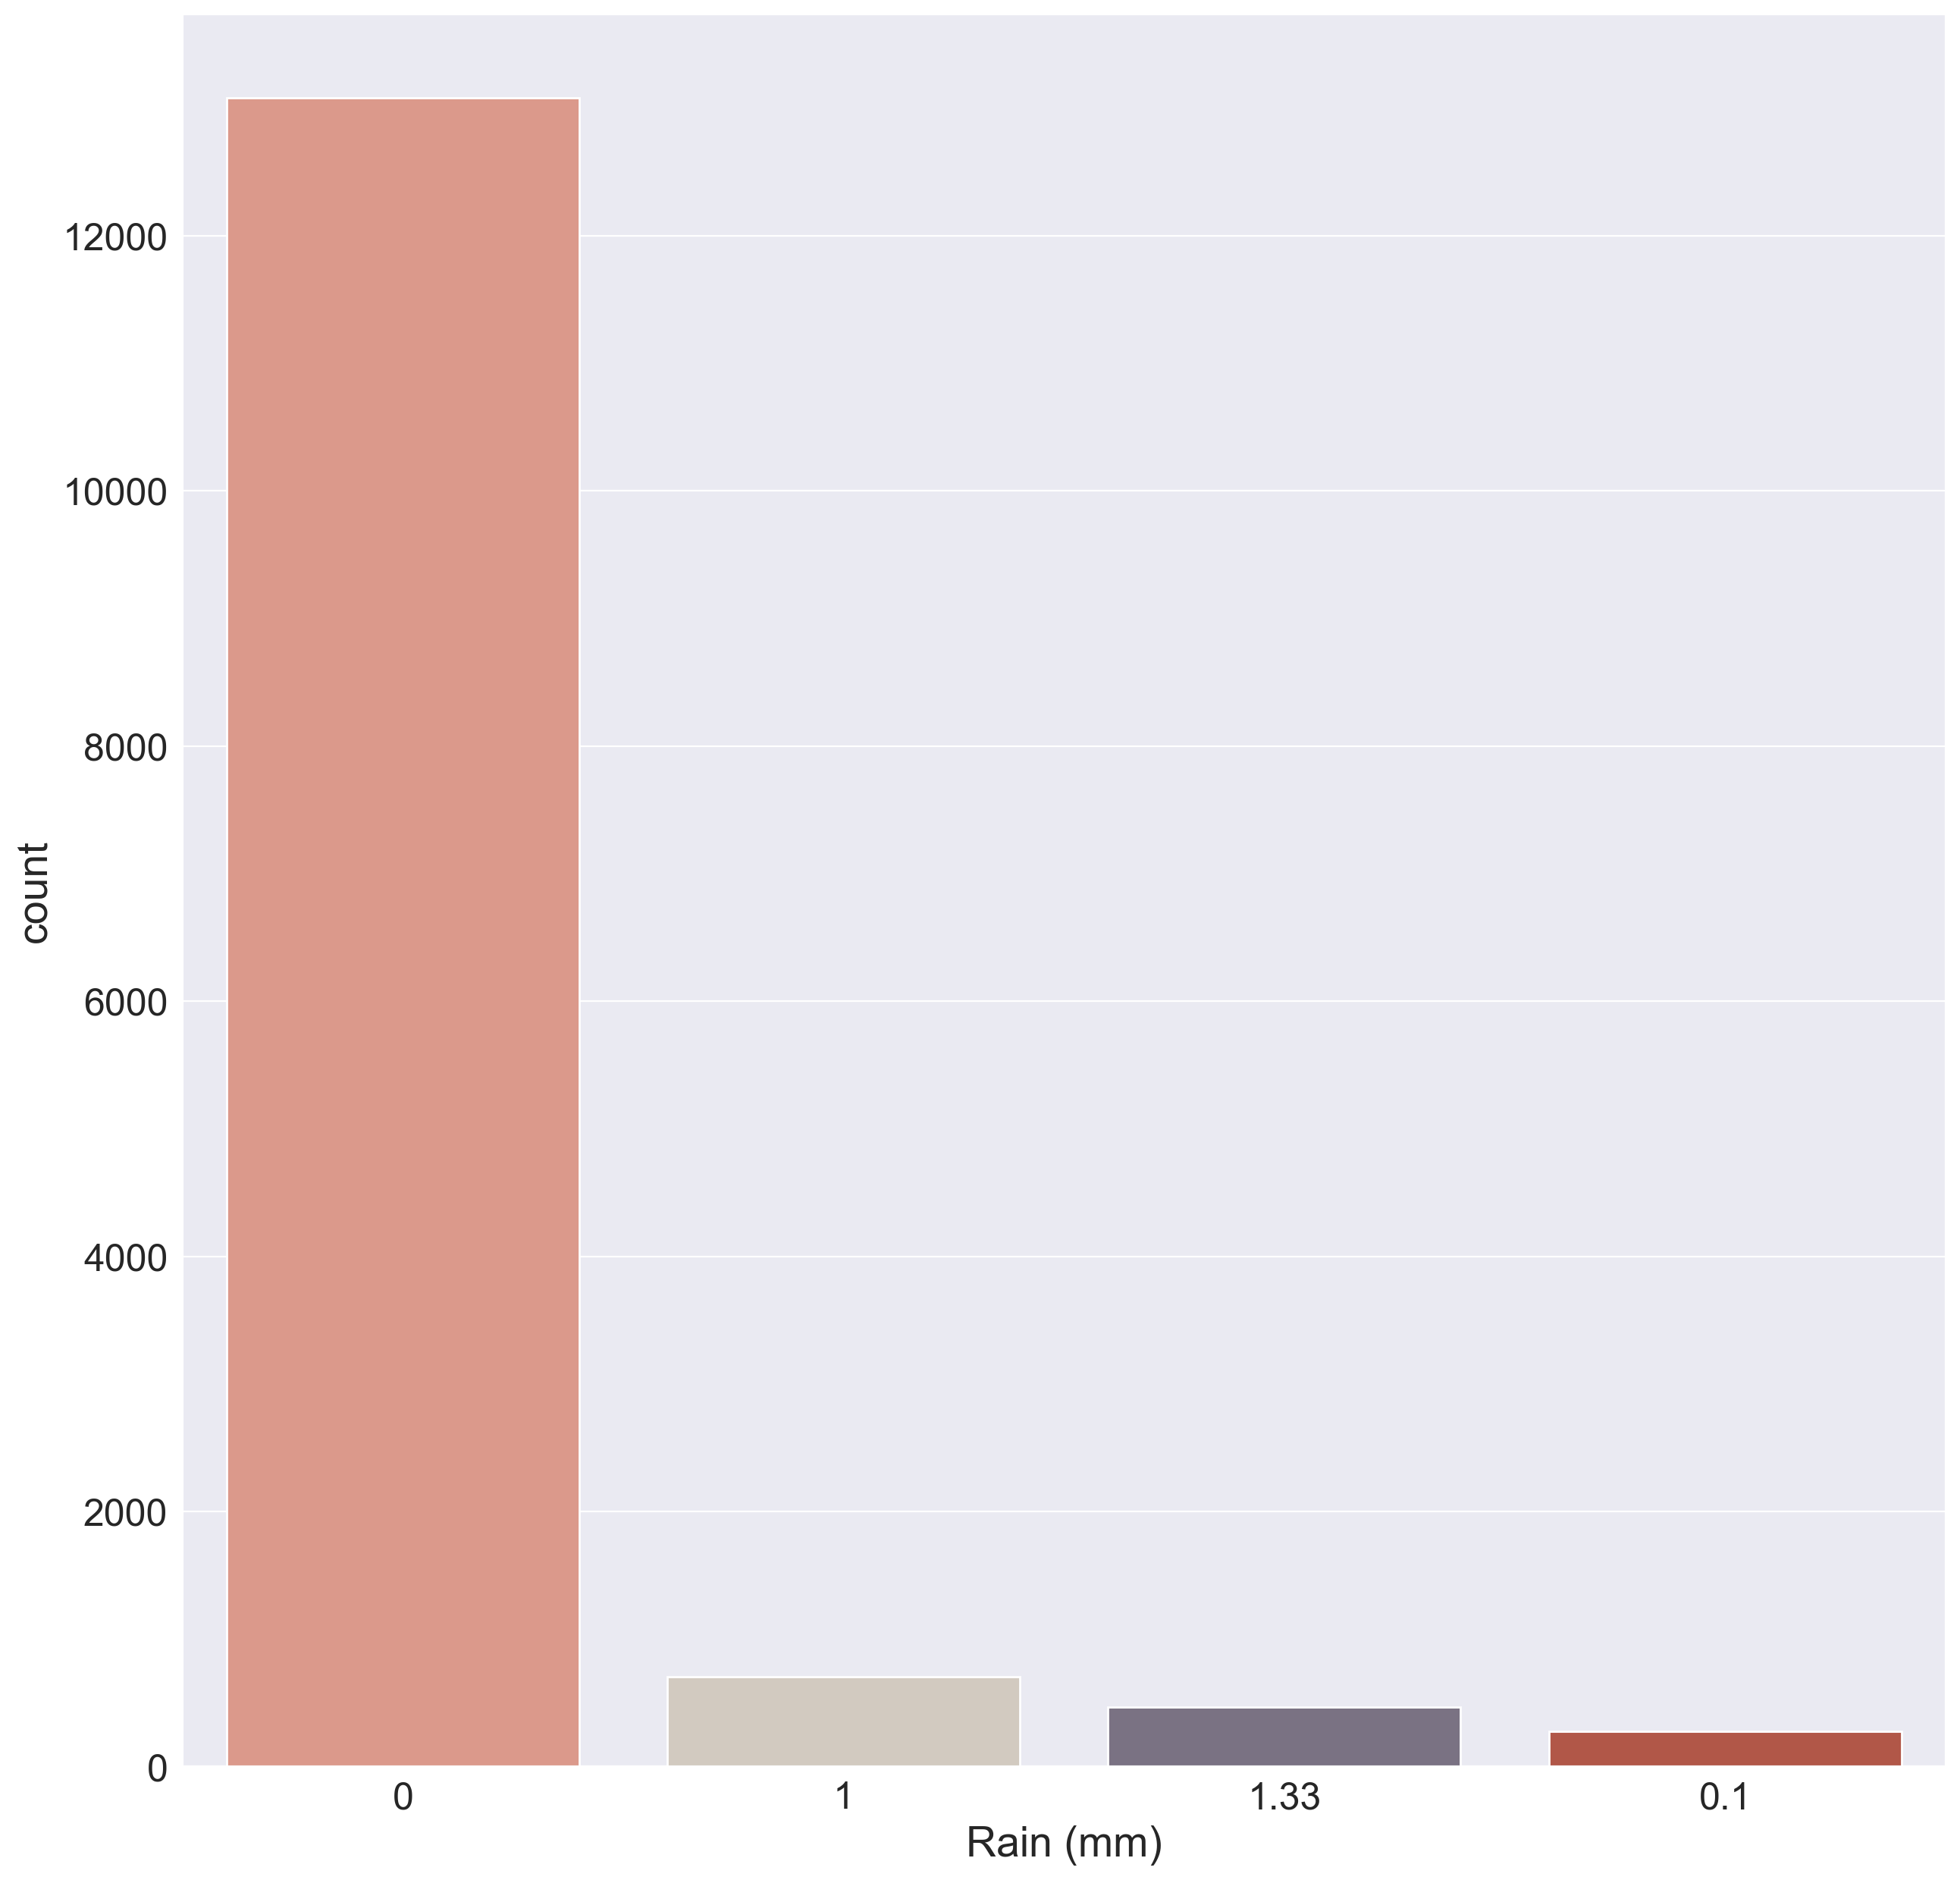

In [36]:
#We said that we would visualise rain as a discrete variable so let's do that
plt.figure(figsize=(15,15))
sns.countplot(x='Rain (mm)',
              data=train_df,
              palette=colors_cat)

* As the years go on we see an increase in the number of races, except 2020 when covid-19 wreaked havoc all over the world. The maximum number of races now in 2024 is 24.
* The count of different grand prix varies differently because the tracks where the races take place keep changing every year and some tracks are kept for another season while the others are not. It all depends on number of years stated in the contract made by the governing body(FiA)
* Similarly, the above can be said for the variation in data based on the driver ID, where the contract is made by the teams
* The variation in team data can be based on the the number of DNF's, whether they left formula 1 like Renault(Re), Sauber(Sa) which changed to Alfa Romeo(Al) and then back to Sauber, Racing Point(Ra) which changed to Aston Martin(As) and Toro Rosso(To) which changed to RB. Red bull was also called RB earlier so the data might have gotten aggregated in the count.
* From the plot on Status, we can say that most of the times, teams finished the race, while some backmarkers were 1 or 2 laps slower. There are a high number of DNF's as well which can be explained by the various failures as stated before.
* Based on the weather data, we can say that majority of the times, it does not rain during the race, so the strategists can most likely stick to the strategy decided previously, but when it rains, it brings a surpise element into play and this can change the pitstop strategy based on what was decided before the race.

Now we will look at the features in greater detail

#### Weather

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x=feature,


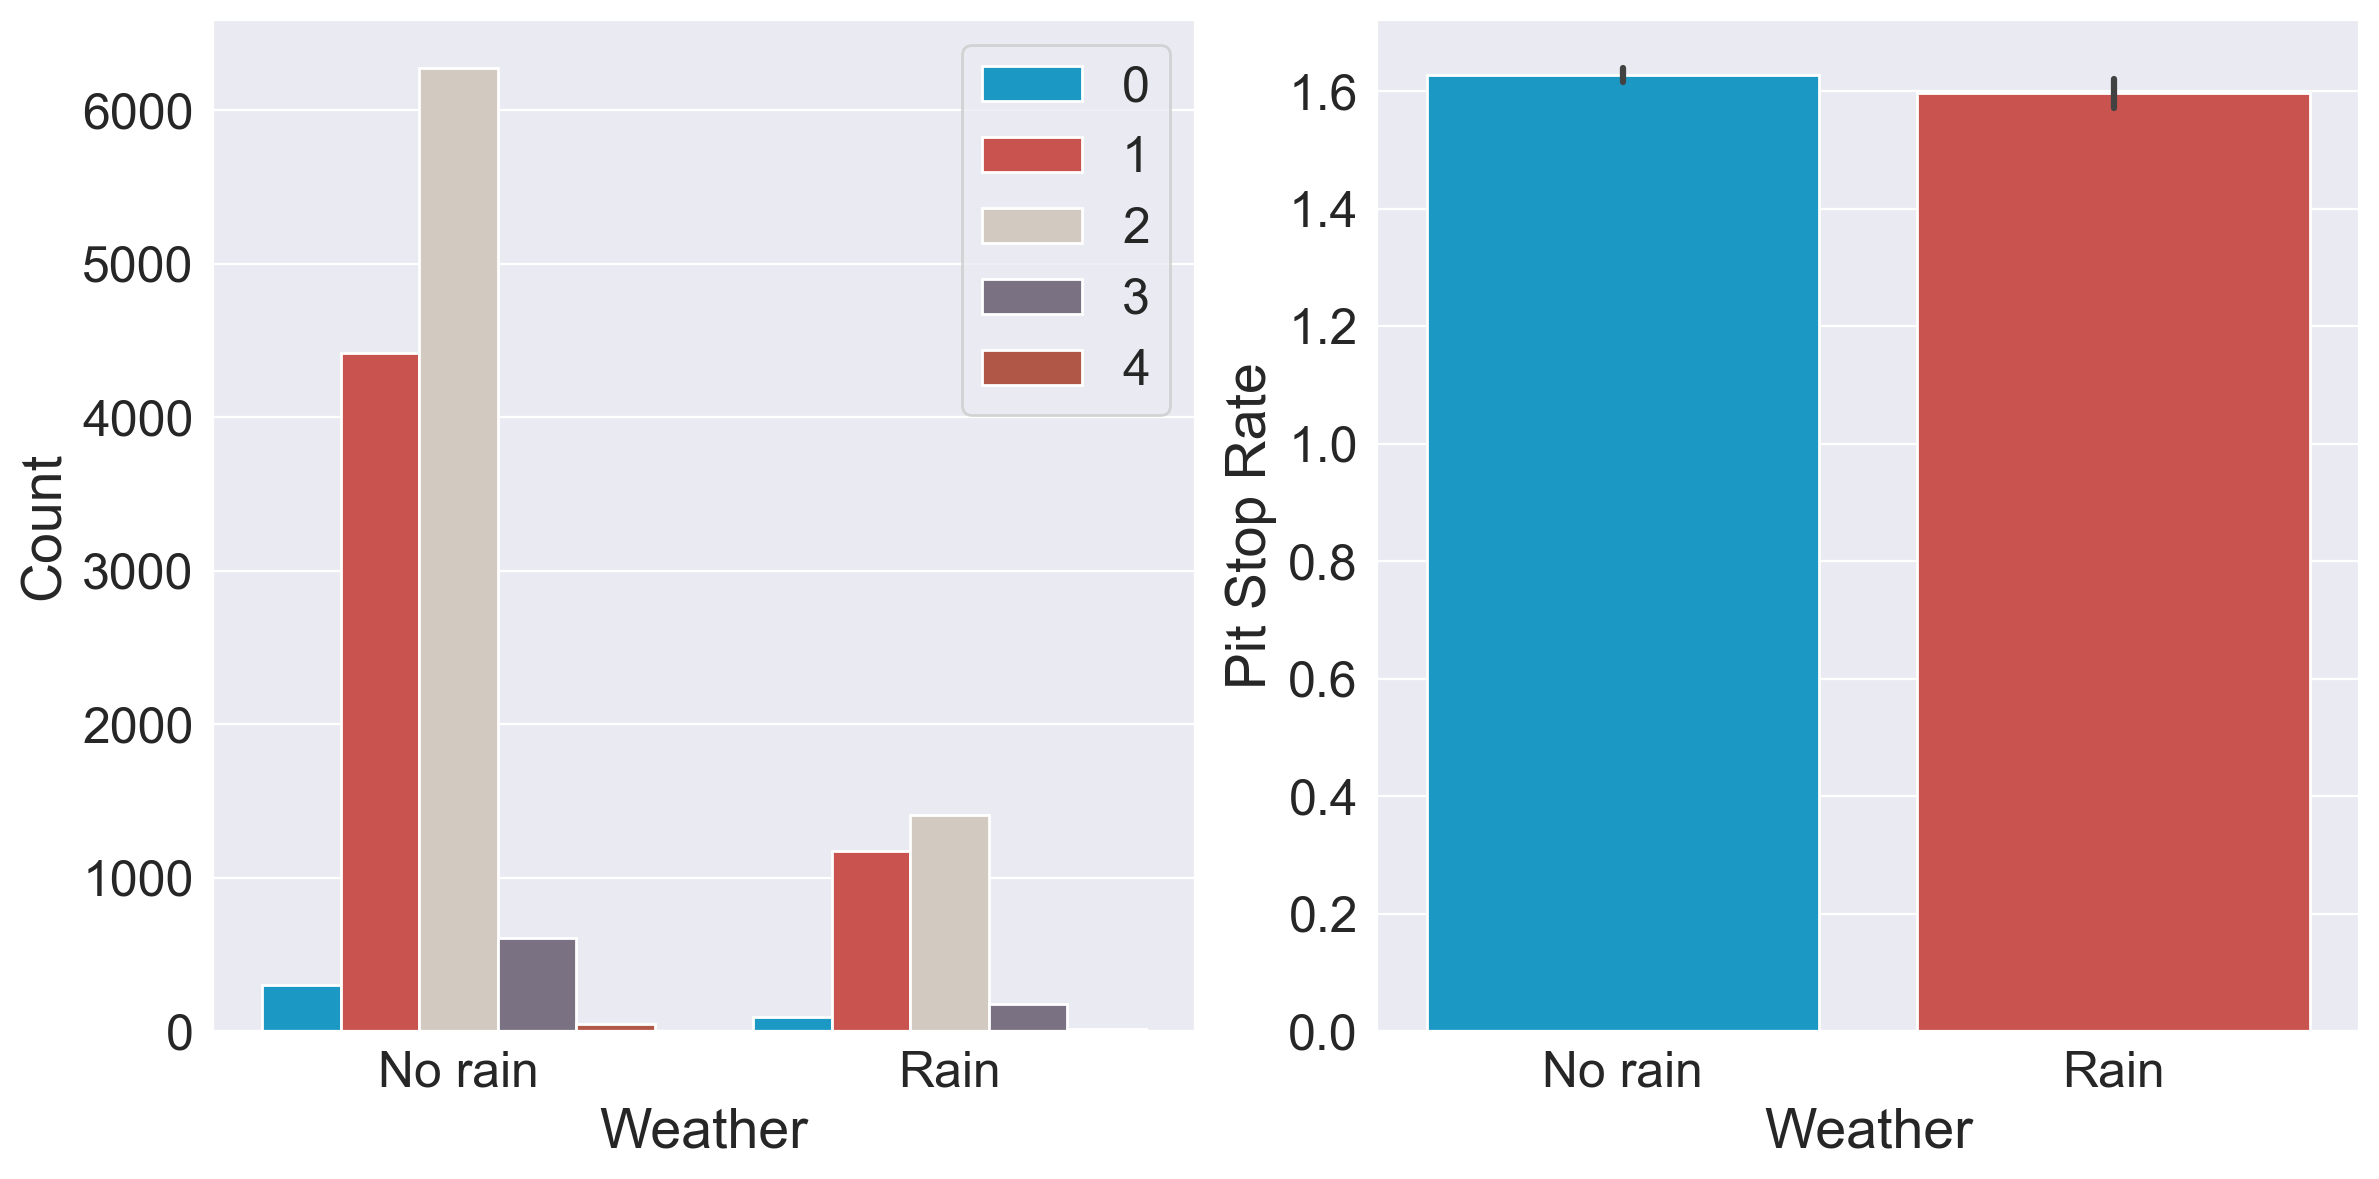

In [37]:
plot_categorical('Weather')

* The pitstop rate is nearly the same regardless of whether it rains or not, which indicates that the number of stops remain around 2 most likely, whereas the difference lies in the type of tyres fitted(Soft,Medium and Hard) in dry conditions and (Wets,Intermediate) in wet conditions.
* Even in the differing conditions, 2 stops are most likely.

#### Year

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature,


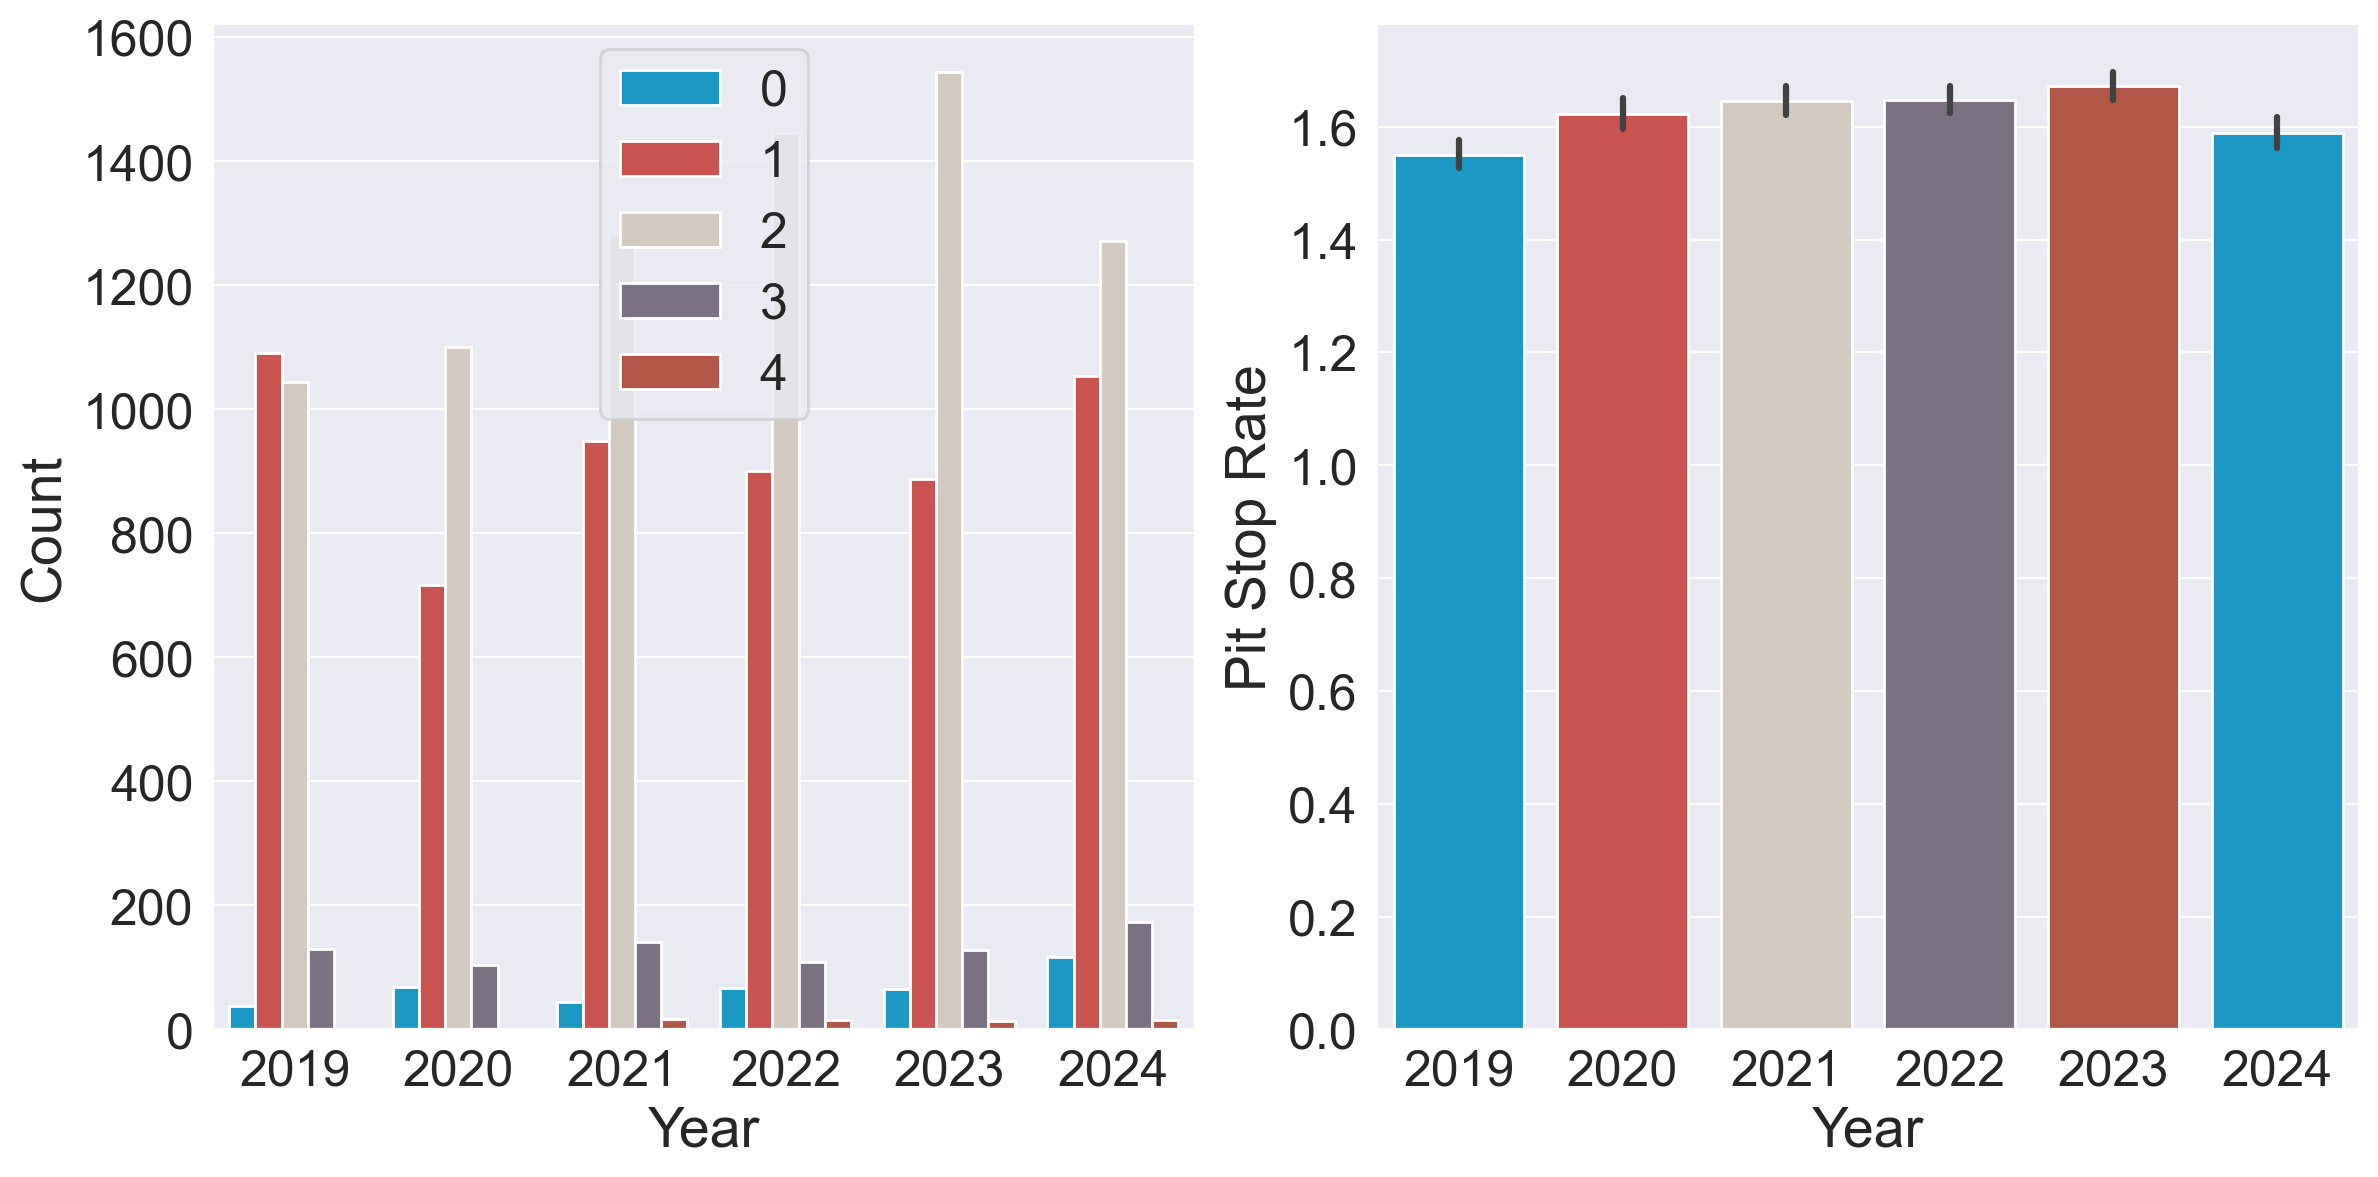

In [38]:
plot_categorical('Year')

* From the plot, we can see that during the 2019 season, 1 stops were more common compared to 2 stops, whereas it's the opposite for the rest of the seasons. This can be due to the track evolution and change in weather over the years, which results in increased tyre degradation over a stint.
* Whereas, the pit stop rates increase every year but there is a slight dip during the 2024 season due to the fact that 1 stop strategies were highly prevalent along with the 2 stop strategies as drivers would use their exceptional skill of managing their tyres and holding on to them for as long as possible

#### Constructor Name

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature,


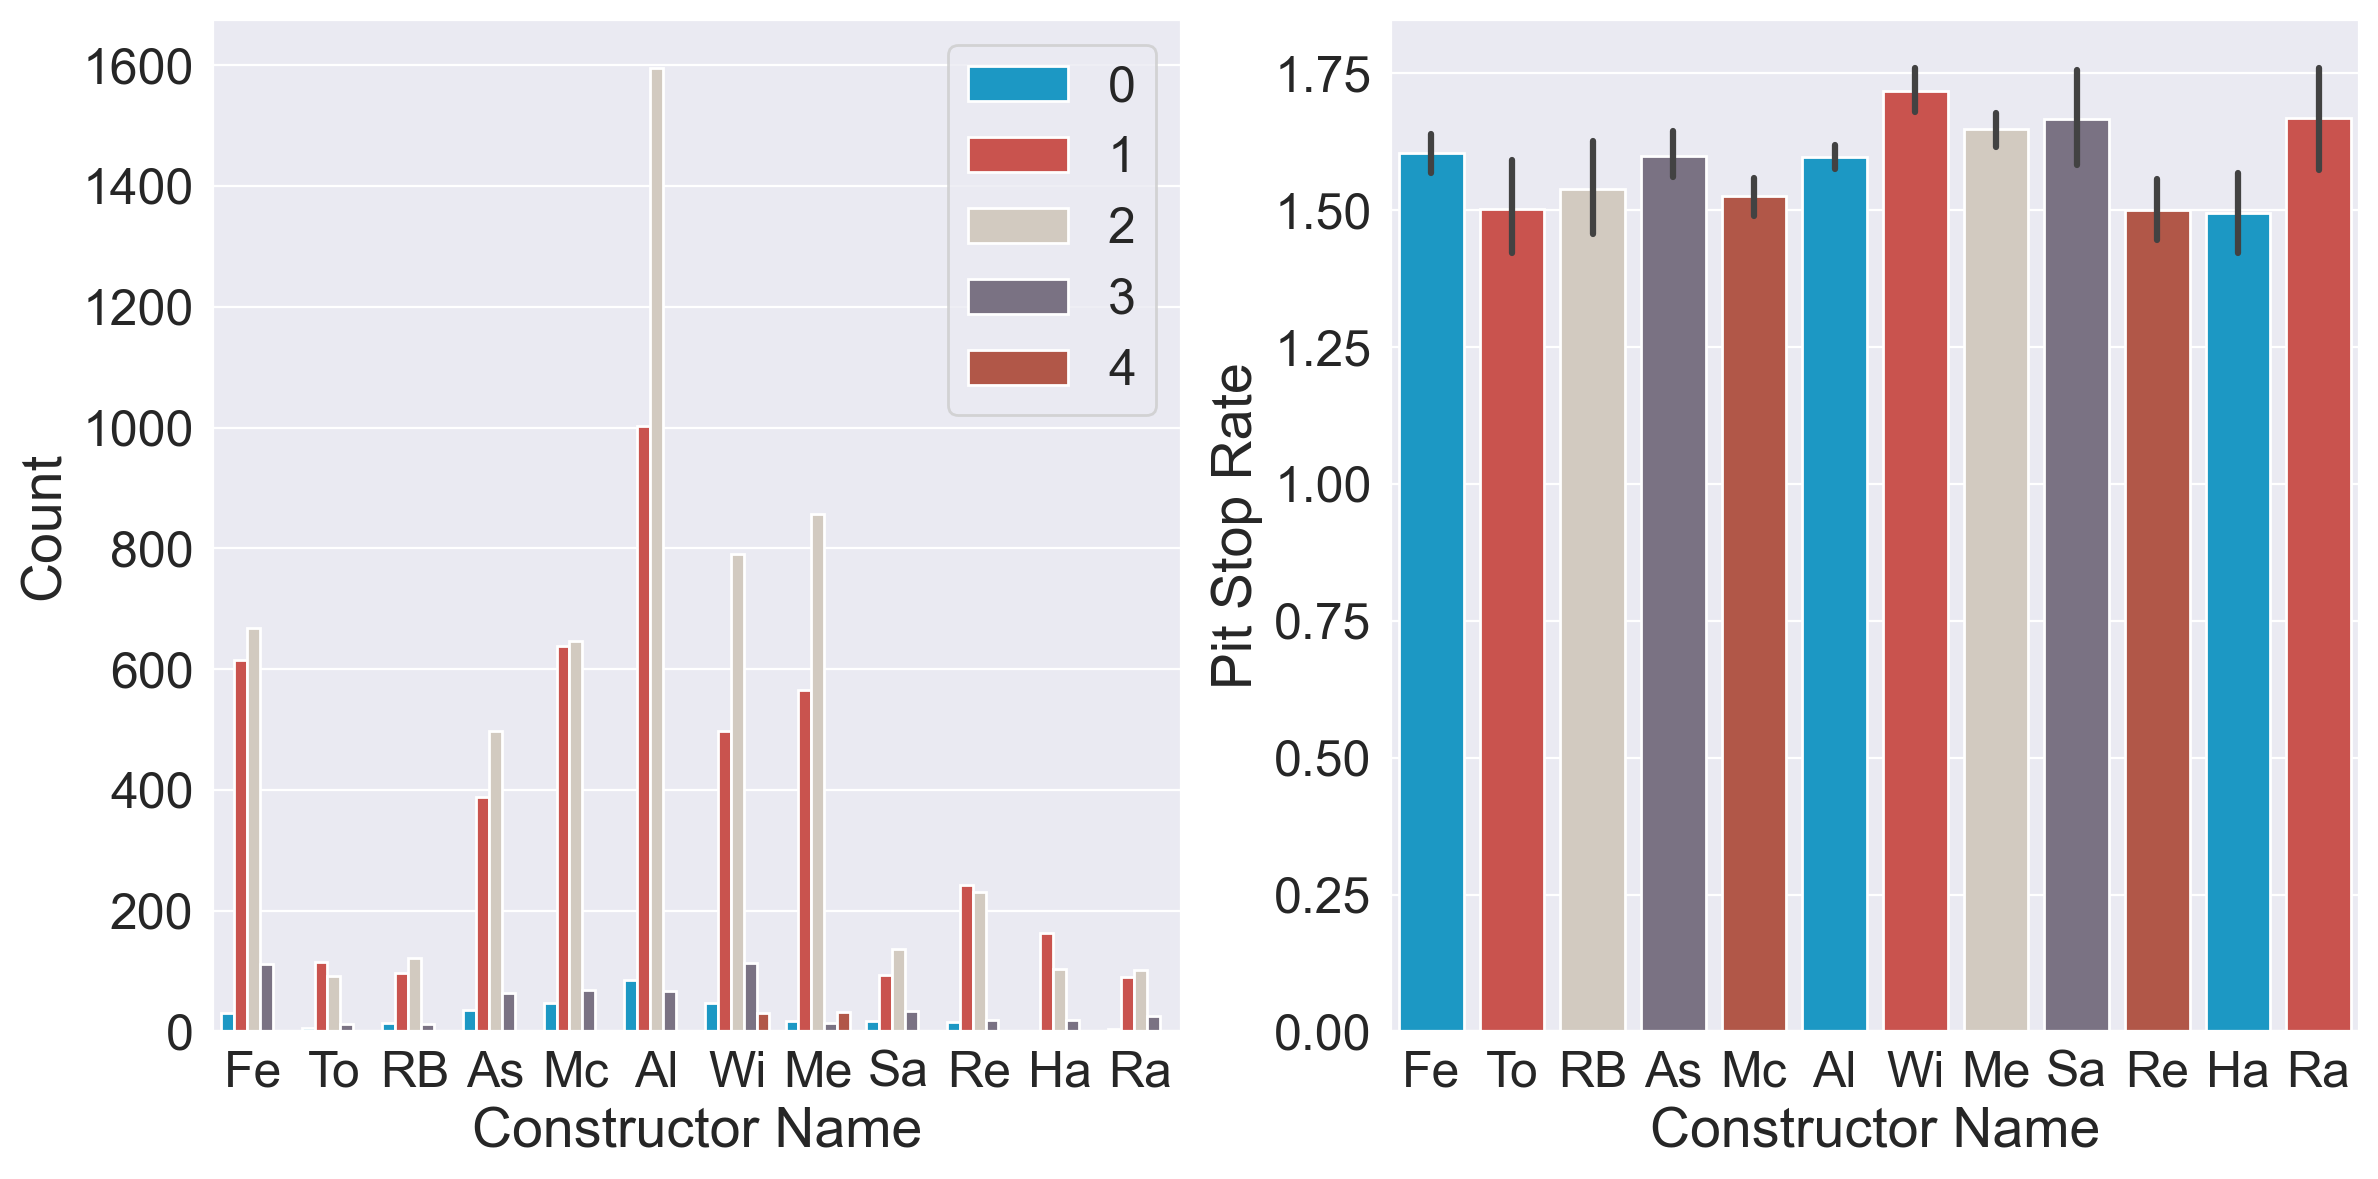

In [39]:
plot_categorical('Constructor Name')

From the plots we can infer that, the pitstop strategy differs from team to team as some teams prefer having fewer stops while some prefer having more stops, this can be due to the reason that they tailor a pit-stop strategy in accordance with the performance of their car, as some cars are kind on their tyres while some are not.

#### Status

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=feature,


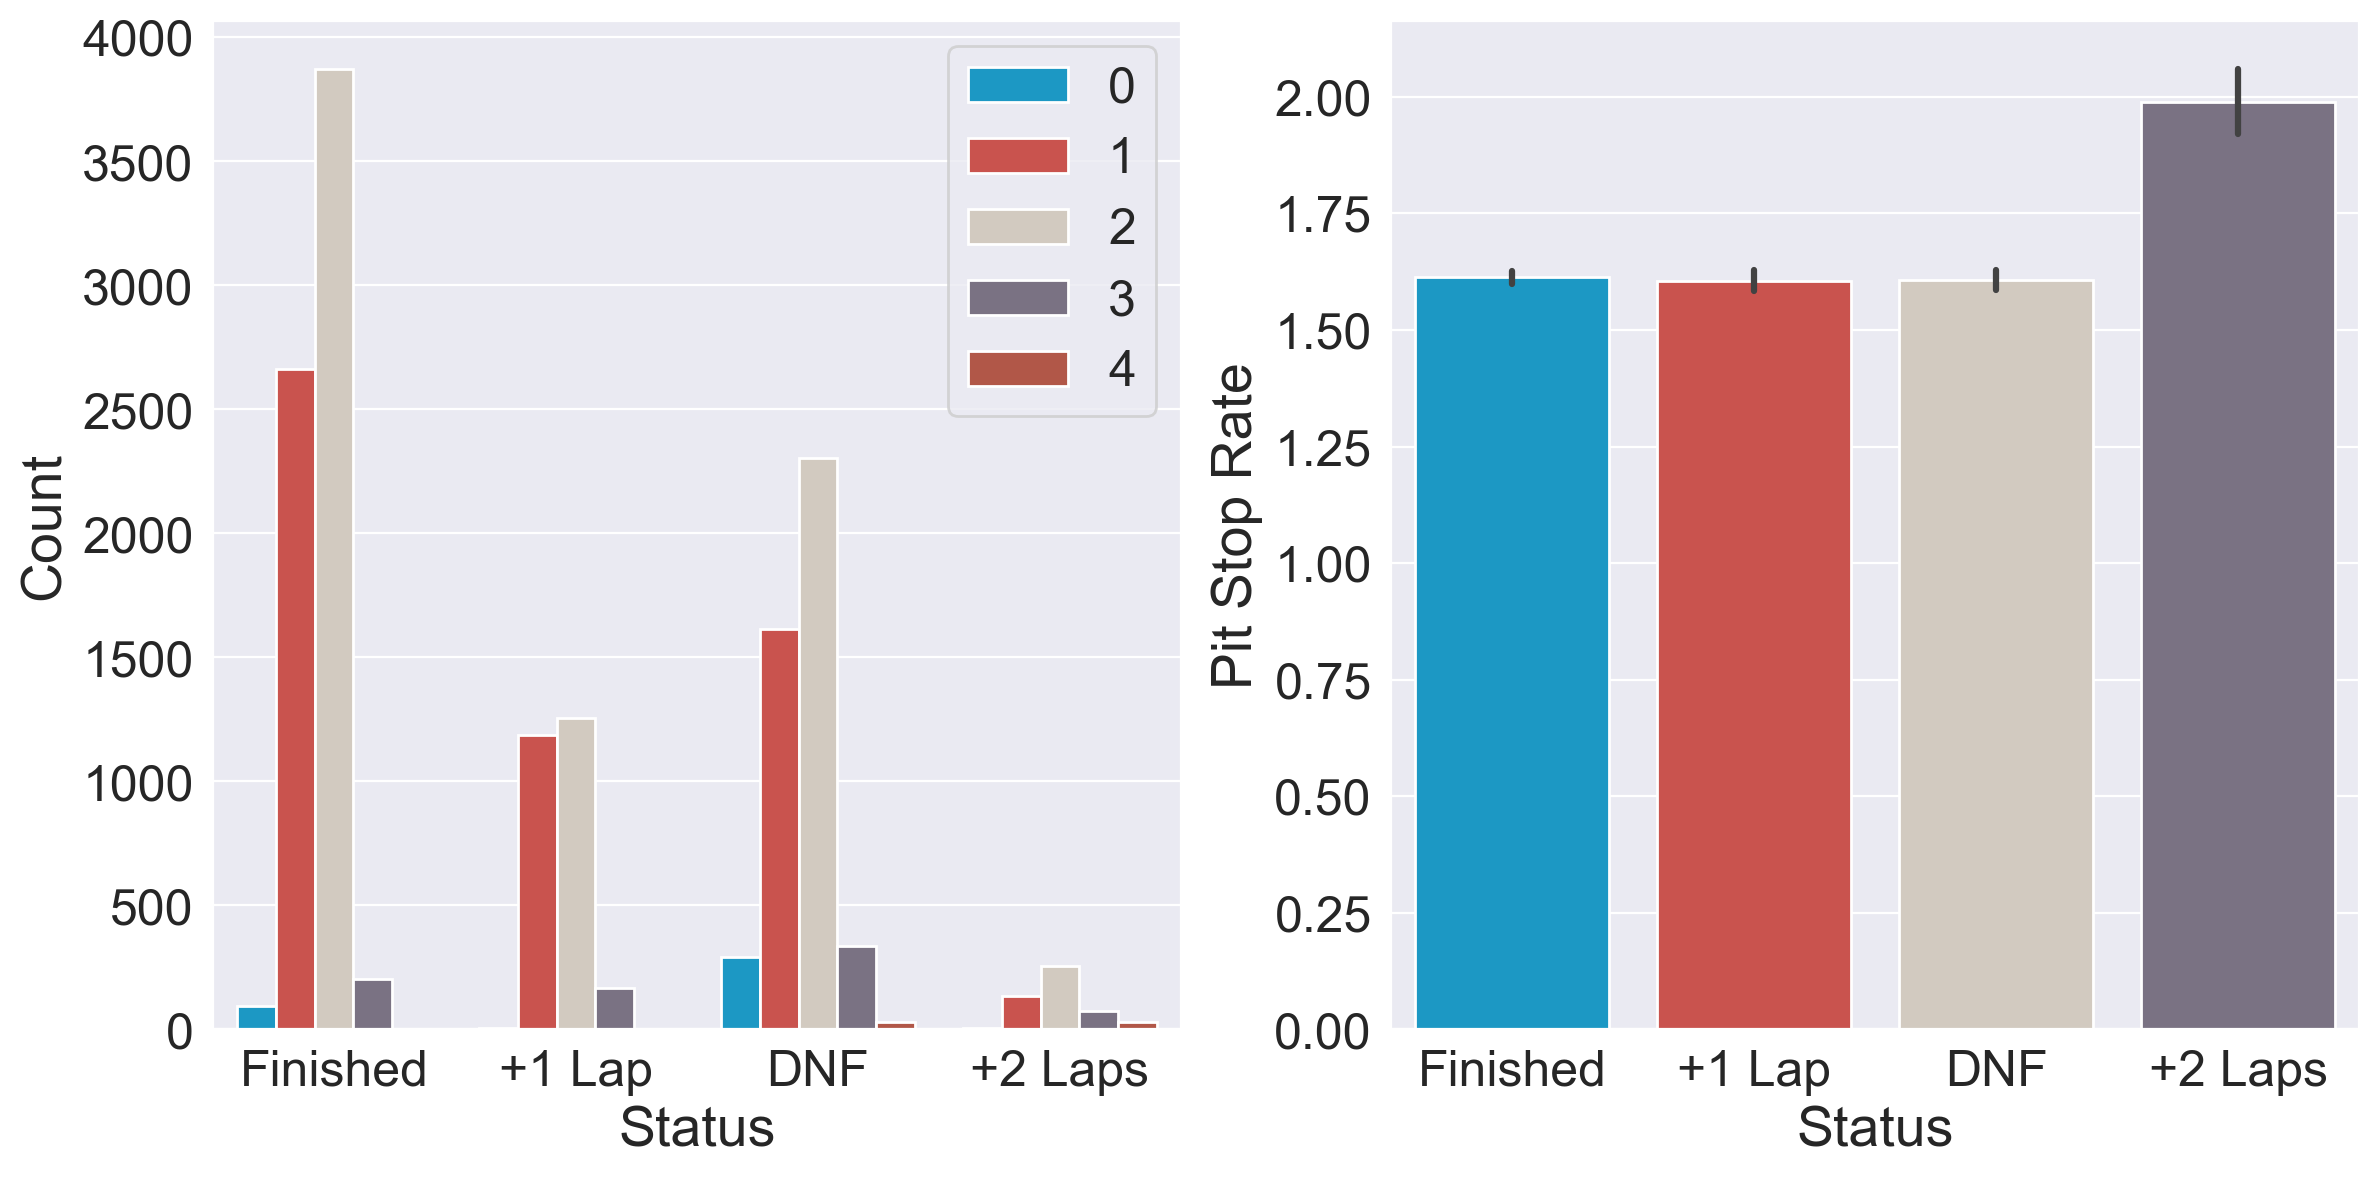

In [40]:
plot_categorical('Status')

As obvious as it can be those teams who don't have the pace and do 2 pitstops will definitely end up laps behind when the race is over

#### Rain

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=feature,


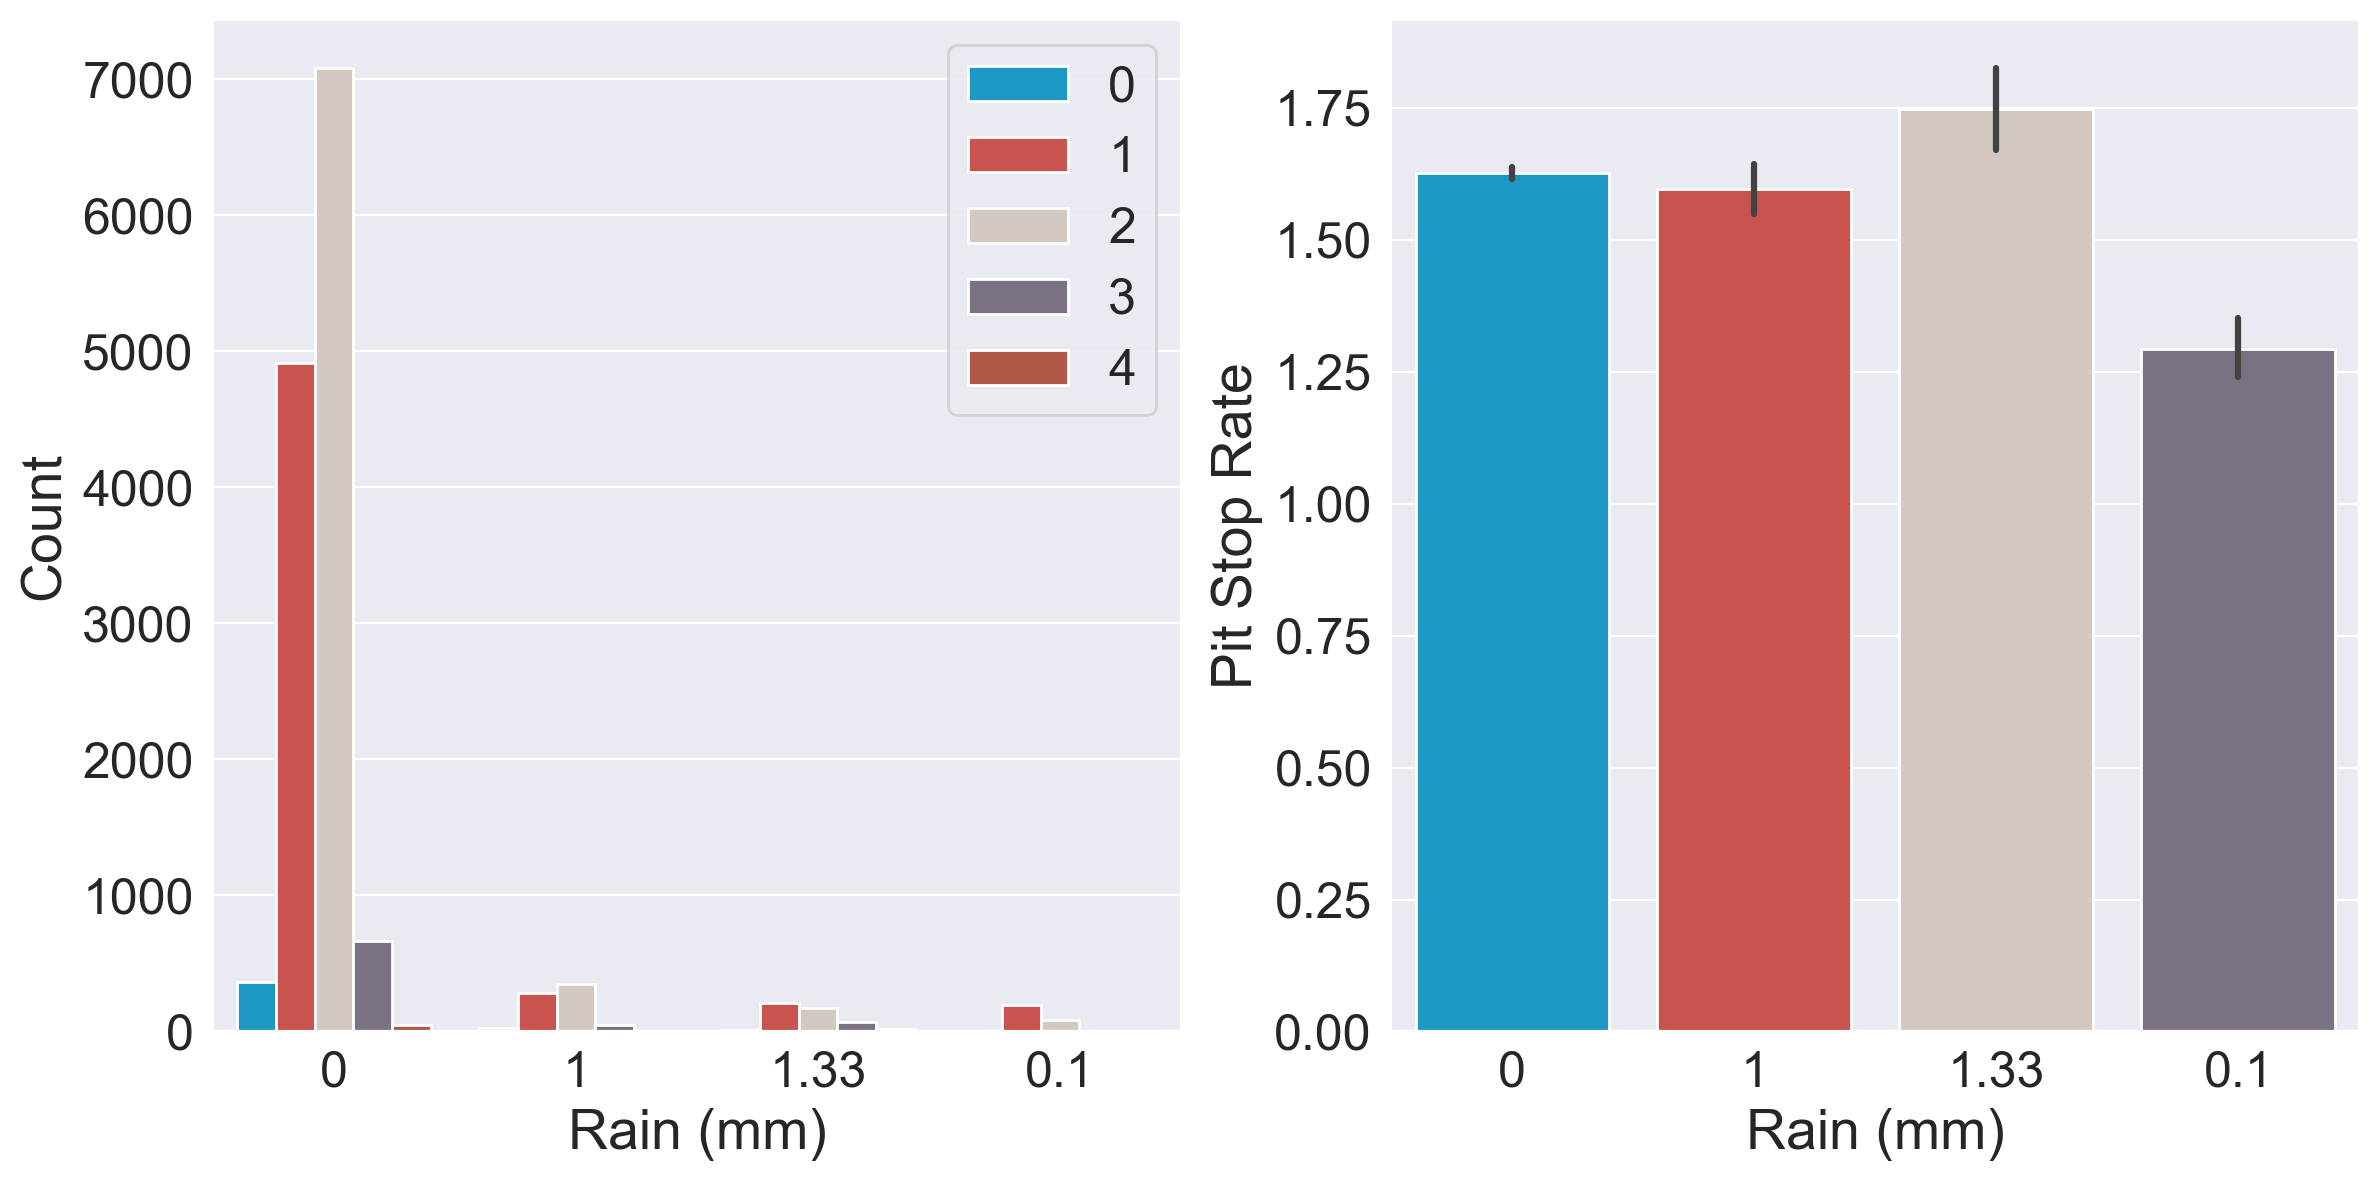

In [41]:
plot_categorical('Rain (mm)')

Here, when it rains the chances of the race being a 1-stop decreases, this is evident from the distribution

#### Race Name

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: 
The palette list has fewer values (5) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature,


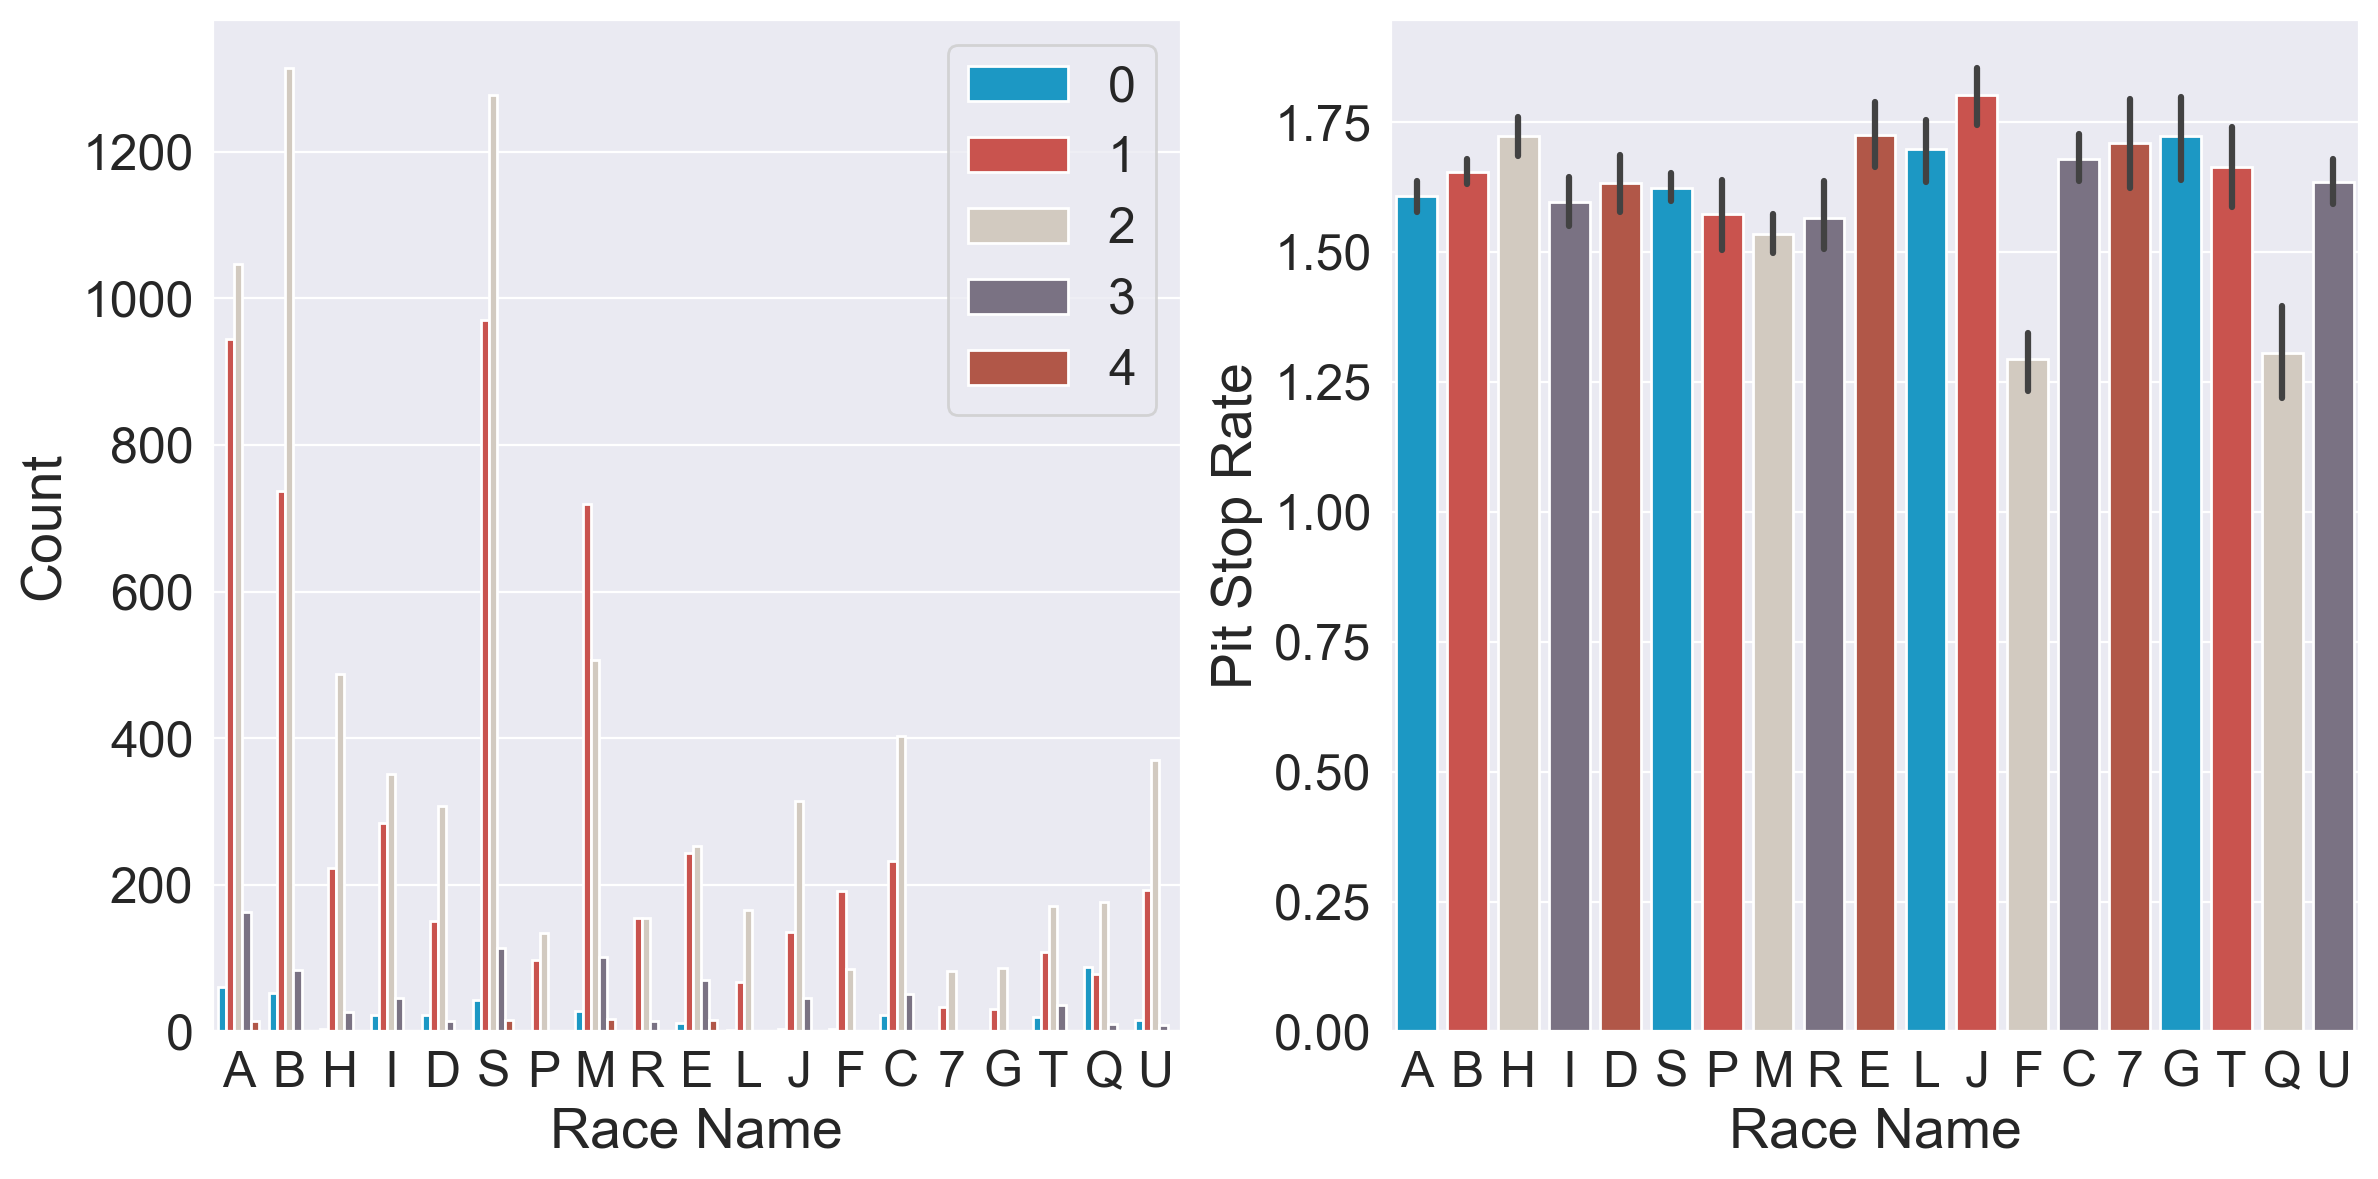

In [42]:
plot_categorical('Race Name')

* The race names are reduced to single letters to prevent clutter
* As we can see, in majority of the races 2 stops are the way to go
* This can be attributed to increased tyre degradation on tracks over the years, due to change in weather conditions

#### Driver ID

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_10224\3432857366.py:23: UserWarning: 
The palette list has fewer values (5) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature,


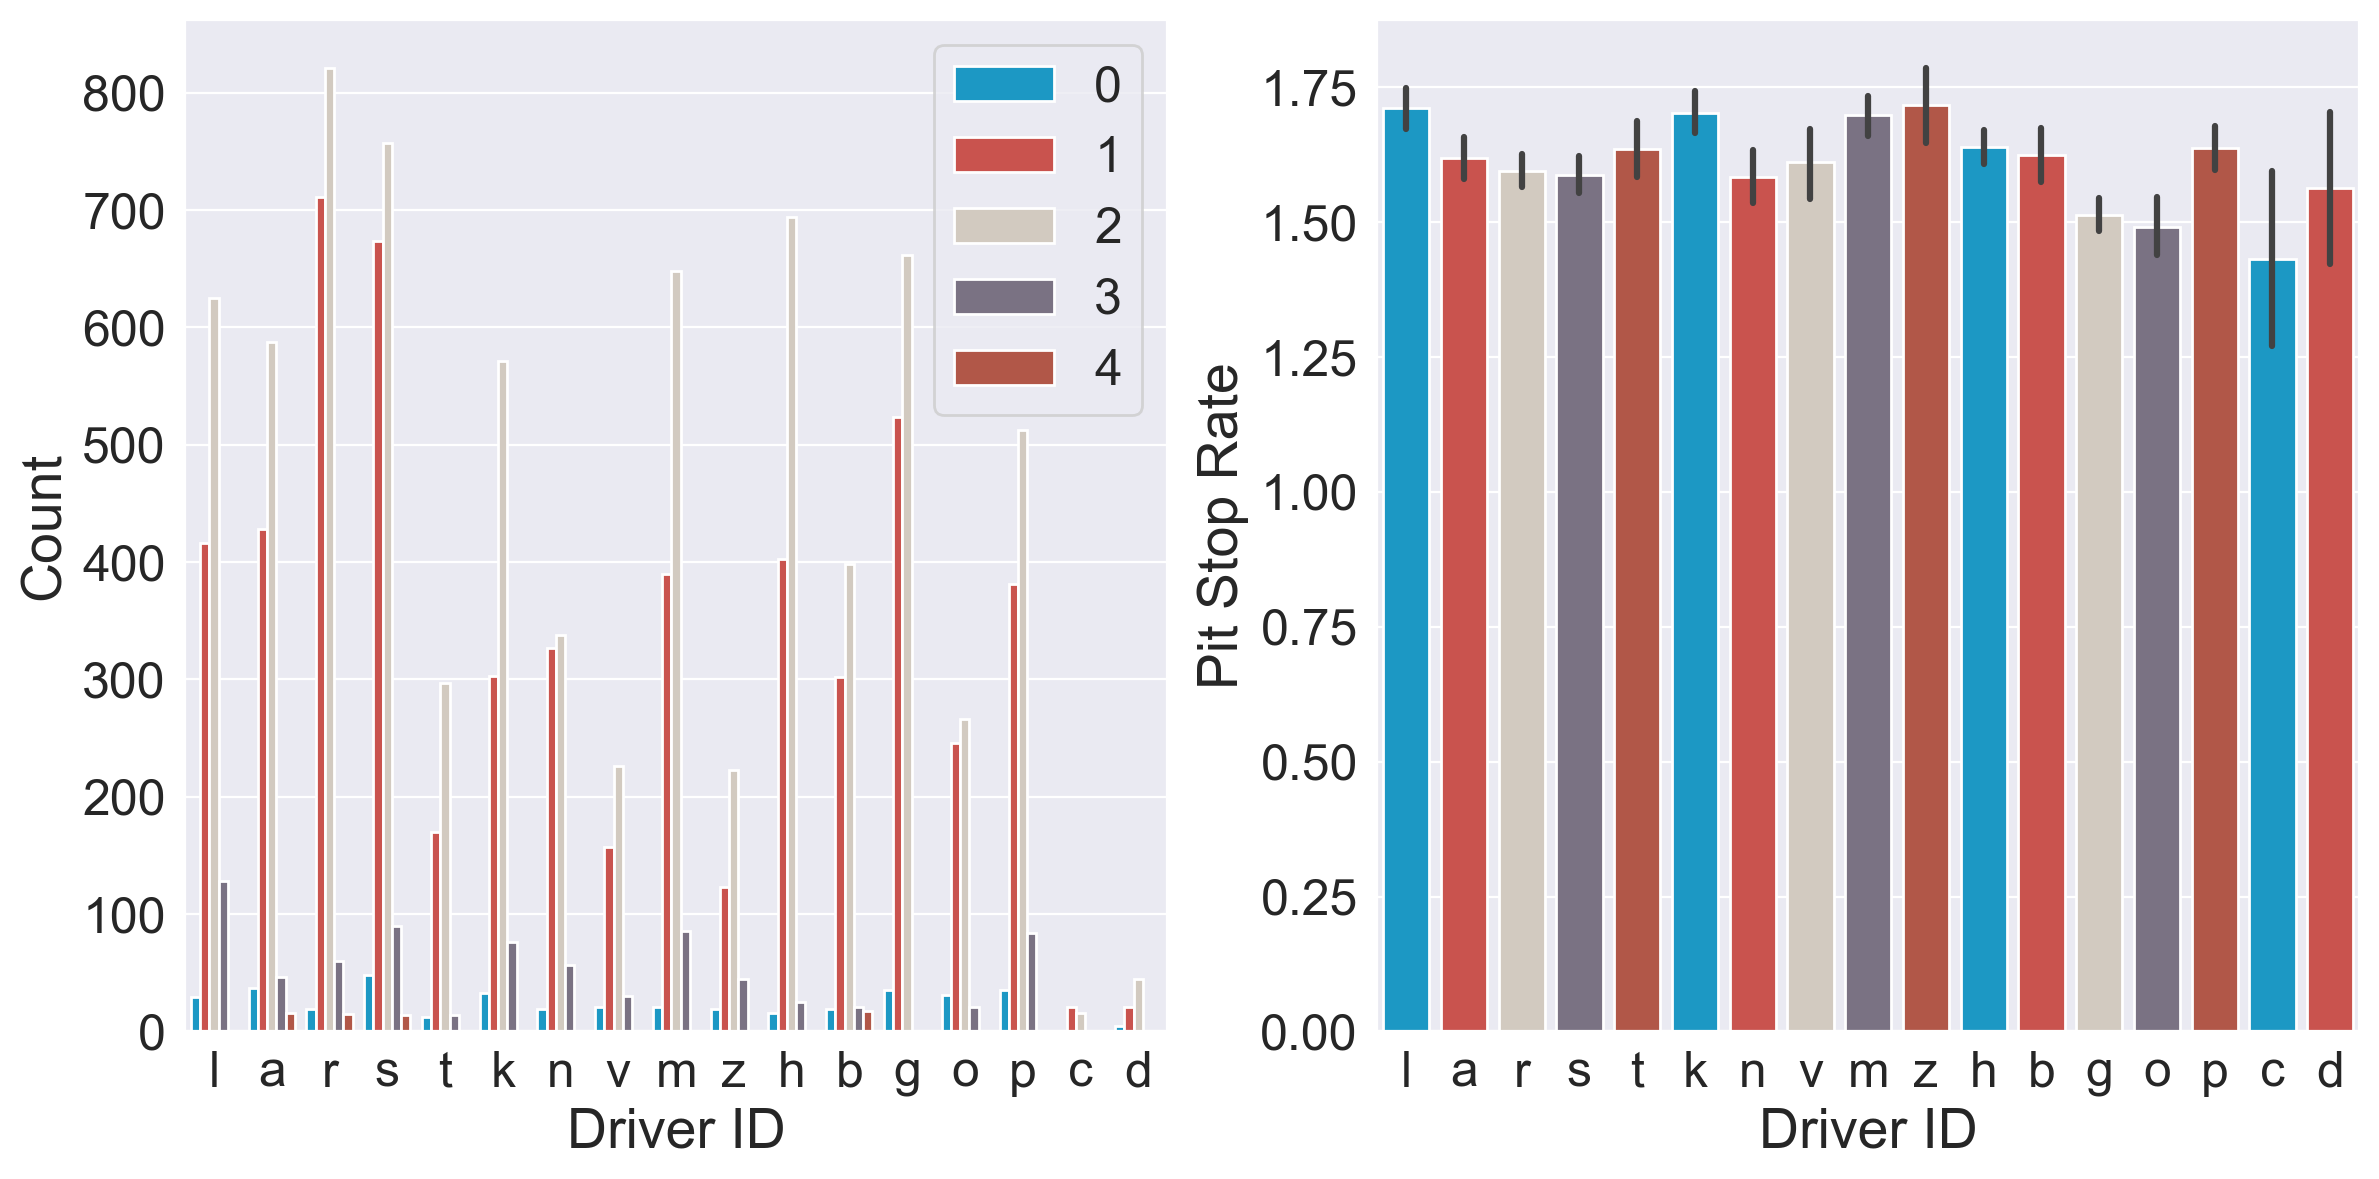

In [43]:
plot_categorical('Driver ID')

Since the Driver pitstop strategy depends on the team, which is visualised above, we will come to the same conclusion as before.

Now, we will perform Chi-2 test to check the correlation between categorical features and their importance with respect to the target feature

In [44]:
from scipy.stats import chi2_contingency

chi2_array,p_array = [],[]
categorical.append('Rain (mm)')
for column in categorical:

  crosstab = pd.crosstab(train_df[column],train_df['Pit Stops'])

  chi2,p,dof,expected = chi2_contingency(crosstab)

  chi2_array.append(chi2)
  p_array.append(p)

df_chi = pd.DataFrame({
    'Feature':categorical,
    'Chi2':chi2_array,
    'P-Value':p_array
})

df_chi.sort_values(by='Chi2',ascending=True,inplace=True)
df_chi.reset_index(drop=True,inplace=True)
df_chi

Feature         Chi2        P-Value
0           Weather    24.564670   6.153526e-05
1              Year   227.474705   3.831007e-37
2         Rain (mm)   335.691536   1.458589e-64
3  Constructor Name   555.626330   9.811584e-90
4         Driver ID   951.290258  3.038310e-131
5            Status  1088.980483  1.366662e-225
6         Race Name  2245.211308   0.000000e+00

* Here, we see that the chi2 values are very high which indicates a strong association between feature and target variable
* The p-values are low which indicate that there is a statistical significance between these correlations

### DateTime Features

In [45]:
train_df.head()

Year Race Name Driver ID  Lap Time Constructor Name  Grid Position  \
0  2024        Au        le  1:22.519               Fe            4.0   
1  2019        Az        al  1:51.021               To           11.0   
2  2020        Br        ra  2:05.243              NaN            NaN   
3  2022        Hu        sa  1:23.354               Fe            2.0   
4  2024        Au        ts  1:23.434               RB            8.0   

   Final Position Fastest Lap Time  Points    Status  Number of Laps   Lap  \
0             2.0         1:19.813    19.0  Finished            58.0  34.0   
1            11.0         1:45.754     0.0    +1 Lap            50.0  12.0   
2             NaN              NaN     NaN       DNF             NaN  47.0   
3             4.0                1    12.0  Finished            70.0  17.0   
4             7.0         1:21.134     6.0  Finished            58.0  36.0   

  Duration        Date  Weather  Temperature (°C)  Humidity (%)  \
0   17.308  2024-03-24  No rain             17.76            67   
1   20.720  2019-04-28     Rain              4.97            75   
2   44.085  2020-08-02  No rain              4.18            97   
3   22.820  2022-07-31  No rain              1.26            70   
4   17.535  2024-03-24  No rain             17.76            67   

   Wind Speed (m/s) Rain (mm)  Pit Stops  
0              0.89         0          2  
1             12.35         0          1  
2              2.28         0          2  
3              3.09         0          1  
4              0.89         0          2

In [46]:
#Since regulations change every year, we analysed year as a categorical feature
date_time = ['Lap Time','Fastest Lap Time','Date']

#Converting Date to Datetime object
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

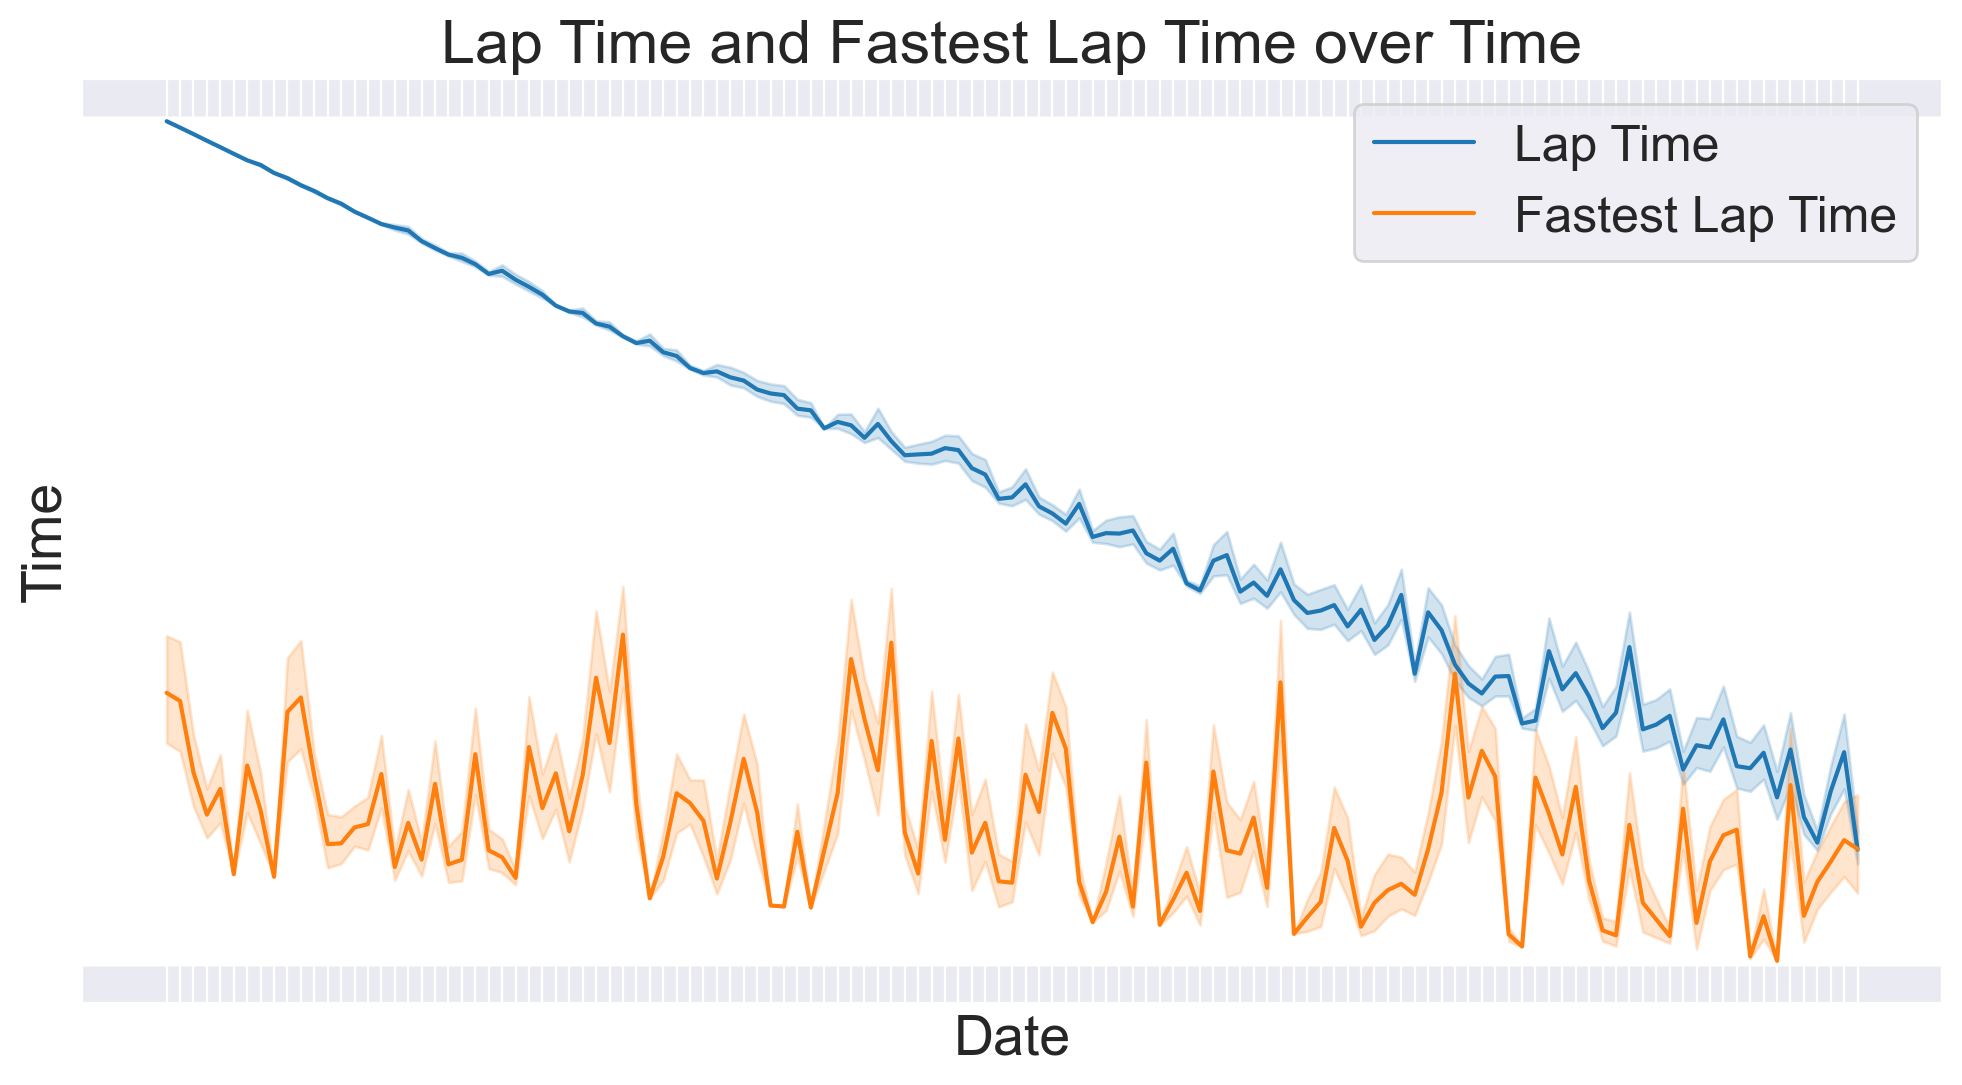

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Lap Time', data=df, label='Lap Time')
sns.lineplot(x='Date', y='Fastest Lap Time', data=df, label='Fastest Lap Time')
plt.title('Lap Time and Fastest Lap Time over Time')
plt.xlabel('Date')
plt.ylabel('Time')
plt.legend()

# Remove all y-axis labels except for "Time"
ax = plt.gca()  # Get the current axes
for label in ax.get_yticklabels():
    if label.get_text() != 'Time':  # Keep only "Time" label
        label.set_visible(False)

# Remove all x-axis labels except for "Date"
for label in ax.get_xticklabels():
    if label.get_text() != 'Date':  # Keep only "Date" label
        label.set_visible(False)

plt.show()

* As we can see, the fastest lap time oscillates over time, so there is not much info that we can get from it other than that it depends on the driver and car performance related to the track
* But Lap Time follows a downward trend,this can be attributed to change in regulations every year which results in improving fuel efficiency and sustainability and increased aerodynamic performance

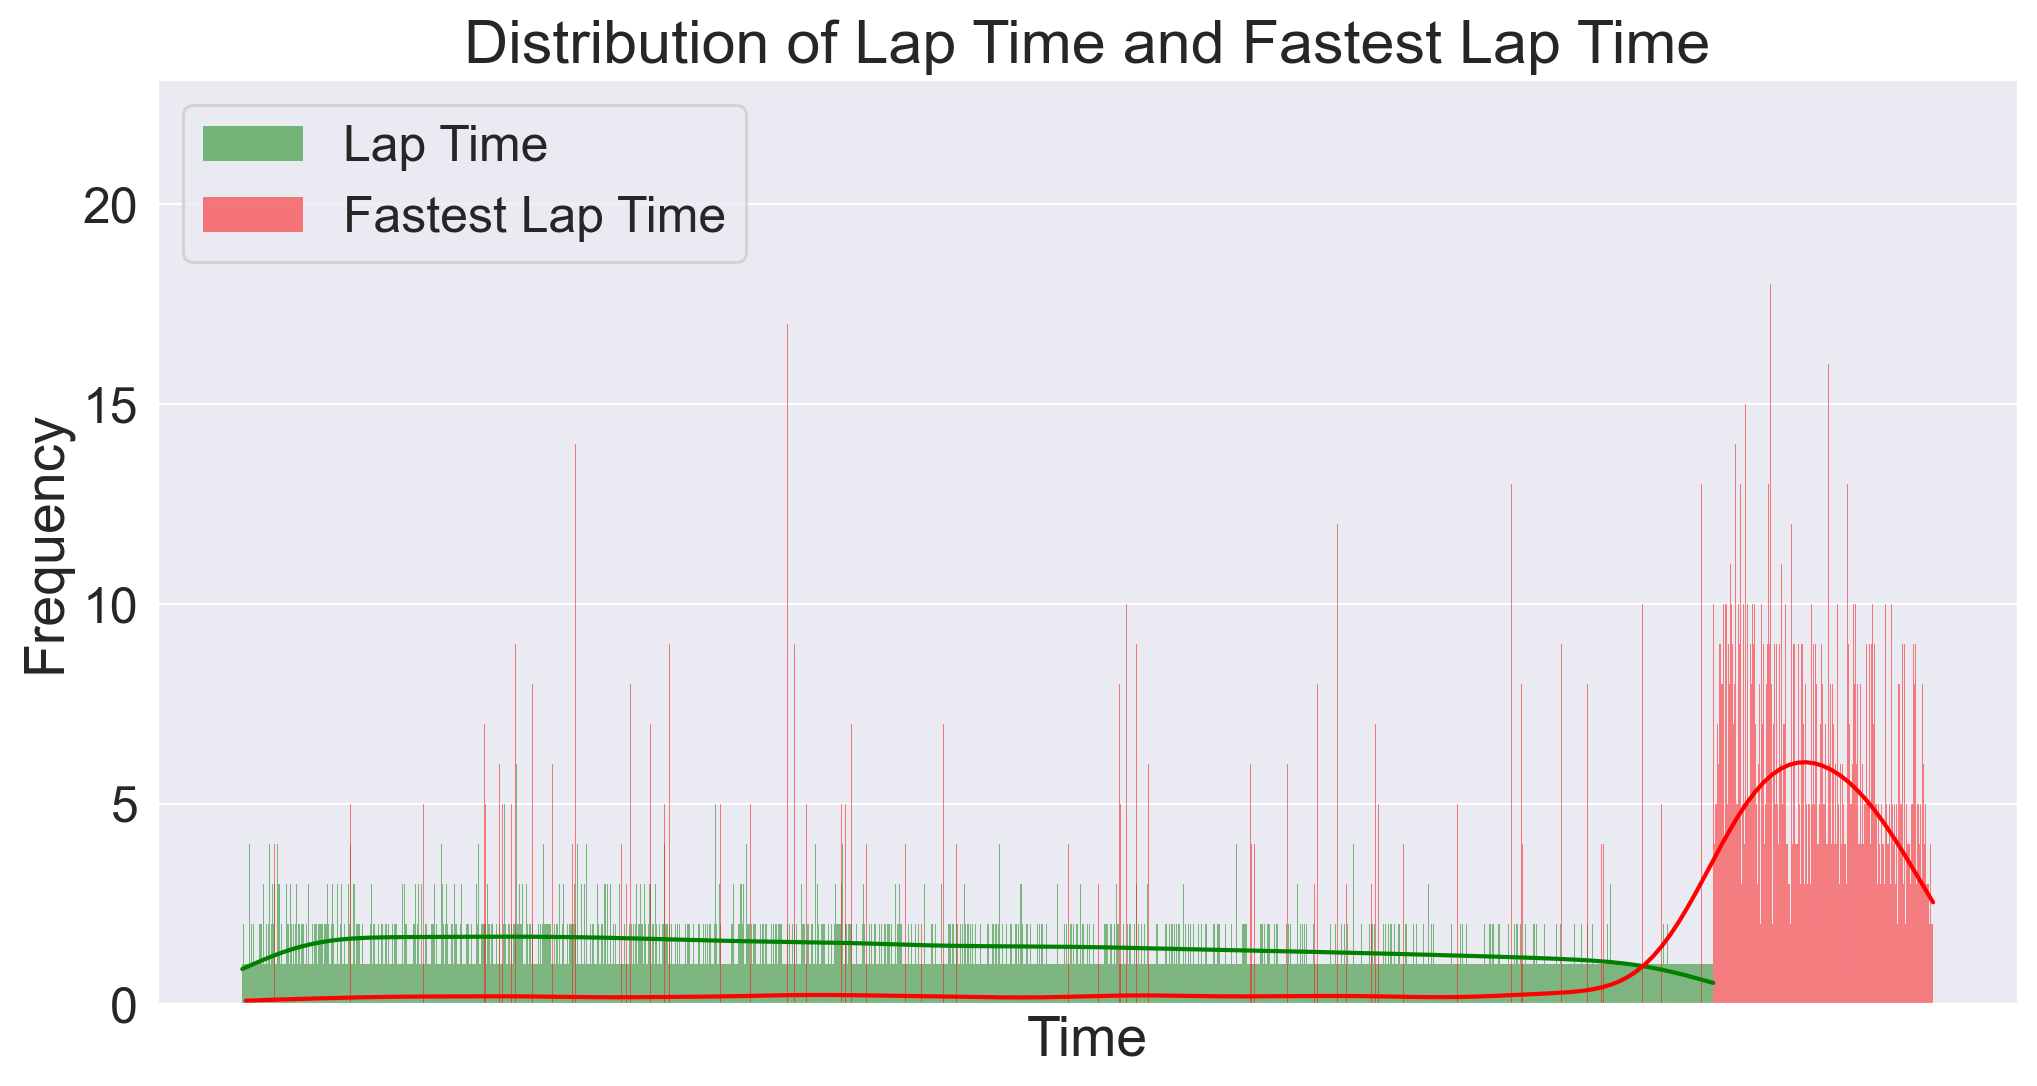

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Lap Time'], label='Lap Time', kde=True, color='green')
sns.histplot(train_df['Fastest Lap Time'], label='Fastest Lap Time', kde=True, color='red')
plt.title('Distribution of Lap Time and Fastest Lap Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()

# Remove x-axis labels except for 'Time'
plt.xticks([])  # This removes all x-axis ticks and labels
plt.xlabel('Time')  # This adds back the 'Time' label

plt.show()

* Lap time follows a uniform distribution, so we can't get much info from this plot
* Fastest Lap Time follows a skewed gaussian distribution, which is not tail-ended, which indicates that there are a huge number of outliers
* That will be fixed using either square-root or log transformation

In [49]:
#Lets view some of the stats of the datetime features
df[['Date','Lap Time','Fastest Lap Time']].describe()

Date  Lap Time Fastest Lap Time
count        18162     18162            13966
unique         127     11430             1844
top     2021-08-01  2:08.743         1:21.645
freq           192         7               28

In [50]:
#Date and Lap Time by itself does'nt provide any info so we can drop it
train_df.drop(['Date','Lap Time'],axis=1,inplace=True)

In [51]:
test_df.drop(['Date','Lap Time'],axis=1,inplace=True)

In [52]:
train_df.head()

Year Race Name Driver ID Constructor Name  Grid Position  Final Position  \
0  2024        Au        le               Fe            4.0             2.0   
1  2019        Az        al               To           11.0            11.0   
2  2020        Br        ra              NaN            NaN             NaN   
3  2022        Hu        sa               Fe            2.0             4.0   
4  2024        Au        ts               RB            8.0             7.0   

  Fastest Lap Time  Points    Status  Number of Laps   Lap Duration  Weather  \
0         1:19.813    19.0  Finished            58.0  34.0   17.308  No rain   
1         1:45.754     0.0    +1 Lap            50.0  12.0   20.720     Rain   
2              NaN     NaN       DNF             NaN  47.0   44.085  No rain   
3                1    12.0  Finished            70.0  17.0   22.820  No rain   
4         1:21.134     6.0  Finished            58.0  36.0   17.535  No rain   

   Temperature (°C)  Humidity (%)  Wind Speed (m/s) Rain (mm)  Pit Stops  
0             17.76            67              0.89         0          2  
1              4.97            75             12.35         0          1  
2              4.18            97              2.28         0          2  
3              1.26            70              3.09         0          1  
4             17.76            67              0.89         0          2

In [53]:
test_df.head()

Year Race Name Driver ID Constructor Name  Grid Position  Final Position  \
0  2022        Ba        le               Fe            1.0             1.0   
1  2021        Ab        bo               Me            6.0             6.0   
2  2019        Ja        ru               Wi           18.0            16.0   
3  2023        Hu        sa               Wi           20.0            18.0   
4  2022        Hu        ve               As           18.0            10.0   

  Fastest Lap Time  Points    Status  Number of Laps   Lap Duration  Weather  \
0         1:34.570    26.0  Finished            57.0  31.0   24.527  No rain   
1         1:26.862     8.0  Finished            58.0  30.0   21.669  No rain   
2         1:35.458     0.0   +2 Laps            50.0  25.0   23.792  No rain   
3         1:23.496     0.0       DNF            67.0  34.0   22.197  No rain   
4         1:22.824     1.0    +1 Lap            69.0  15.0   21.402  No rain   

   Temperature (°C)  Humidity (%)  Wind Speed (m/s) Rain (mm)  Pit Stops  
0             21.05            72              5.45         0          2  
1             21.10            68              2.06         0          1  
2              7.84            72              6.85         0          1  
3              1.26            70              3.09         0          2  
4              1.26            70              3.09         0          1

In [54]:

# Ensure Rain (mm) is numeric
train_df['Rain (mm)'] = pd.to_numeric(train_df['Rain (mm)'])
test_df['Rain (mm)'] = pd.to_numeric(test_df['Rain (mm)'])

# Function to convert lap time to seconds
def lap_to_seconds(df, feature):
    time_split = df[feature].str.split(':', expand=True)
    df[feature] = time_split[0].astype(float) * 60 + time_split[1].astype(float)
    return df

# Apply conversion
train_df = lap_to_seconds(train_df, 'Fastest Lap Time')
test_df = lap_to_seconds(test_df, 'Fastest Lap Time')

train_df.head()


Year Race Name Driver ID Constructor Name  Grid Position  Final Position  \
0  2024        Au        le               Fe            4.0             2.0   
1  2019        Az        al               To           11.0            11.0   
2  2020        Br        ra              NaN            NaN             NaN   
3  2022        Hu        sa               Fe            2.0             4.0   
4  2024        Au        ts               RB            8.0             7.0   

   Fastest Lap Time  Points    Status  Number of Laps   Lap Duration  Weather  \
0            79.813    19.0  Finished            58.0  34.0   17.308  No rain   
1           105.754     0.0    +1 Lap            50.0  12.0   20.720     Rain   
2               NaN     NaN       DNF             NaN  47.0   44.085  No rain   
3               NaN    12.0  Finished            70.0  17.0   22.820  No rain   
4            81.134     6.0  Finished            58.0  36.0   17.535  No rain   

   Temperature (°C)  Humidity (%)  Wind Speed (m/s)  Rain (mm)  Pit Stops  
0             17.76            67              0.89        0.0          2  
1              4.97            75             12.35        0.0          1  
2              4.18            97              2.28        0.0          2  
3              1.26            70              3.09        0.0          1  
4             17.76            67              0.89        0.0          2

In [55]:
test_df.head()

Year Race Name Driver ID Constructor Name  Grid Position  Final Position  \
0  2022        Ba        le               Fe            1.0             1.0   
1  2021        Ab        bo               Me            6.0             6.0   
2  2019        Ja        ru               Wi           18.0            16.0   
3  2023        Hu        sa               Wi           20.0            18.0   
4  2022        Hu        ve               As           18.0            10.0   

   Fastest Lap Time  Points    Status  Number of Laps   Lap Duration  Weather  \
0            94.570    26.0  Finished            57.0  31.0   24.527  No rain   
1            86.862     8.0  Finished            58.0  30.0   21.669  No rain   
2            95.458     0.0   +2 Laps            50.0  25.0   23.792  No rain   
3            83.496     0.0       DNF            67.0  34.0   22.197  No rain   
4            82.824     1.0    +1 Lap            69.0  15.0   21.402  No rain   

   Temperature (°C)  Humidity (%)  Wind Speed (m/s)  Rain (mm)  Pit Stops  
0             21.05            72              5.45        0.0          2  
1             21.10            68              2.06        0.0          1  
2              7.84            72              6.85        0.0          1  
3              1.26            70              3.09        0.0          2  
4              1.26            70              3.09        0.0          1

In [56]:
#Now we will combine this data to be used for preprocessing
f1_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
f1_df

Year Race Name Driver ID Constructor Name  Grid Position  \
0      2024        Au        le               Fe            4.0   
1      2019        Az        al               To           11.0   
2      2020        Br        ra              NaN            NaN   
3      2022        Hu        sa               Fe            2.0   
4      2024        Au        ts               RB            8.0   
...     ...       ...       ...              ...            ...   
18157  2020        70        ke              NaN            NaN   
18158  2022        Sã        le               Fe            5.0   
18159  2024        It        ha               Me            6.0   
18160  2020        Sp        st               Ra            5.0   
18161  2019        Ge        kv               To           14.0   

       Final Position  Fastest Lap Time  Points    Status  Number of Laps  \
0                 2.0            79.813    19.0  Finished            58.0   
1                11.0           105.754     0.0    +1 Lap            50.0   
2                 NaN               NaN     NaN       DNF             NaN   
3                 4.0               NaN    12.0  Finished            70.0   
4                 7.0            81.134     6.0  Finished            58.0   
...               ...               ...     ...       ...             ...   
18157             NaN               NaN     NaN       DNF             NaN   
18158             4.0            74.253    12.0  Finished            71.0   
18159             5.0            81.512    10.0  Finished            53.0   
18160             4.0            82.024    12.0    +1 Lap            65.0   
18161             3.0            77.708    15.0  Finished            64.0   

        Lap Duration  Weather  Temperature (°C)  Humidity (%)  \
0      34.0   17.308  No rain             17.76            67   
1      12.0   20.720     Rain              4.97            75   
2      47.0   44.085  No rain              4.18            97   
3      17.0   22.820  No rain              1.26            70   
4      36.0   17.535  No rain             17.76            67   
...     ...      ...      ...               ...           ...   
18157  20.0   29.389  No rain              4.18            97   
18158  44.0   23.124  No rain             21.25            86   
18159  15.0   24.469     Rain              5.00            87   
18160  27.0   22.351  No rain              9.61            85   
18161   3.0   23.090  No rain              0.22            86   

       Wind Speed (m/s)  Rain (mm)  Pit Stops  
0                  0.89        0.0          2  
1                 12.35        0.0          1  
2                  2.28        0.0          2  
3                  3.09        0.0          1  
4                  0.89        0.0          2  
...                 ...        ...        ...  
18157              2.28        0.0          2  
18158              4.63        0.0          3  
18159              0.45        1.0          2  
18160              3.09        0.0          2  
18161              0.00        0.0          2  

[18162 rows x 18 columns]

In [57]:
f1_df.to_csv('f1.csv',index=False)